# Predicting Singapore Private Property Prices

# 1.0 Loading Packages & Reading Dataset

## 1.1 Loading Packages

In [2]:
import pandas_profiling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
%matplotlib inline

os.chdir("C:\Python\data\project")

## 1.2 Reading Dataset

In [3]:
apartment = pd.read_csv("Apartments.csv", index_col=False)
condos = pd.read_csv("Condos.csv", index_col=False)
ec = pd.read_csv("Executive Condos.csv", index_col=False)

# 2.0 Data Exploration

## 2.1 Understanding the Size of Dataset

In [4]:
print(len(apartment), len(condos), len(ec))

14946 30049 9213


## 2.2 Combining All Datasets into a Single Dataframe

In [5]:
df = pd.concat([apartment, condos, ec])
print("The total number of observations in the combined dataset is", len(df), "rows")

The total number of observations in the combined dataset is 54208 rows


## 2.3 Preliminary Data Exploration Using ProfileReport

In [5]:
pandas_profiling.ProfileReport(df)

Based on the Profile Report, there are various important items to take note of as follow:
1. There were several projects that had unknown completion dates, and their age was wrongly calculated as a result. To ensure the Age column has correct values, we manually found the completion dates of these 88 projects online and imputed these values into the dataset.

2. There are transactions that have more than 1 unit. In order to allow our model to be more robust and to focus on predicting property prices for transactions involving only 1 unit, we will remove transactions that have more than 1 unit.

3. Various transactions have missing values. In this case, we will remove transactions with no facilities information, impute missing values for Floor No, Floor No (Final) and Unit No as zero.

4. There are several variables that would not be useful in training our models. Therefore, these variables will be removed.

## 2.4 Impute Completion Dates for 88 Projects And Recalculate Property Age

### 2.4.1 Impute Completion Dates for 88 Projects

In [6]:
# Read in list of completion dates manually found
comp_date = pd.read_csv("Projects with Completion Date.csv", index_col = None, dtype = {'Completion Date': str})

In [7]:
# Check projects with currently unknown completion dates
df[df["Completion Date"] == "Unknown"]

SN             Project Name  \
13        A14              NOVENA HILL   
14        A15                     N.A.   
25        A26                  IRIDIUM   
39        A40     BOTANIC GARDENS VIEW   
70        A71                     N.A.   
88        A89             NOVENA COURT   
94        A95             KISMIS LODGE   
105      A106      PASIR PANJANG COURT   
111      A112     THE RIVERSIDE PIAZZA   
173      A174                     N.A.   
249      A250     BOTANIC GARDENS VIEW   
253      A254        SPOTTISWOODE PARK   
260      A261                     N.A.   
270      A271            ORCHARD COURT   
286      A287                     N.A.   
287      A288                     N.A.   
299      A300              LAGOON VIEW   
308      A309                     N.A.   
323      A324                     N.A.   
324      A325  BOTANIC GARDENS MANSION   
337      A338      PASIR PANJANG COURT   
366      A367             NOVENA COURT   
400      A401                     N.A.   
442      A443             NOVENA COURT   
461      A462                     N.A.   
481      A482              LAGOON VIEW   
614      A615                     N.A.   
617      A618          PACIFIC MANSION   
639      A640                     N.A.   
748      A749         CAVENAGH GARDENS   
...       ...                      ...   
28090  C28091         A TREASURE TROVE   
28105  C28106         A TREASURE TROVE   
28129  C28130         A TREASURE TROVE   
28156  C28157         A TREASURE TROVE   
28202  C28203         A TREASURE TROVE   
28220  C28221         A TREASURE TROVE   
28227  C28228         A TREASURE TROVE   
28228  C28229         A TREASURE TROVE   
28237  C28238               PINE GROVE   
28251  C28252              SKY HABITAT   
28302  C28303         A TREASURE TROVE   
28323  C28324         A TREASURE TROVE   
28522  C28523              SKY HABITAT   
28624  C28625                SEASTRAND   
28707  C28708                SEASTRAND   
28857  C28858           TAMPINES COURT   
28898  C28899              SKY HABITAT   
29017  C29018                    LIVIA   
29192  C29193               PINE GROVE   
29208  C29209           TAMPINES COURT   
29229  C29230                SEASTRAND   
29341  C29342                SEASTRAND   
29420  C29421                SEASTRAND   
29433  C29434    LAKEPOINT CONDOMINIUM   
29576  C29577    LAKEPOINT CONDOMINIUM   
29727  C29728               THE WARREN   
29729  C29730           TAMPINES COURT   
29913  C29914           TAMPINES COURT   
7504    E7505             WATERCOLOURS   
7600    E7601             WATERCOLOURS   

                                                 Address  No. of Units  \
13                                     49B Jalan Novena              1   
14                           188-2B Tanjong Katong Road              1   
25                              11 Lincoln Road  #17-03              1   
39                              27 Taman Serasi  #05-31              1   
70                              35 Kim Yam Road  #03-02              1   
88                               14G Jalan Novena Barat              1   
94     114/16A ETC(ENBLOC) Lorong Kismis/Eng Kong Ter...            64   
105                             31B Pasir Panjang Close              1   
111                        11 Keng Cheow Street  #04-05              1   
173                                    351A Changi Road              1   
249                             19 Taman Serasi  #03-23              1   
253                 105 Spottiswoode Park Road  #07-126              1   
260                                 465D Joo Chiat Road              1   
270                               19 Oxley Road  #02-02              1   
286                         221 Joo Chiat Place  #02-01              1   
287                                       4A Jalan Ayer              1   
299                    5000J Marine Parade Road  #13-41              1   
308                           188-5 Tanjong Katong Road              1   


In [8]:
# Set projects with unknown completion dates to a value of None
df.loc[df['Completion Date'] == "Unknown", 'Completion Date'] = None

In [9]:
# Index the dataframes using Project Name
df = df.set_index("Project Name")
comp_date = comp_date.set_index("Project Name")

In [10]:
# Check that the None values have been set correctly
df[df["Completion Date"].isna()]

SN  \
Project Name                      
NOVENA HILL                 A14   
N.A.                        A15   
IRIDIUM                     A26   
BOTANIC GARDENS VIEW        A40   
N.A.                        A71   
NOVENA COURT                A89   
KISMIS LODGE                A95   
PASIR PANJANG COURT        A106   
THE RIVERSIDE PIAZZA       A112   
N.A.                       A174   
BOTANIC GARDENS VIEW       A250   
SPOTTISWOODE PARK          A254   
N.A.                       A261   
ORCHARD COURT              A271   
N.A.                       A287   
N.A.                       A288   
LAGOON VIEW                A300   
N.A.                       A309   
N.A.                       A324   
BOTANIC GARDENS MANSION    A325   
PASIR PANJANG COURT        A338   
NOVENA COURT               A367   
N.A.                       A401   
NOVENA COURT               A443   
N.A.                       A462   
LAGOON VIEW                A482   
N.A.                       A615   
PACIFIC MANSION            A618   
N.A.                       A640   
CAVENAGH GARDENS           A749   
...                         ...   
A TREASURE TROVE         C28091   
A TREASURE TROVE         C28106   
A TREASURE TROVE         C28130   
A TREASURE TROVE         C28157   
A TREASURE TROVE         C28203   
A TREASURE TROVE         C28221   
A TREASURE TROVE         C28228   
A TREASURE TROVE         C28229   
PINE GROVE               C28238   
SKY HABITAT              C28252   
A TREASURE TROVE         C28303   
A TREASURE TROVE         C28324   
SKY HABITAT              C28523   
SEASTRAND                C28625   
SEASTRAND                C28708   
TAMPINES COURT           C28858   
SKY HABITAT              C28899   
LIVIA                    C29018   
PINE GROVE               C29193   
TAMPINES COURT           C29209   
SEASTRAND                C29230   
SEASTRAND                C29342   
SEASTRAND                C29421   
LAKEPOINT CONDOMINIUM    C29434   
LAKEPOINT CONDOMINIUM    C29577   
THE WARREN               C29728   
TAMPINES COURT           C29730   
TAMPINES COURT           C29914   
WATERCOLOURS              E7505   
WATERCOLOURS              E7601   

                                                                   Address  \
Project Name                                                                 
NOVENA HILL                                              49B Jalan Novena    
N.A.                                           188-2B Tanjong Katong Road    
IRIDIUM                                           11 Lincoln Road  #17-03    
BOTANIC GARDENS VIEW                              27 Taman Serasi  #05-31    
N.A.                                              35 Kim Yam Road  #03-02    
NOVENA COURT                                       14G Jalan Novena Barat    
KISMIS LODGE             114/16A ETC(ENBLOC) Lorong Kismis/Eng Kong Ter...   
PASIR PANJANG COURT                               31B Pasir Panjang Close    
THE RIVERSIDE PIAZZA                         11 Keng Cheow Street  #04-05    
N.A.                                                     351A Changi Road    
BOTANIC GARDENS VIEW                              19 Taman Serasi  #03-23    
SPOTTISWOODE PARK                     105 Spottiswoode Park Road  #07-126    
N.A.                                                  465D Joo Chiat Road    
ORCHARD COURT                                       19 Oxley Road  #02-02    
N.A.                                          221 Joo Chiat Place  #02-01    
N.A.                                                        4A Jalan Ayer    
LAGOON VIEW                              5000J Marine Parade Road  #13-41    
N.A.                                            188-5 Tanjong Katong Road    
N.A.                                          28 Roberts Lane  #06-01 ETC    
BOTANIC GARDENS MANSION                           18 Taman Serasi  #07-24    
PASIR PANJANG COURT                               21A Pasir Panjang Close    
NOVENA COURT                 

In [11]:
# Impute values
df["Completion Date"] = df['Completion Date'].fillna(comp_date['Completion Date'])

In [12]:
df["Completion Date"].unique()

array(['Uncompleted', '2010', '2012', '2001', '2011', '1975', nan, '2013',
       '2009', '2008', '1999', '1997', '2002', '1996', '1970', '2000',
       '2005', '1998', '1983', '2003', '2007', '2004', '1972', '1980',
       '2006', '1985', '1977', '1995', '1994', '1981', '1991', '1978',
       '1988', '1992', '1993', '1976', '2015', '1984', '1986', '1987',
       '1990', '1982', '1979', '1953', '1967', '1974', '1989', '1971',
       '2014', '1968', '1962', '1966', '1961', '1963', '1957', '1973',
       '1954', '2018', '2016'], dtype=object)

In [13]:
df = df.reset_index()

### 2.4.2 Recalculate Property Age

In [14]:
# Remove rows with unknown completion date
df = df[df["Completion Date"].isna() == False]

In [15]:
df["Completion Date"].unique()

array(['Uncompleted', '2010', '2012', '2001', '2011', '1975', '2013',
       '2009', '2008', '1999', '1997', '2002', '1996', '1970', '2000',
       '2005', '1998', '1983', '2003', '2007', '2004', '1972', '1980',
       '2006', '1985', '1977', '1995', '1994', '1981', '1991', '1978',
       '1988', '1992', '1993', '1976', '2015', '1984', '1986', '1987',
       '1990', '1982', '1979', '1953', '1967', '1974', '1989', '1971',
       '2014', '1968', '1962', '1966', '1961', '1963', '1957', '1973',
       '1954', '2018', '2016'], dtype=object)

#### In the case of uncompleted projects at time of sale, the age of the property should be set as 0.

In [16]:
df["Sale Date"] = pd.to_datetime(df["Sale Date"], format = "%d-%b-%y")

In [17]:
df["Age"] = df.apply(lambda x: x["Sale Date"].year - int(x["Completion Date"]) if (x["Completion Date"] != "Uncompleted") else 0, axis = 1)

In [18]:
df["Age"].describe()

count    54128.000000
mean         3.556921
std          7.298738
min         -3.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         61.000000
Name: Age, dtype: float64

In [19]:
df.loc[df['Age'] < 0, 'Age'] = 0

In [20]:
df["Age"].describe()

count    54128.000000
mean         3.558029
std          7.298081
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         61.000000
Name: Age, dtype: float64

## 2.5 Removing Transactions Involving More Than 1 Unit

In [21]:
df_new = df[df["No. of Units"] == 1] # 38 records
print("The total number of observations after removing transactions involving more than 1 unit is now", len(df_new))

The total number of observations after removing transactions involving more than 1 unit is now 54092


## 2.6 Removing Transactions with No Facilities Information

In [22]:
df_new = df_new[df_new["Carpark"].isna() == False]

In [23]:
df_new.columns[df_new.isna().any()].tolist()

['Floor No', 'Floor No (Final)', 'Unit No', 'Lease Start Date']

## 2.7 Impute Missing Values for Floor No., Floor No. (Final) and Unit No.

In [24]:
df_new["Floor No"].unique()

array(['22', '21', '2', '7', '3', '4', '42', '18', '16', nan, '17', '13',
       '5', '8', '14', '11', '10', '1', '6', '19', '28', '15', '9', '25',
       '20', '12', '44', '40', '32', '31', '36', '38', '24', '27', '34',
       '35', '29', '23', '48', '26', '30', '68', '50', '37', '55', '53',
       '46', '45', '47', '41', '33', '39', '43', '49', '60', 'B1', '61',
       '65', '63', '52', '62', '70', '66', '51', '58', '64', '74', '54',
       14.0, 3.0, 8.0, 1.0, 12.0, 9.0, 10.0, 11.0, 13.0, 29.0, 2.0, 28.0,
       21.0, 4.0, 6.0, 7.0, 25.0, 18.0, 16.0, 15.0, 5.0, 24.0, 20.0, 17.0,
       27.0, 26.0, 22.0, 33.0, 23.0, 19.0, 31.0, 32.0, 34.0, 38.0, 30.0,
       36.0, 37.0, 35.0, 40.0, 41.0, 55.0, 39.0, 60.0, 42.0, 63.0, 43.0,
       62.0, 50.0, 49.0, 61.0, 44.0, 58.0, 52.0, 57.0, 65.0, 59.0, 56.0,
       48.0, 47.0, 54.0], dtype=object)

In [25]:
# Impute 0 for units without Floor No
df_new['Floor No'][df_new['Floor No'].isna()] = 0

In [26]:
df_new["Floor No"] = df_new["Floor No"].astype(str)

In [27]:
# Impute 0 for units without Unit No
df_new['Unit No'][df_new['Unit No'].isna()] = 0

In [28]:
df_new["Unit No"] = df_new["Unit No"].astype(str)

In [29]:
df_new["Floor No (Final)"].unique()

array([ 5.,  1.,  2.,  9.,  4., nan,  3.,  6.,  8.,  7., 10., 14., 11.,
       12., 13., 15.,  0.])

In [30]:
df_new["Floor No (Final)"][df_new["Floor No (Final)"].isna()] = 0

In [31]:
df_new["Floor No (Final)"].unique()

array([ 5.,  1.,  2.,  9.,  4.,  0.,  3.,  6.,  8.,  7., 10., 14., 11.,
       12., 13., 15.])

In [32]:
df_new.dtypes

Project Name                           object
SN                                     object
Address                                object
No. of Units                            int64
Area (sqm)                              int64
Type of Area                           object
Transacted Price ($)                    int64
LN (Price)                            float64
Nett Price($)                          object
Unit Price ($ psm)                      int64
Unit Price ($ psf)                      int64
Sale Date                      datetime64[ns]
Sale YM                                object
Time (Quarter)                          int64
Time (Month)                            int64
Property Type                          object
Tenure                                 object
Completion Date                        object
Type of Sale                           object
Purchaser Address Indicator            object
Postal District                         int64
Postal Sector                     

## 2.8 Remove Unwanted Variables

In [33]:
df_new = df_new.drop(["SN", 
                      "Project Name", 
                      "Address", 
                      "No. of Units", 
                      "Type of Area", 
                      "Nett Price($)", 
                      "Unit Price ($ psm)", 
                      #"Unit Price ($ psf)",
                      "Sale Date",
                      "Address 1",
                      "Address for Geocode",
                      "Lease Start Date",
                      "Latitude",
                      "Longitude",
                      "Completion Date",
                      "Postal Sector",
                      "Postal Code",
                      "Planning Region",
                      "Tenure",
                      "Tenure (New)"], axis = 1)

In [34]:
df_new.head()

Area (sqm)  Transacted Price ($)  LN (Price)  Unit Price ($ psf) Sale YM  \
0          69               1677060   14.332553                2258  2013-3   
1          69               1662210   14.323659                2238  2013-3   
2          41                610000   13.321214                1382  2013-3   
3          41                582146   13.274477                1319  2013-3   
4         104               1142000   13.948292                1020  2013-3   

   Time (Quarter)  Time (Month) Property Type Type of Sale  \
0               1             3     Apartment     New Sale   
1               1             3     Apartment     New Sale   
2               1             3     Apartment       Resale   
3               1             3     Apartment     New Sale   
4               1             3     Apartment       Resale   

  Purchaser Address Indicator      ...        bus interchange km No of Units  \
0                     Private      ...                  2.235002       183.0   
1                     Private      ...                  2.235002       183.0   
2                     Private      ...                  1.476714        19.0   
3                         HDB      ...                  2.188445        42.0   
4                     Private      ...                  1.301692        40.0   

  Security  Carpark Entertainment  Chill Out  Food/Dining  Family-Friendly  \
0      0.0      0.0           0.0        0.0          0.0              0.0   
1      0.0      0.0           0.0        0.0          0.0              0.0   
2      0.0      0.0           0.0        0.0          0.0              0.0   
3      0.0      0.0           0.0        0.0          1.0              0.0   
4      1.0      0.0           0.0        0.0          1.0              0.0   

   Fitness  Function Room  
0      0.0            0.0  
1      0.0            0.0  
2      0.0            0.0  
3      1.0            0.0  
4      1.0            0.0  

[5 rows x 55 columns]

In [35]:
df_new.columns[df_new.isna().any()].tolist()

[]

In [36]:
len(df_new)

51189

# 3.0 Exporting Preliminarily Cleaned Dataset

In [37]:
df_new.to_csv("Cleaned Dataset_v3.csv", index=None)

In [38]:
#Check Exported Dataset
df = pd.read_csv("Cleaned Dataset_v3.csv", index_col=None, dtype = {'Unit No': str, 'Floor No': str})
df.head()

Area (sqm)  Transacted Price ($)  LN (Price)  Unit Price ($ psf) Sale YM  \
0          69               1677060   14.332553                2258  2013-3   
1          69               1662210   14.323659                2238  2013-3   
2          41                610000   13.321214                1382  2013-3   
3          41                582146   13.274477                1319  2013-3   
4         104               1142000   13.948292                1020  2013-3   

   Time (Quarter)  Time (Month) Property Type Type of Sale  \
0               1             3     Apartment     New Sale   
1               1             3     Apartment     New Sale   
2               1             3     Apartment       Resale   
3               1             3     Apartment     New Sale   
4               1             3     Apartment       Resale   

  Purchaser Address Indicator      ...        bus interchange km No of Units  \
0                     Private      ...                  2.235002       183.0   
1                     Private      ...                  2.235002       183.0   
2                     Private      ...                  1.476714        19.0   
3                         HDB      ...                  2.188445        42.0   
4                     Private      ...                  1.301692        40.0   

  Security  Carpark Entertainment  Chill Out  Food/Dining  Family-Friendly  \
0      0.0      0.0           0.0        0.0          0.0              0.0   
1      0.0      0.0           0.0        0.0          0.0              0.0   
2      0.0      0.0           0.0        0.0          0.0              0.0   
3      0.0      0.0           0.0        0.0          1.0              0.0   
4      1.0      0.0           0.0        0.0          1.0              0.0   

   Fitness  Function Room  
0      0.0            0.0  
1      0.0            0.0  
2      0.0            0.0  
3      1.0            0.0  
4      1.0            0.0  

[5 rows x 55 columns]

# 4.0 Additional Data Exploration

## 4.1 Loading Additional Packages

In [33]:
import pandas_profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import  metrics, linear_model, ensemble, model_selection,feature_selection
from yellowbrick.regressor import PredictionError
%matplotlib inline

## 4.2 Reading New Dataset

In [34]:
df = pd.read_csv("Cleaned Dataset_v3.csv", index_col=None, dtype = {'Unit No': str, 'Floor No': str})

## 4.3 Data Exploration

### 4.3.1 Using ProfileReport

After loading our dataset, we will perform additional data exploration using the pandas_profiling package, which allows us to gain insights on the following:
1. Dataset Information
    a. Number of Variables
    b. Number of Observations
    c. Total Percentage of Missing Observations
2. Variable Types
3. Warnings on the following:
    a. Variables with large numbers of zeros
    b. Variables that are highly correlated
    c. Variables with unsupported data type
    d. Variables with high cardinality
    e. Presence and number of duplicated rows

In [35]:
import pandas_profiling as pp
pp.ProfileReport(df)

### 4.3.2 Discussion on ProfileReport
Based on the Profile Report above, we can see that there are several pairs of variables with high correlation. These variables are:
1. Condominiums and Private Flats Households (% of Total Households) AND Resident in Condominiums and Other Apartments (% of total residents)
Correlation Coefficient = 0.94806

2. Time(Month) AND Time(Quarter)
Correlation Coefficient = 0.99722

3. Uni Qualification (% of total) AND Monthly Household Income $8000 and above (% of Total Households)
Correlation Coefficient = 0.90933

In order to identify other possible highly correlated independent variables, we will plot an IV-IV correlation matrix.

### 4.3.3 Independent Variable - Independent Variable Correlation Matrix

In [36]:
corr = df.corr()
corr.style.background_gradient()

### 4.3.4 Discussion on IV-IV Correlation Matrix

Based on the IV-IV Correlation Matrix above, we can see that other than the IV pairs highlighted from the ProfileReport that are highly correlated, the following variable pair is also highly correlated:

#### 1. Condominiums and Private Flats Households (% of Total Households) AND Uni Qualification (% of total)
0.914189	


### 4.3.5 Summary of Data Exploration

Based on the above, we will be performing further data pre-processing as indicated below:

1. Changing Area (sqm) to Area (sqf)
2. Dropping Unnecessary columns
3. Dropping One Variable in Each Pair of Highly Correlated Variables
4. Dropping Variables Due to Business Domain Reasons
5. Log Distance
6. Create Expensive Area Indicator
7. Converting Categorical Data Types - Creating Dummy Variables
8. Create Lucky and Unlucky Unit No and Floor No
9. Re-arranging Target Variable, 'Unit Price (psf)', To the Last Column

# 5.0 Additional Data Pre-Processing

## 5.1. Changing Area (sqm) to Area (sqf)

In [37]:
df['Area (sqf)'] = df['Area (sqm)']*10.76

## 5.2. Dropping Unnecessary columns

In [38]:
#three years data not enought to look at time series

df = df.drop(['Transacted Price ($)','LN (Price)','Area (sqm)','Sale YM','Time (Quarter)','Time (Month)'],axis = 1)

## 5.3. Dropping One Variable in Each Pair of Highly Correlated Variables

In [39]:


df = df.drop(['Resident in Condominiums and Other Apartments (% of total residents)','Monthly Household Income $8000 and above (% of Total Households)','Condominiums and Private Flats Households (% of Total Households)'],axis = 1)

## 5.4. Dropping Variables Due to Business Domain Reasons

In [40]:
df = df.drop(['Postal District','Chill Out'],axis = 1)
#Dropping postal district and keeping planning area
#Dropping chill out between chill out and food/dining due to contingency table showing that both follow similar pattern.


## 5.5. Log Distance

Based on business intuition, it can be assumed that short and long distances are more important in predicting property prices. Therefore, we want to perform data transformation on these features to reflect this intuition. Additionally, when we visualize an example of one of the distance features, bus stop km, onto a histogram, we can see that the datapoints are typically skewed. Correspondingly, the data distribution does not closely follow the diagonal line in the probability plot that represents normal distribution.

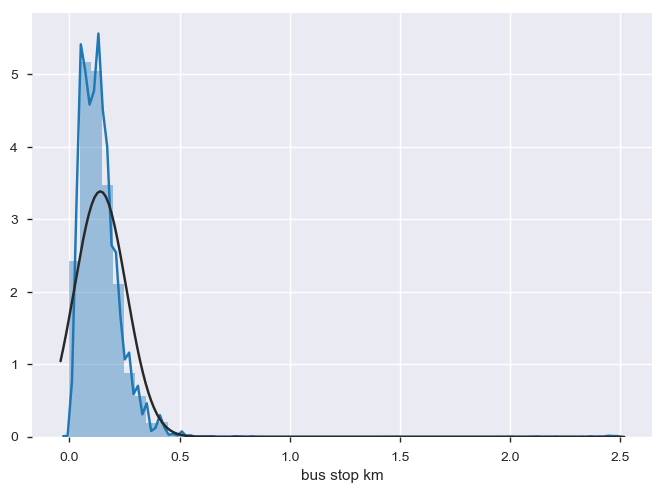

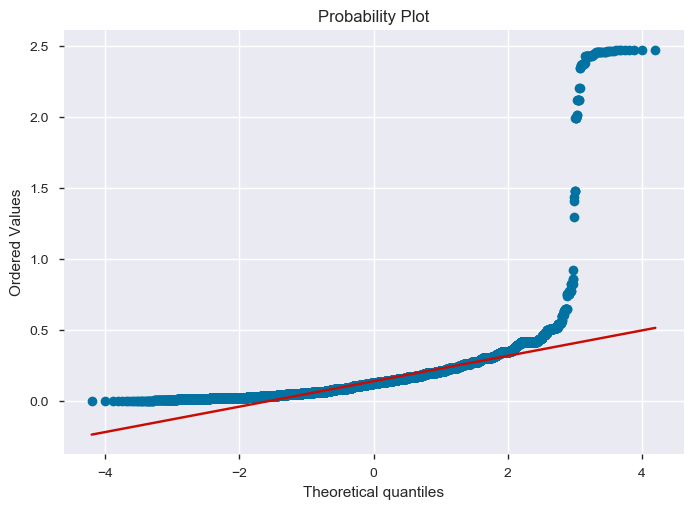

In [47]:
from scipy.stats import norm
from scipy import stats


#histogram and normal probability plot
sns.distplot(df['bus stop km'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['bus stop km'], plot=plt)

Upon log transformation, we can see that the data distribution now follows a normal distribution more closely based on the plot below:

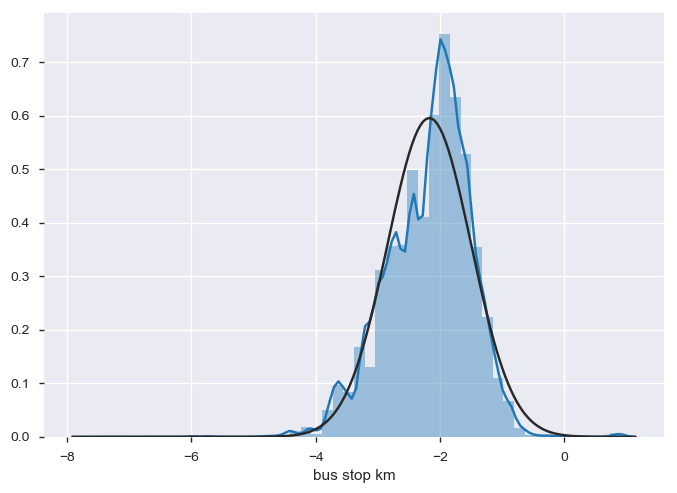

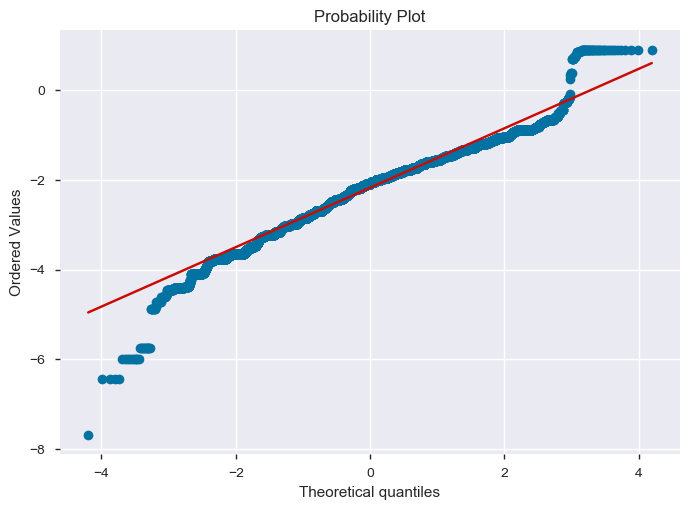

In [48]:
#histogram and normal probability plot
sns.distplot(np.log(df['bus stop km']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(df['bus stop km']), plot=plt)

Therefore, we want to perform a log transformation on all distance variables.

In [41]:
df.iloc[:,14:35] = np.log(df.iloc[:,14:35]+0.1)

## 5.6 Create Expensive Area Indicator

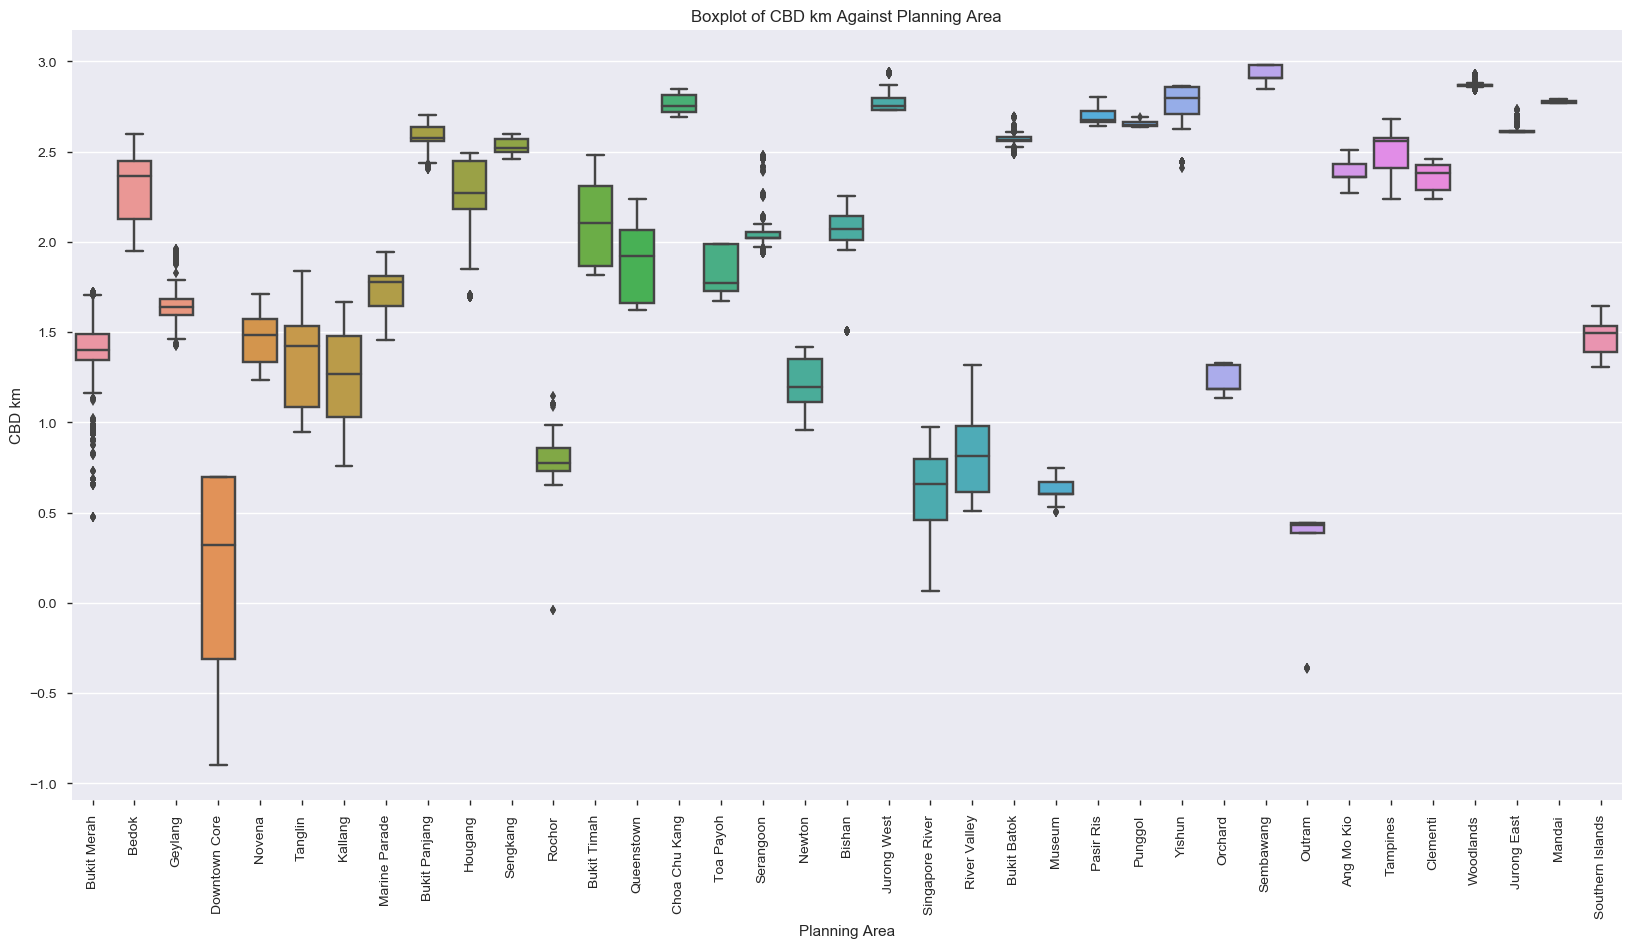

In [50]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x = df["Planning Area"],y = df["CBD km"])
plt.title("Boxplot of CBD km Against Planning Area")
plt.xticks(rotation=90)
plt.show()

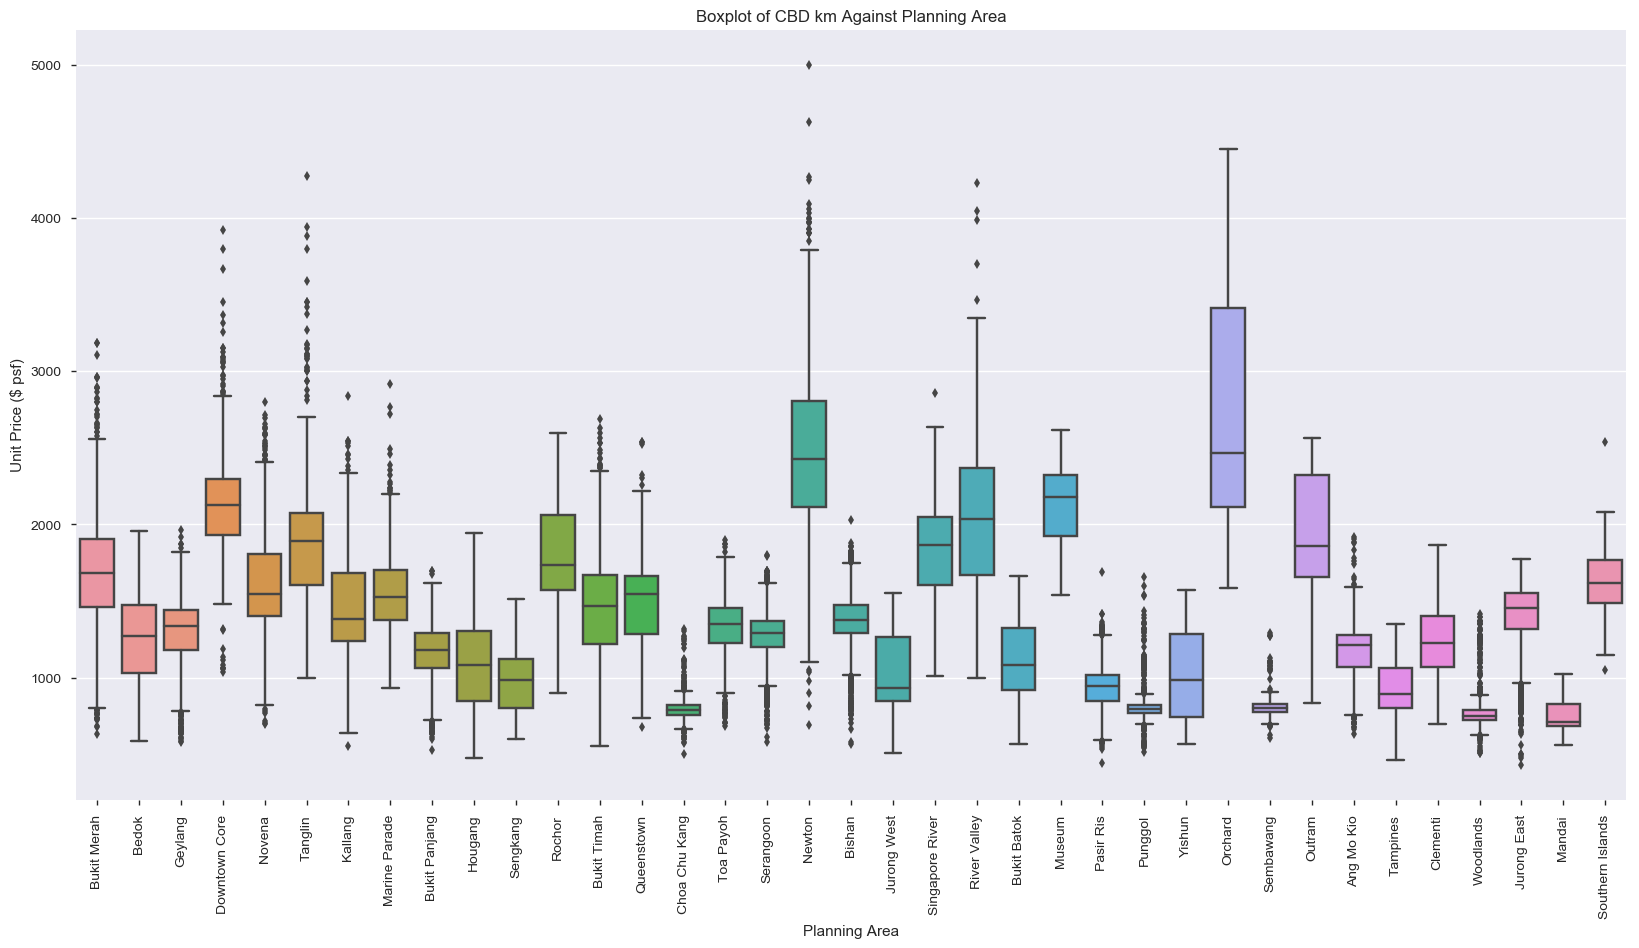

In [51]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x = df["Planning Area"],y = df["Unit Price ($ psf)"])
plt.title("Boxplot of CBD km Against Planning Area")
plt.xticks(rotation=90)
plt.show()

Based on the two plots above, we can see that for Planning Areas such as Newton, Orchard, River Valley, Downtown Core and Museum, the price range of properties in these area tend to be of a relatively higher price than other properties even though they might not be the nearest to the CBD as compared to other planning areas. For example, properties in Rochor seems to be nearer to CBD, but the price range of these properties are not as high as properties in Musuem. In this case, we want to construct an additional feature "Expensive_Area_Indicator" to be fed into our models to make our models more robust.

In [42]:
def expensive_area_indicator(df):
    if df['Planning Area'] =='Newton':  
        indicator = 1
    elif df['Planning Area'] == 'Orchard':
        indicator = 1
    elif df['Planning Area'] == 'River Valley':
        indicator = 1
    elif df['Planning Area'] == 'Downtown Core':
        indicator = 1
    elif df['Planning Area'] == 'Museum':
        indicator = 1
    else:
        indicator = 0
    return indicator


df['Expensive_Area_Indicator'] = df.apply(expensive_area_indicator, axis=1)

## 5.7. Converting Categorical Data Types - Creating Dummy Variables

In order to fit the categorical data into our models, we have to first create dummy variables for our categorical variables.

In [43]:
df_with_dummy = pd.get_dummies(df,columns = ['Purchaser Address Indicator','Planning Area'])

## 5.8. Create Lucky and Unlucky Unit No and Floor No

In Singapore, auspicious or inauspicious numbers are typically considered when one purchases new goods or services. This belief could therefore extend to the purchase of properties as well. Therefore, based on social-cultural factors in the local context, the following features were created as they are likely to be important in influencing buyers’ decision in purchasing a property:

In [44]:
def isunluckyunit(df):
    string = df['Unit No']
    result = 0
    if string.isdigit() == True:
        number = int(string)
        if number == 4:
               result = 1
        elif number == 44:
                result = 1
        elif number == 144:
                result = 1
        elif number == 244:
                result = 1
        elif number == 344:
                result = 1    
        else:
            result = 0
    return result

def isunluckyfloor(df):
    string = df['Floor No']
    result = 0
    if string.isdigit() == True:
        number = int(string)
        if number == 4:
               result = 1
        else:
            result = 0
    return result

def isluckyunit(df):
    string = df['Unit No']
    result = 0
    if string.isdigit() == True:
        number = int(string)
        if number == 8:
               result = 1
        elif number == 88:
                result = 1
        elif number == 188:
                result = 1
        elif number == 6:
                result = 1
        elif number == 66:
                result = 1
   
        else:
            result = 0
    return result

def isluckyfloor(df):
    string = df['Floor No']
    result = 0
    if string.isdigit() == True:
        number = int(string)
        if number == 8:
               result = 1
        elif number == 6:
                result = 1   
        else:
            result = 0
    return result

In [45]:
df_with_dummy['Isunlucky Unit No'] = df_with_dummy.apply(isunluckyunit, axis=1)
df_with_dummy['Islucky Unit No'] = df_with_dummy.apply(isluckyunit, axis=1)
df_with_dummy['Isunlucky Floor No'] = df_with_dummy.apply(isunluckyfloor, axis=1)
df_with_dummy['Islucky Floor No'] = df_with_dummy.apply(isluckyfloor, axis=1)

df_with_dummy = df_with_dummy.drop(['Unit No','Floor No'],axis = 1)

## 5.9. Re-arranging target variable, 'Unit Price (psf)', to the last column

In [46]:
print('shape of dataset before re-arrangement:', "\n", df_with_dummy.shape, "\n")
cols = df_with_dummy.columns.tolist()
print('Cols before re-arrangement:', "\n", cols, "\n")
cols = cols[1:86] + cols[0:1]


df_with_dummy = df_with_dummy[cols]
print('shape of dataset after re-arrangement:', "\n", df_with_dummy.shape, "\n")
print('Cols after re-arrangement:', "\n", cols, "\n")

shape of dataset before re-arrangement: 
 (51189, 86) 

Cols before re-arrangement: 
 ['Unit Price ($ psf)', 'Property Type', 'Type of Sale', 'Floor No (Final)', 'Age', 'Tenure (Final)', 'No of Residents (Million)', 'Age 65 and above (% of total residents)', 'Tenants (% of total households)', 'Uni Qualification (% of total)', 'CBD km', 'childcare centre km', 'community club km', 'elderly care centre km', 'exercise facility km', 'URA growth area km', 'hawker centre and market km', 'hospital/polyclinic km', 'kindergarten km', 'library km', 'MRT station km', 'park km', 'private school km', 'primary school km', 'top primary school km', 'secondary school km', 'junior college km', 'higher education school km', 'shopping mall km', 'supermarket/hypermarket km', 'bus stop km', 'bus interchange km', 'No of Units', 'Security', 'Carpark', 'Entertainment', 'Food/Dining', 'Family-Friendly', 'Fitness', 'Function Room', 'Area (sqf)', 'Expensive_Area_Indicator', 'Purchaser Address Indicator_HDB', 'Purc

# 6.0 Spliting Dataset Into Train and Test

## 6.1. Split by Property Type and Sale Type

In [47]:
condo = df_with_dummy[df_with_dummy['Property Type'] == "Condominium"]
condo_NS = condo[condo['Type of Sale'] != "Resale"]
condo_RS = condo[condo['Type of Sale'] == "Resale"]
condo_NS = condo_NS.drop(['Property Type','Type of Sale'],axis = 1)
condo_RS = condo_RS.drop(['Property Type','Type of Sale'],axis = 1)
condo = condo.drop(['Property Type'],axis = 1)

apart = df_with_dummy[df_with_dummy['Property Type'] == "Apartment"]
apart_NS = apart[apart['Type of Sale'] != "Resale"]
apart_RS = apart[(apart['Type of Sale'] == "Resale")]
apart_NS = apart_NS.drop(['Property Type','Type of Sale'],axis = 1)
apart_RS = apart_RS.drop(['Property Type','Type of Sale'],axis = 1)
apart = apart.drop(['Property Type'],axis = 1)

Econdo = df_with_dummy[df_with_dummy['Property Type'] == "Executive Condominium"]
Econdo_NS = Econdo[Econdo['Type of Sale'] != "Resale"]
Econdo_RS = Econdo[(Econdo['Type of Sale'] == "Resale")]
Econdo_NS = Econdo_NS.drop(['Property Type','Type of Sale'],axis = 1)
Econdo_RS = Econdo_RS.drop(['Property Type','Type of Sale'],axis = 1)
Econdo = Econdo.drop(['Property Type'],axis = 1)

## 6.2. Split X and Y

In [48]:
x_apart_NS = apart_NS.iloc[:,:-1]
y_apart_NS = apart_NS.iloc[:,-1]

x_apart_RS = apart_RS.iloc[:,:-1]
y_apart_RS = apart_RS.iloc[:,-1]

x_condo_NS = condo_NS.iloc[:,:-1]
y_condo_NS = condo_NS.iloc[:,-1]

x_condo_RS = condo_RS.iloc[:,:-1]
y_condo_RS = condo_RS.iloc[:,-1]

x_Econdo_NS = Econdo_NS.iloc[:,:-1]
y_Econdo_NS = Econdo_NS.iloc[:,-1]

x_Econdo_RS = Econdo_RS.iloc[:,:-1]
y_Econdo_RS = Econdo_RS.iloc[:,-1]


## 6.3. Split Train and Test

In [49]:
np.random.seed(2018)
train_apart_NS = np.random.choice([True, False], x_apart_NS.shape[0], replace=True, p=[0.6, 0.4])
train_apart_RS = np.random.choice([True, False], x_apart_RS.shape[0], replace=True, p=[0.6, 0.4])

train_condo_NS = np.random.choice([True, False], x_condo_NS.shape[0], replace=True, p=[0.6, 0.4])
train_condo_RS = np.random.choice([True, False], x_condo_RS.shape[0], replace=True, p=[0.6, 0.4])

train_Econdo_NS = np.random.choice([True, False], x_Econdo_NS.shape[0], replace=True, p=[0.6, 0.4])
train_Econdo_RS = np.random.choice([True, False], x_Econdo_RS.shape[0], replace=True, p=[0.6, 0.4])



x_apart_NS_train, y_apart_NS_train = x_apart_NS.iloc[train_apart_NS, :], y_apart_NS.iloc[train_apart_NS]
x_apart_NS_test, y_apart_NS_test = x_apart_NS.iloc[~train_apart_NS, :], y_apart_NS.iloc[~train_apart_NS]

x_apart_RS_train, y_apart_RS_train = x_apart_RS.iloc[train_apart_RS, :], y_apart_RS.iloc[train_apart_RS]
x_apart_RS_test, y_apart_RS_test = x_apart_RS.iloc[~train_apart_RS, :], y_apart_RS.iloc[~train_apart_RS]

x_condo_NS_train, y_condo_NS_train = x_condo_NS.iloc[train_condo_NS, :], y_condo_NS.iloc[train_condo_NS]
x_condo_NS_test, y_condo_NS_test = x_condo_NS.iloc[~train_condo_NS, :], y_condo_NS.iloc[~train_condo_NS]

x_condo_RS_train, y_condo_RS_train = x_condo_RS.iloc[train_condo_RS, :], y_condo_RS.iloc[train_condo_RS]
x_condo_RS_test, y_condo_RS_test = x_condo_RS.iloc[~train_condo_RS, :], y_condo_RS.iloc[~train_condo_RS]

x_Econdo_NS_train, y_Econdo_NS_train = x_Econdo_NS.iloc[train_Econdo_NS, :], y_Econdo_NS.iloc[train_Econdo_NS]
x_Econdo_NS_test, y_Econdo_NS_test = x_Econdo_NS.iloc[~train_Econdo_NS, :], y_Econdo_NS.iloc[~train_Econdo_NS]

x_Econdo_RS_train, y_Econdo_RS_train = x_Econdo_RS.iloc[train_Econdo_RS, :], y_Econdo_RS.iloc[train_Econdo_RS]
x_Econdo_RS_test, y_Econdo_RS_test = x_Econdo_RS.iloc[~train_Econdo_RS, :], y_Econdo_RS.iloc[~train_Econdo_RS]


## 6.4 Back up all x of train and test data as original before standardization for linear regression 

In [50]:
x_apart_NS_train_original = x_apart_NS_train
x_apart_NS_test_original = x_apart_NS_test

x_apart_RS_train_original = x_apart_RS_train
x_apart_RS_test_original = x_apart_RS_test

x_condo_NS_train_original =x_condo_NS_train
x_condo_NS_test_orinigal =x_condo_NS_test

x_condo_RS_train_original =x_condo_RS_train
x_condo_RS_test_original =x_condo_RS_test

x_Econdo_NS_train_orinigal =x_Econdo_NS_train
x_Econdo_NS_test_original =x_Econdo_NS_test

x_Econdo_RS_train_original =x_Econdo_RS_train
x_Econdo_RS_test_original =x_Econdo_RS_test


# 7.0.Model Building

## 7.1. Linear Regression

### 7.1.1 MinMaxScaler

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_apart_NS_train = scaler.fit_transform(x_apart_NS_train)
x_apart_NS_test = scaler.transform(x_apart_NS_test)

x_apart_RS_train = scaler.fit_transform(x_apart_RS_train)
x_apart_RS_test = scaler.transform(x_apart_RS_test)

x_condo_NS_train = scaler.fit_transform(x_condo_NS_train)
x_condo_NS_test = scaler.transform(x_condo_NS_test)

x_condo_RS_train = scaler.fit_transform(x_condo_RS_train)
x_condo_RS_test = scaler.transform(x_condo_RS_test)

x_Econdo_NS_train = scaler.fit_transform(x_Econdo_NS_train)
x_Econdo_NS_test = scaler.transform(x_Econdo_NS_test)

x_Econdo_RS_train = scaler.fit_transform(x_Econdo_RS_train)
x_Econdo_RS_test = scaler.transform(x_Econdo_RS_test)

#### 7.1.2 Apartments New Sale

In [62]:
x_columns_all = Econdo_NS.columns

In [63]:
# Lasso regression
alphas = [0.01, 0.1, 1, 10, 100]
MSE = []
r2 = []
complexity = []
cost = []
lasso = linear_model.Lasso()

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x_apart_NS_train, y_apart_NS_train)
    apartment_y_pred = lasso.predict(x_apart_NS_test)
    error = metrics.mean_squared_error(apartment_y_pred, y_apart_NS_test)
    MSE.append(error)
    r2.append(lasso.score(x_apart_NS_test, y_apart_NS_test))
    c = (np.linalg.norm(lasso.coef_, ord = 1))
    complexity.append(c)
    cost.append(error + (a*c))

[21880.904084939775, 22203.39572192302, 27999.826609891254, 56975.684582791655, 198067.45664915195]


([<matplotlib.axis.XTick at 0x1aa4d7cd860>,
 <a list of 5 Text xticklabel objects>)

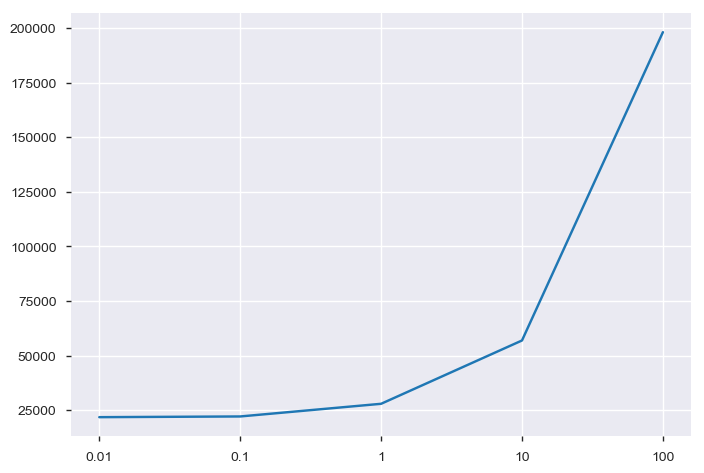

In [64]:
print(MSE)
plt.plot(range(5), MSE)
plt.xticks(np.arange(5), alphas)

[0.8894990429484656, 0.887870424935726, 0.8585978154440358, 0.7122665658317948, -0.0002623034008344405]


([<matplotlib.axis.XTick at 0x1aa4dc51470>,
 <a list of 5 Text xticklabel objects>)

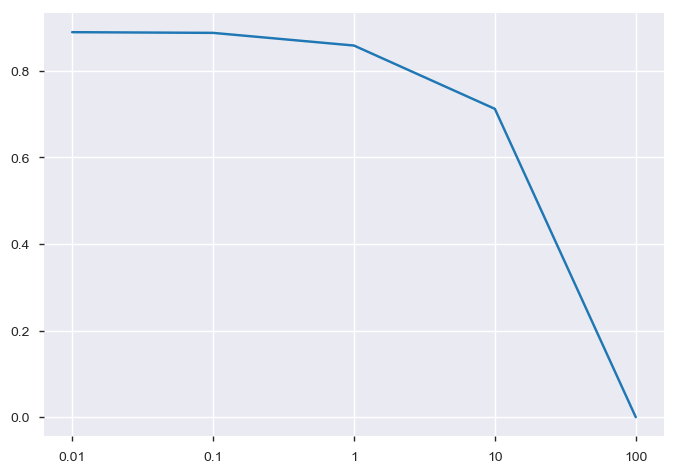

In [65]:
print(r2)
plt.plot(range(5), r2)
plt.xticks(np.arange(5), alphas)

[16605.191558475704, 12812.204694526703, 5749.319616687666, 1697.3595149268394, 0.0]


([<matplotlib.axis.XTick at 0x1aa51656908>,
 <a list of 5 Text xticklabel objects>)

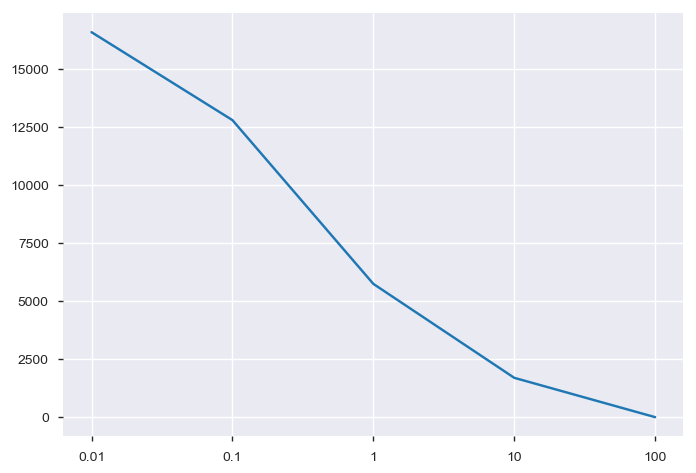

In [66]:
print(complexity)
plt.plot(range(5), complexity)
plt.xticks(np.arange(5), alphas)

In [67]:
# Check variable importance from lasso regression
lasso.set_params(alpha = 1)
lasso.fit(x_apart_NS_train, y_apart_NS_train)
lasso.predict(x_apart_NS_test)
lasso_coef = lasso.coef_
print(x_columns_all[np.argsort(np.absolute(lasso_coef))])
print(np.sort(np.absolute(lasso_coef)))
np.count_nonzero(lasso_coef)

Index(['Planning Area_Choa Chu Kang', 'junior college km',
       'Planning Area_Bukit Batok', 'Planning Area_Punggol',
       'supermarket/hypermarket km', 'Planning Area_Pasir Ris',
       'Planning Area_Outram', 'Planning Area_Orchard', 'Planning Area_Novena',
       'Planning Area_Hougang', 'Planning Area_Museum', 'Family-Friendly',
       'Planning Area_Marine Parade', 'Planning Area_Jurong East',
       'Planning Area_Mandai', 'Planning Area_Jurong West',
       'Purchaser Address Indicator_HDB', 'Purchaser Address Indicator_N.A',
       'Isunlucky Floor No', 'Food/Dining', 'Planning Area_Ang Mo Kio',
       'top primary school km', 'private school km', 'Age',
       'Planning Area_Bukit Panjang', 'Isunlucky Unit No',
       'Age 65 and above (% of total residents)', 'Planning Area_Woodlands',
       'Planning Area_Tampines', 'Planning Area_Southern Islands',
       'childcare centre km', 'community club km', 'elderly care centre km',
       'Planning Area_Singapore River', 'URA 

41

In [68]:
# Try out top 10 features
x_apart_NS_train_reg = x_apart_NS_train[:, np.argsort(np.absolute(lasso_coef))[-10:]]
x_apart_NS_test_reg = x_apart_NS_test[:, np.argsort(np.absolute(lasso_coef))[-10:]]

In [69]:
# Linear regression with 10 features
reg = linear_model.LinearRegression().fit(x_apart_NS_train_reg, y_apart_NS_train)
apartment_y_pred = reg.predict(x_apart_NS_train_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(apartment_y_pred, y_apart_NS_train)) 
      + "\nR^2: " 
      + str(reg.score(x_apart_NS_train_reg, y_apart_NS_train)))

apartment_y_pred = reg.predict(x_apart_NS_test_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(apartment_y_pred, y_apart_NS_test)) 
      + "\nR^2: " 
      + str(reg.score(x_apart_NS_test_reg, y_apart_NS_test)))

MSE: 44682.31307784779
R^2: 0.7724887333243623
MSE: 45059.957655488615
R^2: 0.7724422891163727


In [70]:
# Try out all selected features
x_apart_NS_train_reg = x_apart_NS_train[:, np.argsort(np.absolute(lasso_coef))[-41:]]
x_apart_NS_test_reg = x_apart_NS_test[:, np.argsort(np.absolute(lasso_coef))[-41:]]
x_columns = x_columns_all[np.argsort(np.absolute(lasso_coef))][-41:]

In [71]:
# Linear regression with all selected features
reg = linear_model.LinearRegression().fit(x_apart_NS_train_reg, y_apart_NS_train)
apartment_y_pred = reg.predict(x_apart_NS_train_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(apartment_y_pred, y_apart_NS_train)) 
      + "\nR^2: " 
      + str(reg.score(x_apart_NS_train_reg, y_apart_NS_train)))

apartment_y_pred = reg.predict(x_apart_NS_test_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(apartment_y_pred, y_apart_NS_test))
      + "\nR^2: " 
      + str(reg.score(x_apart_NS_test_reg, y_apart_NS_test)))

reg_coef = reg.coef_
print(x_columns[np.argsort(np.absolute(reg_coef))])
print(np.sort(np.absolute(reg_coef)))

MSE: 24872.437851267925
R^2: 0.8733557094281564
MSE: 25369.944903353426
R^2: 0.8718790054888644
Index(['Function Room', 'No of Residents (Million)', 'hospital/polyclinic km',
       'Purchaser Address Indicator_Private', 'Islucky Floor No',
       'Islucky Unit No', 'Entertainment', 'Expensive_Area_Indicator',
       'exercise facility km', 'primary school km', 'Planning Area_Sengkang',
       'shopping mall km', 'higher education school km', 'Carpark',
       'Planning Area_Tanglin', 'Fitness', 'Security', 'Planning Area_Bishan',
       'No of Units', 'Planning Area_Clementi', 'Planning Area_Bukit Merah',
       'park km', 'Planning Area_Queenstown',
       'Tenants (% of total households)', 'Tenure (Final)',
       'Planning Area_Kallang', 'bus stop km', 'Planning Area_Toa Payoh',
       'Planning Area_Downtown Core', 'kindergarten km',
       'Planning Area_Bukit Timah', 'Uni Qualification (% of total)',
       'secondary school km', 'MRT station km', 'Planning Area_Yishun',
       

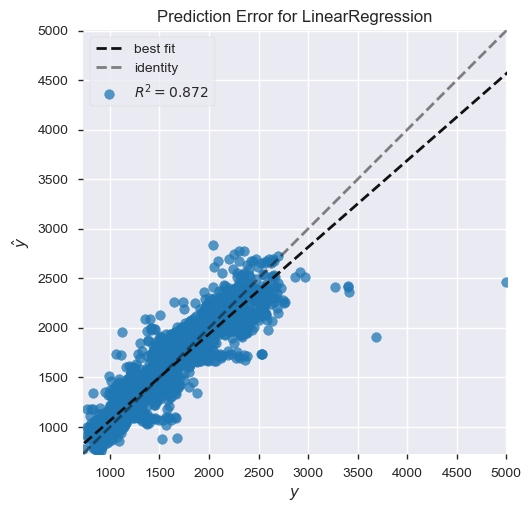

In [73]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
#lasso = Lasso()
visualizer = PredictionError(reg)

visualizer.fit(x_apart_NS_train_reg, y_apart_NS_train)  # Fit the training data to the visualizer
visualizer.score(x_apart_NS_test_reg, y_apart_NS_test)  # Evaluate the model on the test data
g = visualizer.poof()

### 7.1.3 Apartments Resale

In [74]:
# Lasso regression
alphas = [0.01, 0.1, 1, 10, 100]

MSE = []
r2 = []
complexity = []
cost = []
lasso = linear_model.Lasso()

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x_apart_RS_train, y_apart_RS_train)
    apartment_y_pred = lasso.predict(x_apart_RS_test)
    error = metrics.mean_squared_error(apartment_y_pred, y_apart_RS_test)
    MSE.append(error)
    r2.append(lasso.score(x_apart_RS_test, y_apart_RS_test))
    c = (np.linalg.norm(lasso.coef_, ord = 1))
    complexity.append(c)
    cost.append(error + (a*c))

[51034.98419765009, 51108.473462065274, 54787.556405924886, 89564.97497326396, 254129.29118252467]


([<matplotlib.axis.XTick at 0x1aa514fe9e8>,
 <a list of 5 Text xticklabel objects>)

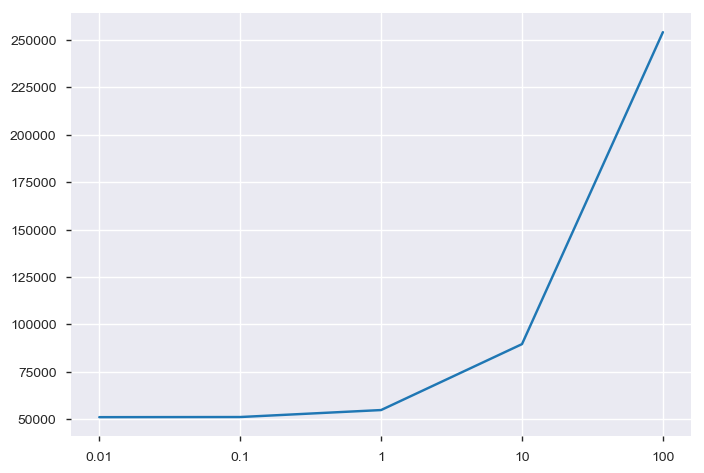

In [75]:
print(MSE)
plt.plot(range(5), MSE)
plt.xticks(np.arange(5), alphas)

[0.8130831555955833, 0.8128139994154053, 0.7993392705606832, 0.6719661472544571, 0.06924542203040662]


([<matplotlib.axis.XTick at 0x1aa4dc7b198>,
 <a list of 5 Text xticklabel objects>)

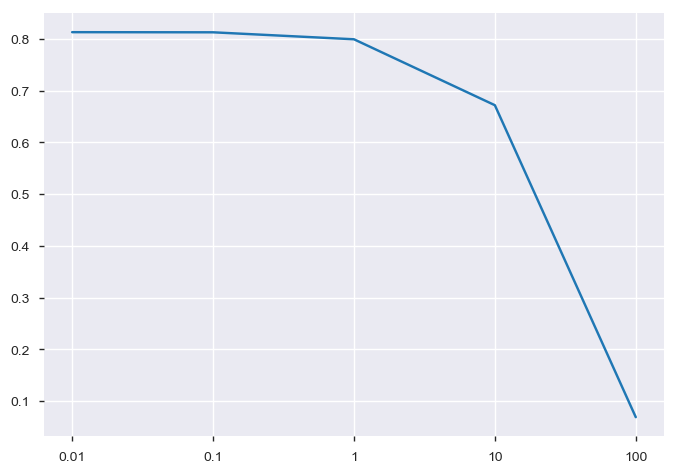

In [76]:
print(r2)
plt.plot(range(5), r2)
plt.xticks(np.arange(5), alphas)

[14790.988853895513, 12211.645308241626, 7273.685338690555, 2457.5702913247164, 84.85042040768856]


([<matplotlib.axis.XTick at 0x1aa4db52828>,
 <a list of 5 Text xticklabel objects>)

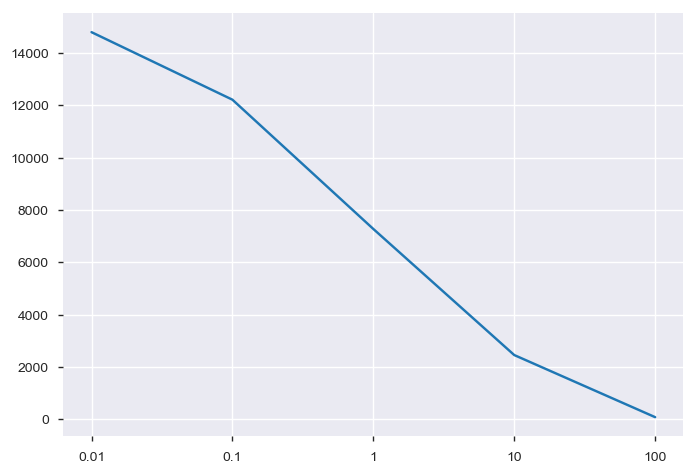

In [77]:
print(complexity)
plt.plot(range(5), complexity)
plt.xticks(np.arange(5), alphas)

In [78]:
# Check variable importance for lasso regression
lasso.set_params(alpha = 0.1)
lasso.fit(x_apart_RS_train, y_apart_RS_train)
lasso.predict(x_apart_RS_test)
lasso_coef = lasso.coef_
print(x_columns_all[np.argsort(np.absolute(lasso_coef))])
print(np.sort(np.absolute(lasso_coef)))
np.count_nonzero(lasso_coef)

Index(['Purchaser Address Indicator_Private', 'Planning Area_Yishun',
       'Planning Area_Southern Islands', 'Planning Area_Serangoon',
       'Age 65 and above (% of total residents)',
       'Tenants (% of total households)', 'Uni Qualification (% of total)',
       'Planning Area_Punggol', 'Planning Area_Mandai', 'Planning Area_Bedok',
       'Planning Area_Ang Mo Kio', 'Purchaser Address Indicator_N.A',
       'Purchaser Address Indicator_HDB', 'junior college km',
       'Islucky Floor No', 'private school km', 'bus stop km',
       'Isunlucky Floor No', 'Planning Area_Museum', 'Planning Area_Novena',
       'Entertainment', 'Islucky Unit No', 'Planning Area_Bukit Batok',
       'Planning Area_Pasir Ris', 'top primary school km', 'Family-Friendly',
       'Security', 'Isunlucky Unit No', 'Food/Dining', 'park km',
       'Planning Area_Bishan', 'Carpark', 'Planning Area_Rochor',
       'Planning Area_Sembawang', 'Planning Area_Outram',
       'Planning Area_Jurong East', 'Plannin

69

In [79]:
x_apart_RS_train_reg = x_apart_RS_train[:, np.argsort(np.absolute(lasso_coef))[-10:]]
x_apart_RS_test_reg = x_apart_RS_test[:, np.argsort(np.absolute(lasso_coef))[-10:]]

In [80]:
# Linear regression
reg = linear_model.LinearRegression().fit(x_apart_RS_train_reg, y_apart_RS_train)
apartment_y_pred = reg.predict(x_apart_RS_test_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(apartment_y_pred, y_apart_RS_test)) 
      + "\nR^2: " 
      + str(reg.score(x_apart_RS_test_reg, y_apart_RS_test)))

MSE: 78925.67494044268
R^2: 0.7109328368708385


In [81]:
x_apart_RS_train_reg = x_apart_RS_train[:, np.argsort(np.absolute(lasso_coef))[-69:]]
x_apart_RS_test_reg = x_apart_RS_test[:, np.argsort(np.absolute(lasso_coef))[-69:]]
x_columns = x_columns_all[np.argsort(np.absolute(lasso_coef))][-69:]

In [82]:
# Linear regression
reg = linear_model.LinearRegression().fit(x_apart_RS_train_reg, y_apart_RS_train)
apartment_y_pred = reg.predict(x_apart_RS_train_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(apartment_y_pred, y_apart_RS_train)) 
      + "\nR^2: " 
      + str(reg.score(x_apart_RS_train_reg, y_apart_RS_train)))

apartment_y_pred = reg.predict(x_apart_RS_test_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(apartment_y_pred, y_apart_RS_test)) 
      + "\nR^2: " 
      + str(reg.score(x_apart_RS_test_reg, y_apart_RS_test)))

#reg_coef = reg.coef_
#print(x_columns[np.argsort(np.absolute(reg_coef))])
#print(np.sort(np.absolute(reg_coef)))

MSE: 42728.70940902772
R^2: 0.8398060551183125
MSE: 52413.63599417136
R^2: 0.8080338105749161


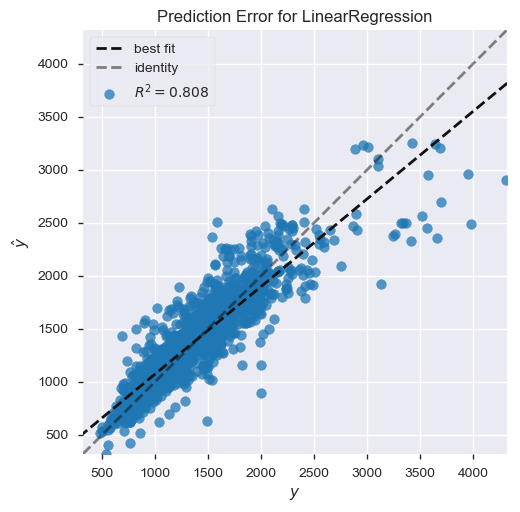

In [83]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
#lasso = Lasso()
visualizer = PredictionError(reg)

visualizer.fit(x_apart_RS_train_reg, y_apart_RS_train)  # Fit the training data to the visualizer
visualizer.score(x_apart_RS_test_reg, y_apart_RS_test)  # Evaluate the model on the test data
g = visualizer.poof()

### 7.1.4 Condominiums New Sale

In [84]:
# Lasso regression
alphas = [0.01, 0.1, 1, 10, 100]
MSE = []
r2 = []
complexity = []
cost = []
lasso = linear_model.Lasso()

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x_condo_NS_train, y_condo_NS_train)
    condo_y_pred = lasso.predict(x_condo_NS_test)
    error = metrics.mean_squared_error(condo_y_pred, y_condo_NS_test)
    MSE.append(error)
    r2.append(lasso.score(x_condo_NS_test, y_condo_NS_test))
    c = (np.linalg.norm(lasso.coef_, ord = 1))
    complexity.append(c)
    cost.append(error + (a*c))

[17624.464774302905, 17778.887001450697, 22381.485264842617, 49722.427426859984, 128593.95285574696]


([<matplotlib.axis.XTick at 0x1aa4d4aba20>,
 <a list of 5 Text xticklabel objects>)

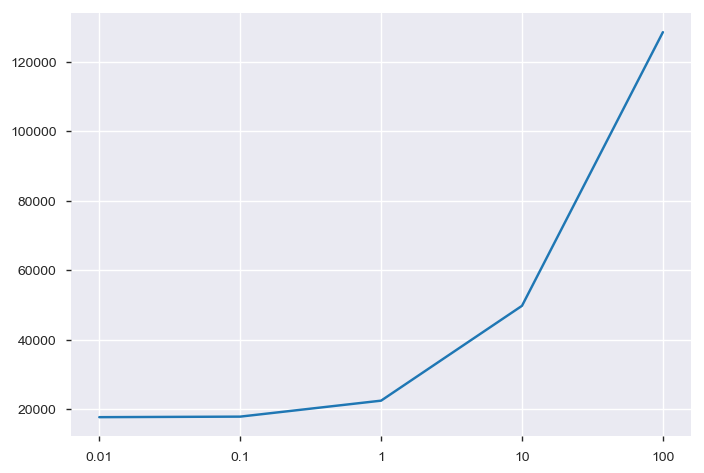

In [85]:
print(MSE)
plt.plot(range(5), MSE)
plt.xticks(np.arange(5), alphas)

[0.8629392862026999, 0.8617383861498424, 0.8259452195838715, 0.6133220791591709, -4.052288289457806e-05]


([<matplotlib.axis.XTick at 0x1aa4da65240>,
 <a list of 5 Text xticklabel objects>)

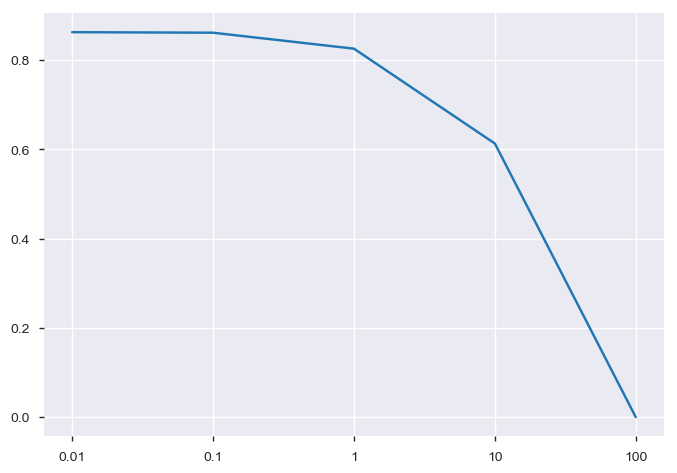

In [86]:
print(r2)
plt.plot(range(5), r2)
plt.xticks(np.arange(5), alphas)

[11746.51917135971, 10230.356294968366, 5538.200498898873, 1416.180030384652, 0.0]


([<matplotlib.axis.XTick at 0x1aa4d59c2e8>,
 <a list of 5 Text xticklabel objects>)

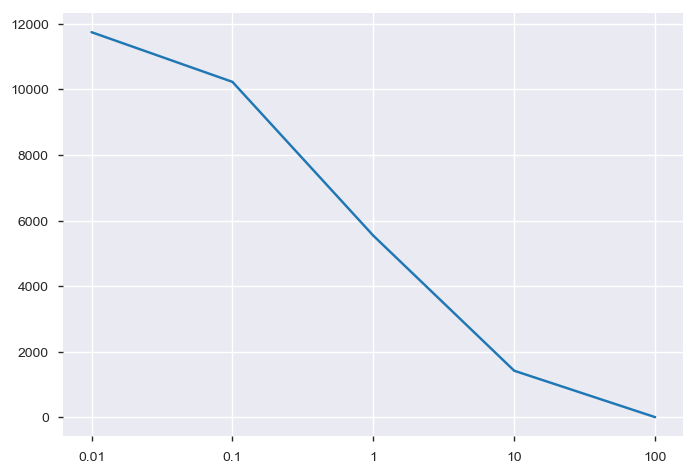

In [87]:
print(complexity)
plt.plot(range(5), complexity)
plt.xticks(np.arange(5), alphas)

In [88]:
# Check variable importance for lasso regression
lasso.set_params(alpha = 1)
lasso.fit(x_condo_NS_train, y_condo_NS_train)
lasso.predict(x_condo_NS_test)
lasso_coef = lasso.coef_
print(x_columns_all[np.argsort(np.absolute(lasso_coef))])
print(np.sort(np.absolute(lasso_coef)))
np.count_nonzero(lasso_coef)

Index(['Purchaser Address Indicator_Private', 'Isunlucky Floor No',
       'Planning Area_Bishan', 'Planning Area_Bukit Batok',
       'Planning Area_Bukit Timah', 'Planning Area_Choa Chu Kang',
       'Planning Area_Clementi', 'Planning Area_Downtown Core',
       'Planning Area_Geylang', 'Planning Area_Hougang',
       'Planning Area_Jurong East', 'Planning Area_Mandai',
       'Planning Area_Marine Parade', 'Planning Area_Museum',
       'Planning Area_Novena', 'Planning Area_Orchard', 'Planning Area_Outram',
       'Planning Area_Punggol', 'Planning Area_Queenstown',
       'Planning Area_River Valley', 'Planning Area_Rochor',
       'Planning Area_Sembawang', 'Planning Area_Serangoon',
       'Planning Area_Singapore River', 'Planning Area_Southern Islands',
       'Planning Area_Tanglin', 'Planning Area_Woodlands',
       'Planning Area_Yishun', 'Isunlucky Unit No', 'Islucky Unit No',
       'Purchaser Address Indicator_N.A', 'Family-Friendly',
       'Islucky Floor No', 'URA gro

36

In [89]:
# Try out top 10 features
x_condo_NS_train_reg = x_condo_NS_train[:, np.argsort(np.absolute(lasso_coef))[-10:]]
x_condo_NS_test_reg = x_condo_NS_test[:, np.argsort(np.absolute(lasso_coef))[-10:]]

In [90]:
# Linear regression with 10 features
reg = linear_model.LinearRegression().fit(x_condo_NS_train_reg, y_condo_NS_train)
condo_y_pred = reg.predict(x_condo_NS_train_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(condo_y_pred, y_condo_NS_train)) 
      + "\nR^2: " 
      + str(reg.score(x_condo_NS_train_reg, y_condo_NS_train)))

condo_y_pred = reg.predict(x_condo_NS_test_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(condo_y_pred, y_condo_NS_test)) 
      + "\nR^2: " 
      + str(reg.score(x_condo_NS_test_reg, y_condo_NS_test)))

MSE: 29255.355478510897
R^2: 0.7671806245770855
MSE: 28826.762929723158
R^2: 0.775822031805804


In [91]:
# Try out all selected features
x_condo_NS_train_reg = x_condo_NS_train[:, np.argsort(np.absolute(lasso_coef))[-36:]]
x_condo_NS_test_reg = x_condo_NS_test[:, np.argsort(np.absolute(lasso_coef))[-36:]]
x_columns = x_columns_all[np.argsort(np.absolute(lasso_coef))][-36:]

In [92]:
# Linear regression with all selected features
reg = linear_model.LinearRegression().fit(x_condo_NS_train_reg, y_condo_NS_train)
condo_y_pred = reg.predict(x_condo_NS_train_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(condo_y_pred, y_condo_NS_train)) 
      + "\nR^2: " 
      + str(reg.score(x_condo_NS_train_reg, y_condo_NS_train)))

condo_y_pred = reg.predict(x_condo_NS_test_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(condo_y_pred, y_condo_NS_test)) 
      + "\nR^2: " 
      + str(reg.score(x_condo_NS_test_reg, y_condo_NS_test)))

#reg_coef = reg.coef_
#print(x_columns[np.argsort(np.absolute(reg_coef))])
#print(np.sort(np.absolute(reg_coef)))

MSE: 19873.648750780416
R^2: 0.8418419323966254
MSE: 19323.004038936735
R^2: 0.8497302039976682


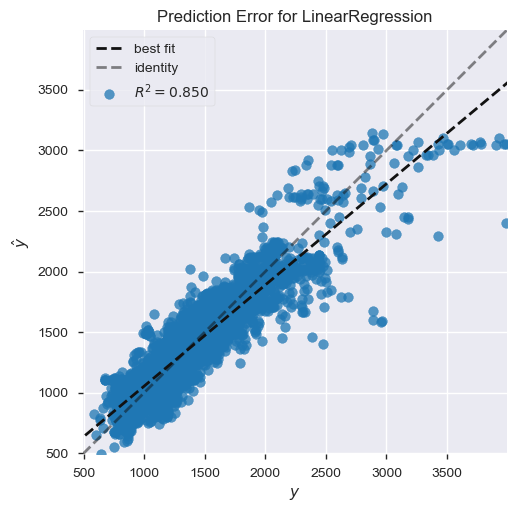

In [93]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
#lasso = Lasso()
visualizer = PredictionError(reg)

visualizer.fit(x_condo_NS_train_reg, y_condo_NS_train)  # Fit the training data to the visualizer
visualizer.score(x_condo_NS_test_reg, y_condo_NS_test)  # Evaluate the model on the test data
g = visualizer.poof()

### 7.1.5 Condominiums Resale

In [94]:
# Lasso regression
alphas = [0.01, 0.1, 1, 10, 100]

MSE = []
r2 = []
complexity = []
cost = []
lasso = linear_model.Lasso()

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x_condo_RS_train, y_condo_RS_train)
    condo_y_pred = lasso.predict(x_condo_RS_test)
    error = metrics.mean_squared_error(condo_y_pred, y_condo_RS_test)
    MSE.append(error)
    r2.append(lasso.score(x_condo_RS_test, y_condo_RS_test))
    c = (np.linalg.norm(lasso.coef_, ord = 1))
    complexity.append(c)
    cost.append(error + (a*c))

[32717.124793355895, 32911.89766130345, 37056.99696184313, 57188.74074175659, 171706.3638606792]


([<matplotlib.axis.XTick at 0x1aa4d76bcc0>,
 <a list of 5 Text xticklabel objects>)

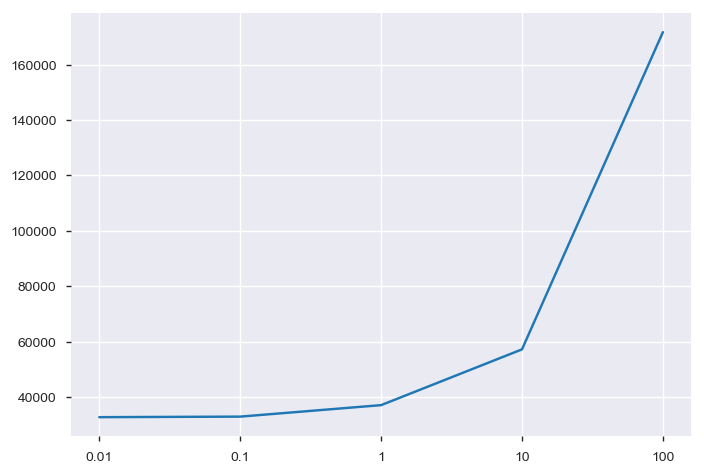

In [95]:
print(MSE)
plt.plot(range(5), MSE)
plt.xticks(np.arange(5), alphas)

[0.8094234366675809, 0.8082888888111206, 0.7841437726263119, 0.6668767888159298, -0.00018595562894563322]


([<matplotlib.axis.XTick at 0x1aa4d54b278>,
 <a list of 5 Text xticklabel objects>)

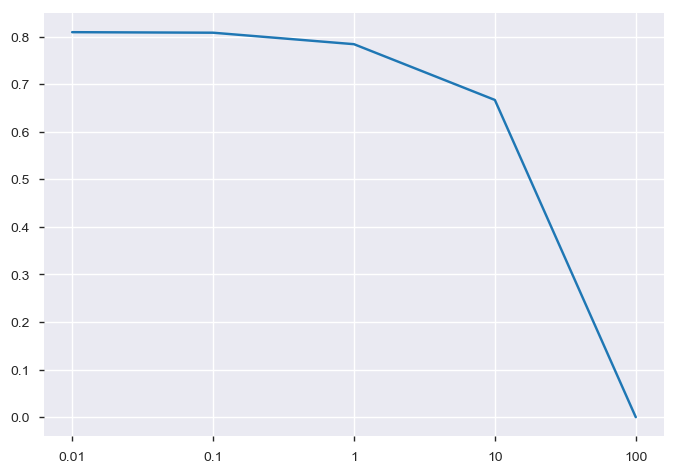

In [96]:
print(r2)
plt.plot(range(5), r2)
plt.xticks(np.arange(5), alphas)

[10710.540155525514, 9607.32575242957, 5486.425461903985, 2030.6476178465427, 0.0]


([<matplotlib.axis.XTick at 0x1aa5993cb38>,
 <a list of 5 Text xticklabel objects>)

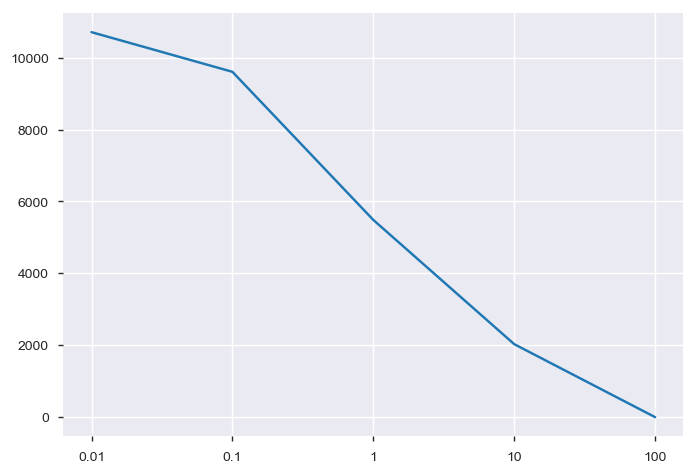

In [97]:
print(complexity)
plt.plot(range(5), complexity)
plt.xticks(np.arange(5), alphas)

In [98]:
# Check variable importance for lasso regression
lasso.set_params(alpha = 1)
lasso.fit(x_condo_RS_train, y_condo_RS_train)
lasso.predict(x_condo_RS_test)
lasso_coef = lasso.coef_
print(x_columns_all[np.argsort(np.absolute(lasso_coef))])
print(np.sort(np.absolute(lasso_coef)))
np.count_nonzero(lasso_coef)

Index(['Islucky Floor No', 'Isunlucky Floor No', 'Planning Area_Ang Mo Kio',
       'Planning Area_Bedok', 'supermarket/hypermarket km',
       'Planning Area_Bukit Panjang', 'higher education school km',
       'Planning Area_Clementi', 'Planning Area_Downtown Core',
       'Planning Area_Jurong East', 'Planning Area_Mandai',
       'private school km', 'Planning Area_Marine Parade',
       'Planning Area_Museum', 'Planning Area_Orchard', 'Planning Area_Outram',
       'hospital/polyclinic km', 'Planning Area_Punggol', 'URA growth area km',
       'Planning Area_Queenstown', 'elderly care centre km',
       'Planning Area_Rochor', 'Planning Area_Sembawang',
       'Planning Area_Sengkang', 'Planning Area_Singapore River',
       'Planning Area_Tampines', 'Planning Area_Toa Payoh',
       'Planning Area_Woodlands', 'Planning Area_Yishun', 'Islucky Unit No',
       'Purchaser Address Indicator_N.A', 'Area (sqf)',
       'Purchaser Address Indicator_Private', 'No of Units', 'Function Roo

51

In [99]:
x_condo_RS_train_reg = x_condo_RS_train[:, np.argsort(np.absolute(lasso_coef))[-10:]]
x_condo_RS_test_reg = x_condo_RS_test[:, np.argsort(np.absolute(lasso_coef))[-10:]]

In [100]:
# Linear regression
reg = linear_model.LinearRegression().fit(x_condo_RS_train_reg, y_condo_RS_train)
condo_y_pred = reg.predict(x_condo_RS_train_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(condo_y_pred, y_condo_RS_train)) 
      + "\nR^2: " 
      + str(reg.score(x_condo_RS_train_reg, y_condo_RS_train)))

condo_y_pred = reg.predict(x_condo_RS_test_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(condo_y_pred, y_condo_RS_test)) 
      + "\nR^2: " 
      + str(reg.score(x_condo_RS_test_reg, y_condo_RS_test)))

MSE: 50425.973280588885
R^2: 0.7273357871740818
MSE: 51941.09321693771
R^2: 0.6974442252021171


In [101]:
x_condo_RS_train_reg = x_condo_RS_train[:, np.argsort(np.absolute(lasso_coef))[-51:]]
x_condo_RS_test_reg = x_condo_RS_test[:, np.argsort(np.absolute(lasso_coef))[-51:]]

In [102]:
# Linear regression
reg = linear_model.LinearRegression().fit(x_condo_RS_train_reg, y_condo_RS_train)
condo_y_pred = reg.predict(x_condo_RS_train_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(condo_y_pred, y_condo_RS_train)) 
      + "\nR^2: " 
      + str(reg.score(x_condo_RS_train_reg, y_condo_RS_train)))

condo_y_pred = reg.predict(x_condo_RS_test_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(condo_y_pred, y_condo_RS_test)) 
      + "\nR^2: " 
      + str(reg.score(x_condo_RS_test_reg, y_condo_RS_test)))

MSE: 34824.193511356476
R^2: 0.8116980061398912
MSE: 35055.73857878747
R^2: 0.7958010605876426


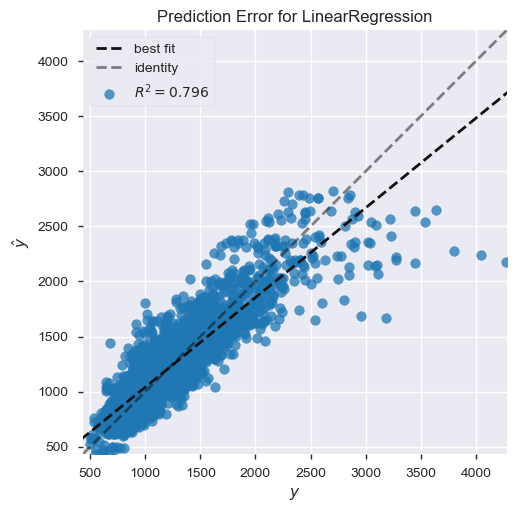

In [103]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
#lasso = Lasso()
visualizer = PredictionError(reg)

visualizer.fit(x_condo_RS_train_reg, y_condo_RS_train)  # Fit the training data to the visualizer
visualizer.score(x_condo_RS_test_reg, y_condo_RS_test)  # Evaluate the model on the test data
g = visualizer.poof()

### 7.1.6 Executive Condominiums New Sale

In [104]:
# Lasso regression
alphas = [0.01, 0.1, 1, 10, 100]

MSE = []
r2 = []
complexity = []
cost = []
lasso = linear_model.Lasso()

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x_Econdo_NS_train, y_Econdo_NS_train)
    Econdo_y_pred = lasso.predict(x_Econdo_NS_test)
    error = metrics.mean_squared_error(Econdo_y_pred, y_Econdo_NS_test)
    MSE.append(error)
    r2.append(lasso.score(x_Econdo_NS_test, y_Econdo_NS_test))
    c = (np.linalg.norm(lasso.coef_, ord = 1))
    complexity.append(c)
    cost.append(error + (a*c))

[1184.192664500002, 1203.524640408737, 1721.3086750206753, 3009.966285567374, 3076.308971032641]


([<matplotlib.axis.XTick at 0x1aa597df390>,
 <a list of 5 Text xticklabel objects>)

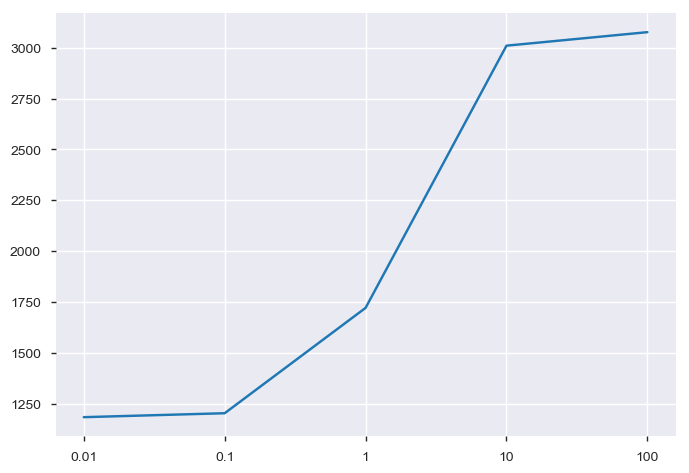

In [105]:
print(MSE)
plt.plot(range(5), MSE)
plt.xticks(np.arange(5), alphas)

[0.6147741320821603, 0.6084853098142453, 0.4400466679386822, 0.02083764785799691, -0.0007440755849095204]


([<matplotlib.axis.XTick at 0x1aa4d974588>,
 <a list of 5 Text xticklabel objects>)

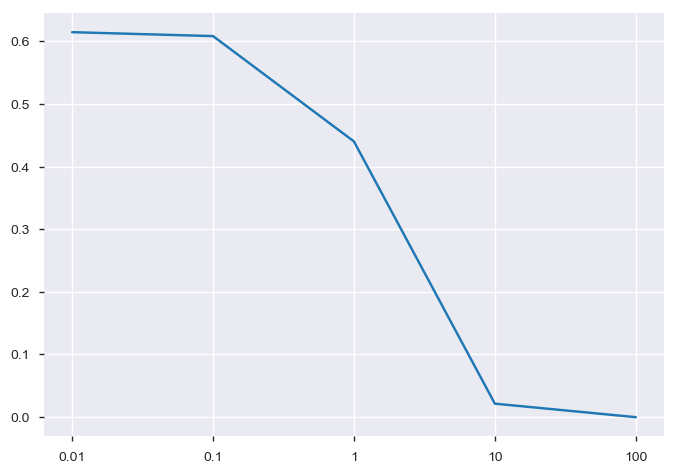

In [106]:
print(r2)
plt.plot(range(5), r2)
plt.xticks(np.arange(5), alphas)

[1278.9050359533214, 847.3423065132165, 273.4679535177648, 3.2324119981701074, 0.0]


([<matplotlib.axis.XTick at 0x1aa4d45c390>,
 <a list of 5 Text xticklabel objects>)

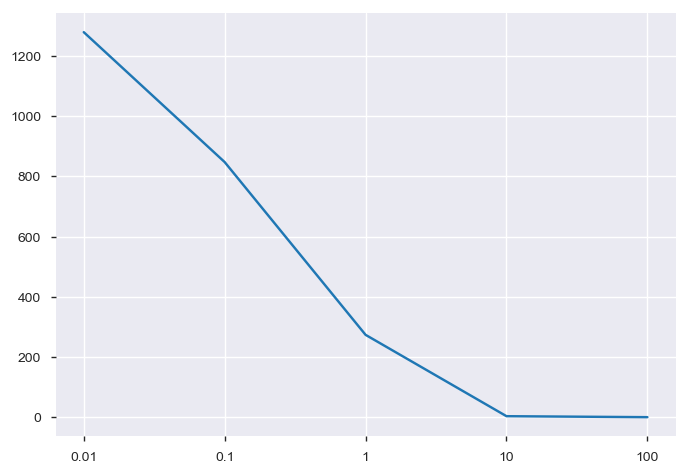

In [107]:
print(complexity)
plt.plot(range(5), complexity)
plt.xticks(np.arange(5), alphas)

In [108]:
# Check variable importance from lasso regression
lasso.set_params(alpha = 1)
lasso.fit(x_Econdo_NS_train, y_Econdo_NS_train)
lasso.predict(x_Econdo_NS_test)
lasso_coef = lasso.coef_
print(x_columns_all[np.argsort(np.absolute(lasso_coef))])
print(np.sort(np.absolute(lasso_coef)))
np.count_nonzero(lasso_coef)

Index(['Purchaser Address Indicator_Private', 'Planning Area_Marine Parade',
       'Planning Area_Mandai', 'Planning Area_Kallang',
       'Planning Area_Jurong East', 'Planning Area_Geylang',
       'Planning Area_Downtown Core', 'Planning Area_Clementi',
       'Planning Area_Museum', 'Planning Area_Choa Chu Kang',
       'Planning Area_Bukit Panjang', 'Planning Area_Bukit Merah',
       'Planning Area_Bukit Batok', 'Planning Area_Bishan',
       'Planning Area_Bedok', 'Planning Area_Ang Mo Kio', 'Isunlucky Floor No',
       'Planning Area_Bukit Timah', 'Purchaser Address Indicator_N.A',
       'Planning Area_Newton', 'Planning Area_Orchard', 'Islucky Unit No',
       'Isunlucky Unit No', 'Planning Area_Woodlands',
       'Planning Area_Toa Payoh', 'Planning Area_Tanglin',
       'Planning Area_Tampines', 'Planning Area_Southern Islands',
       'Planning Area_Novena', 'Planning Area_Singapore River',
       'Planning Area_Sembawang', 'Planning Area_Rochor',
       'Planning Area_Ri

15

In [109]:
# Try out top 10 features
x_Econdo_NS_train_reg = x_Econdo_NS_train[:, np.argsort(np.absolute(lasso_coef))[-10:]]
x_Econdo_NS_test_reg = x_Econdo_NS_test[:, np.argsort(np.absolute(lasso_coef))[-10:]]

In [110]:
# Linear regression with 10 features
reg = linear_model.LinearRegression().fit(x_Econdo_NS_train_reg, y_Econdo_NS_train)
Econdo_y_pred = reg.predict(x_Econdo_NS_train_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(Econdo_y_pred, y_Econdo_NS_train)) 
      + "\nR^2: " 
      + str(reg.score(x_Econdo_NS_train_reg, y_Econdo_NS_train)))

Econdo_y_pred = reg.predict(x_Econdo_NS_test_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(Econdo_y_pred, y_Econdo_NS_test)) 
      + "\nR^2: " 
      + str(reg.score(x_Econdo_NS_test_reg, y_Econdo_NS_test)))

MSE: 1393.5394257607134
R^2: 0.5535642973611825
MSE: 1389.6579674415052
R^2: 0.547934881996059


In [111]:
# Try out all selected features
x_Econdo_NS_train_reg = x_Econdo_NS_train[:, np.argsort(np.absolute(lasso_coef))[-15:]]
x_Econdo_NS_test_reg = x_Econdo_NS_test[:, np.argsort(np.absolute(lasso_coef))[-15:]]
x_columns = x_columns_all[np.argsort(np.absolute(lasso_coef))][-15:]

In [112]:
# Linear regression with all selected features
reg = linear_model.LinearRegression().fit(x_Econdo_NS_train_reg, y_Econdo_NS_train)
Econdo_y_pred = reg.predict(x_Econdo_NS_train_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(Econdo_y_pred, y_Econdo_NS_train)) 
      + "\nR^2: " 
      + str(reg.score(x_Econdo_NS_train_reg, y_Econdo_NS_train)))

Econdo_y_pred = reg.predict(x_Econdo_NS_test_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(Econdo_y_pred, y_Econdo_NS_test)) 
      + "\nR^2: " 
      + str(reg.score(x_Econdo_NS_test_reg, y_Econdo_NS_test)))

MSE: 1329.2168798250357
R^2: 0.5741707333611086
MSE: 1316.3429485160289
R^2: 0.5717847525818596


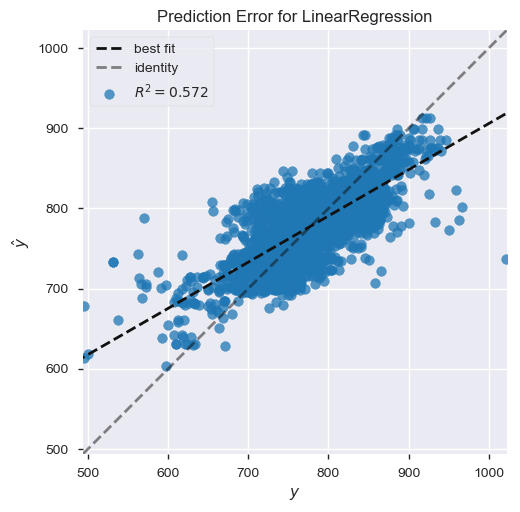

In [113]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
#lasso = Lasso()
visualizer = PredictionError(reg)

visualizer.fit(x_Econdo_NS_train_reg, y_Econdo_NS_train)  # Fit the training data to the visualizer
visualizer.score(x_Econdo_NS_test_reg, y_Econdo_NS_test)  # Evaluate the model on the test data
g = visualizer.poof()

### 7.1.7 Executive Condominiums Resale

In [114]:
# Lasso regression
alphas = [0.01, 0.1, 1, 10, 100]

MSE = []
r2 = []
complexity = []
cost = []
lasso = linear_model.Lasso()

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x_Econdo_RS_train, y_Econdo_RS_train)
    Econdo_y_pred = lasso.predict(x_Econdo_RS_test)
    error = metrics.mean_squared_error(Econdo_y_pred, y_Econdo_RS_test)
    MSE.append(error)
    r2.append(lasso.score(x_Econdo_RS_test, y_Econdo_RS_test))
    c = (np.linalg.norm(lasso.coef_, ord = 1))
    complexity.append(c)
    cost.append(error + (a*c))

[1570.6651493783552, 1447.29964200701, 2154.1380898933285, 9688.170148553629, 10997.727258570405]


([<matplotlib.axis.XTick at 0x1aa4e558b00>,
 <a list of 5 Text xticklabel objects>)

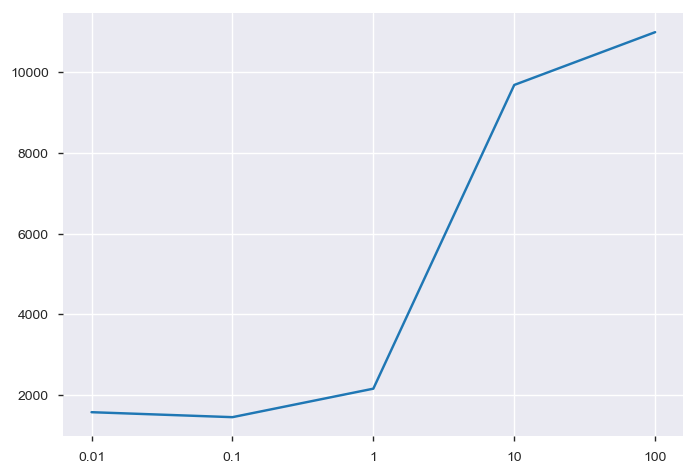

In [115]:
print(MSE)
plt.plot(range(5), MSE)
plt.xticks(np.arange(5), alphas)

[0.8562851624941988, 0.8675730260166756, 0.8028977687086237, 0.11353874555693666, -0.006284876521337246]


([<matplotlib.axis.XTick at 0x1aa51783550>,
 <a list of 5 Text xticklabel objects>)

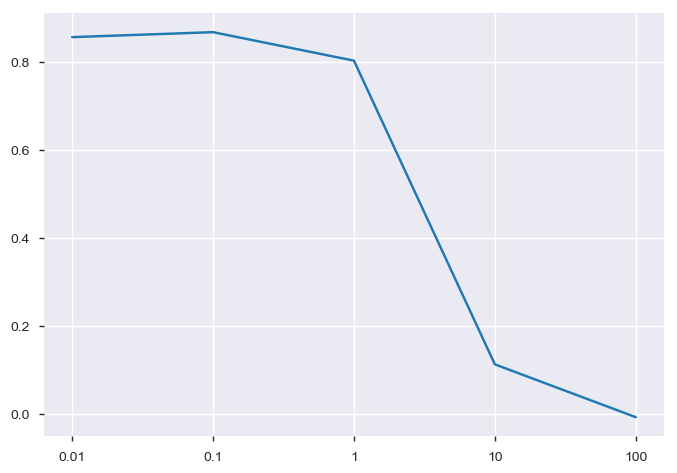

In [116]:
print(r2)
plt.plot(range(5), r2)
plt.xticks(np.arange(5), alphas)

[4094.8383048057667, 2148.142098595174, 888.2634424373234, 42.08786080388454, 0.0]


([<matplotlib.axis.XTick at 0x1aa597e6c18>,
 <a list of 5 Text xticklabel objects>)

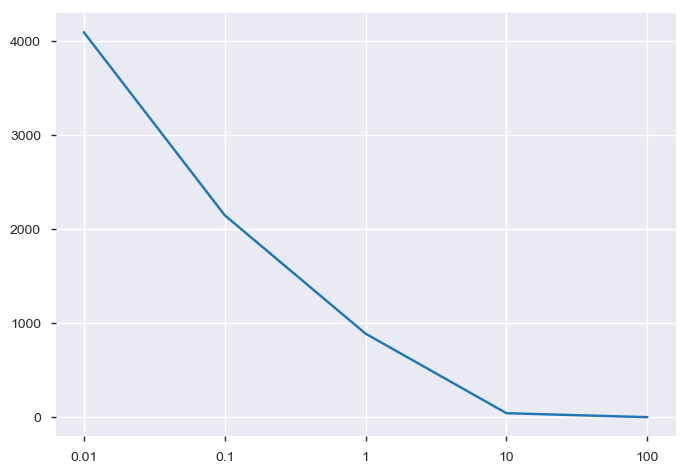

In [117]:
print(complexity)
plt.plot(range(5), complexity)
plt.xticks(np.arange(5), alphas)

In [118]:
# Check variable importance for lasso regression
lasso.set_params(alpha = 1)
lasso.fit(x_Econdo_RS_train, y_Econdo_RS_train)
lasso.predict(x_Econdo_RS_test)
lasso_coef = lasso.coef_
print(x_columns_all[np.argsort(np.absolute(lasso_coef))])
print(np.sort(np.absolute(lasso_coef)))
np.count_nonzero(lasso_coef)

Index(['Purchaser Address Indicator_Private', 'Planning Area_Marine Parade',
       'Planning Area_Mandai', 'Planning Area_Kallang',
       'Planning Area_Jurong West', 'Planning Area_Jurong East',
       'Planning Area_Hougang', 'Planning Area_Geylang',
       'Planning Area_Museum', 'Planning Area_Downtown Core',
       'Planning Area_Choa Chu Kang', 'Planning Area_Bukit Timah',
       'Planning Area_Bukit Panjang', 'Planning Area_Bukit Merah',
       'Planning Area_Bukit Batok', 'Planning Area_Bedok',
       'Planning Area_Ang Mo Kio', 'Planning Area_Clementi',
       'Planning Area_Newton', 'Planning Area_Novena', 'Planning Area_Orchard',
       'Islucky Unit No', 'Isunlucky Unit No', 'Planning Area_Yishun',
       'Planning Area_Woodlands', 'Planning Area_Toa Payoh',
       'Planning Area_Tanglin', 'Planning Area_Southern Islands',
       'Planning Area_Singapore River', 'Planning Area_Serangoon',
       'Planning Area_Sengkang', 'Planning Area_Sembawang',
       'Planning Area_Ro

16

In [119]:
x_Econdo_RS_train_reg = x_Econdo_RS_train[:, np.argsort(np.absolute(lasso_coef))[-10:]]
x_Econdo_RS_test_reg = x_Econdo_RS_test[:, np.argsort(np.absolute(lasso_coef))[-10:]]

In [120]:
# Linear regression
reg = linear_model.LinearRegression().fit(x_Econdo_RS_train_reg, y_Econdo_RS_train)
Econdo_y_pred = reg.predict(x_Econdo_RS_train_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(Econdo_y_pred, y_Econdo_RS_train)) 
      + "\nR^2: " 
      + str(reg.score(x_Econdo_RS_train_reg, y_Econdo_RS_train)))

Econdo_y_pred = reg.predict(x_Econdo_RS_test_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(Econdo_y_pred, y_Econdo_RS_test)) 
      + "\nR^2: " 
      + str(reg.score(x_Econdo_RS_test_reg, y_Econdo_RS_test)))

MSE: 1849.5452247131575
R^2: 0.7995908436469281
MSE: 1936.8725605043794
R^2: 0.8227774230474895


In [121]:
x_Econdo_RS_train_reg = x_Econdo_RS_train[:, np.argsort(np.absolute(lasso_coef))[-16:]]
x_Econdo_RS_test_reg = x_Econdo_RS_test[:, np.argsort(np.absolute(lasso_coef))[-16:]]

In [122]:
# Linear regression
reg = linear_model.LinearRegression().fit(x_Econdo_RS_train_reg, y_Econdo_RS_train)
Econdo_y_pred = reg.predict(x_Econdo_RS_train_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(Econdo_y_pred, y_Econdo_RS_train)) 
      + "\nR^2: " 
      + str(reg.score(x_Econdo_RS_train_reg, y_Econdo_RS_train)))

Econdo_y_pred = reg.predict(x_Econdo_RS_test_reg)
print("MSE: " 
      + str(metrics.mean_squared_error(Econdo_y_pred, y_Econdo_RS_test)) 
      + "\nR^2: " 
      + str(reg.score(x_Econdo_RS_test_reg, y_Econdo_RS_test)))

MSE: 1742.101828084632
R^2: 0.8112329706878447
MSE: 1824.5250261456677
R^2: 0.8330571492201432


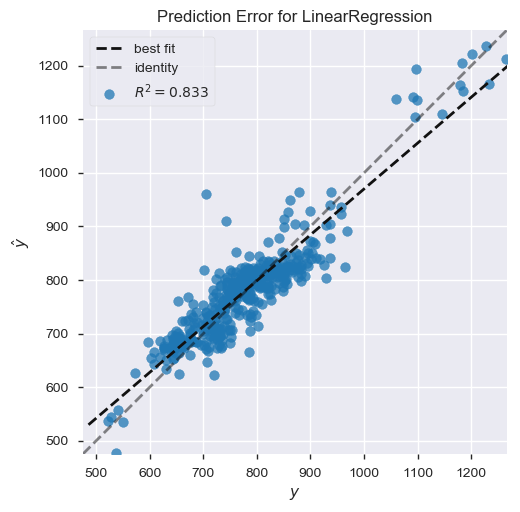

In [123]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
#lasso = Lasso()
visualizer = PredictionError(reg)

visualizer.fit(x_Econdo_RS_train_reg, y_Econdo_RS_train)  # Fit the training data to the visualizer
visualizer.score(x_Econdo_RS_test_reg, y_Econdo_RS_test)  # Evaluate the model on the test data
g = visualizer.poof()

## 7.2 Decision Tree

In [124]:
x_apart_NS_train = x_apart_NS_train_original
x_apart_NS_test = x_apart_NS_test_original

x_apart_RS_train =x_apart_RS_train_original
x_apart_RS_test =x_apart_RS_test_original

x_condo_NS_train =x_condo_NS_train_original
x_condo_NS_test =x_condo_NS_test_orinigal

x_condo_RS_train =x_condo_RS_train_original
x_condo_RS_test =x_condo_RS_test_original

x_Econdo_NS_train =x_Econdo_NS_train_orinigal
x_Econdo_NS_test =x_Econdo_NS_test_original

x_Econdo_RS_train =x_Econdo_RS_train_original
x_Econdo_RS_test =x_Econdo_RS_test_original

### 7.2.1 Apartment New Sale

In [127]:
from sklearn import tree
regressor = tree.DecisionTreeRegressor(random_state=0)
regressor.fit(x_apart_NS_train,y_apart_NS_train)

R_Square = regressor.score(x_apart_NS_test,y_apart_NS_test)
print("The R square is :", R_Square)
print("\n")

feature_importance = regressor.feature_importances_
all_features = list(x_apart_NS_train)
m,n = x_apart_NS_train.shape

    
Important_Features = pd.DataFrame(columns = ["Feature","Importance"])

for i in range(n):
    Important_Features.loc[i] = [all_features[i], feature_importance[i]] 



Important_Features_sorted = Important_Features.sort_values('Importance',ascending=False) 
Important_Features_sorted.iloc[0:5,:]

The R square is : 0.9456439104371105




Feature  Importance
7                   CBD km    0.589543
19       private school km    0.116759
37              Area (sqf)    0.061275
15         kindergarten km    0.048177
10  elderly care centre km    0.045129

In [128]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_apart_NS_test, regressor.predict(x_apart_NS_test))

10763.349150028624

#### 7.2.2 Apartment Resale

In [129]:
from sklearn import tree
regressor = tree.DecisionTreeRegressor(random_state=0,min_samples_split=20)
regressor.fit(x_apart_RS_train,y_apart_RS_train)

R_Square = regressor.score(x_apart_RS_test,y_apart_RS_test)
print("The R square is :", R_Square)
print("\n")

feature_importance = regressor.feature_importances_
all_features = list(x_apart_RS_train)
m,n = x_apart_RS_train.shape

    
Important_Features = pd.DataFrame(columns = ["Feature","Importance"])

for i in range(n):
    Important_Features.loc[i] = [all_features[i], feature_importance[i]] 



Important_Features_sorted = Important_Features.sort_values('Importance',ascending=False) 
Important_Features_sorted.iloc[0:5,:]

The R square is : 0.8759714378549428




Feature  Importance
3   No of Residents (Million)    0.537493
1                         Age    0.206233
14     hospital/polyclinic km    0.085318
37                 Area (sqf)    0.050318
7                      CBD km    0.016256

In [130]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_apart_RS_test, regressor.predict(x_apart_RS_test))

33864.233741475924

### 7.2.3 Condo New Sale

In [131]:
from sklearn import tree
regressor = tree.DecisionTreeRegressor(random_state=0)
regressor.fit(x_condo_NS_train,y_condo_NS_train)

R_Square = regressor.score(x_condo_NS_test,y_condo_NS_test)
print("The R square is :", R_Square)
print("\n")

feature_importance = regressor.feature_importances_
all_features = list(x_condo_NS_train)
m,n = x_condo_NS_train.shape

    
Important_Features = pd.DataFrame(columns = ["Feature","Importance"])

for i in range(n):
    Important_Features.loc[i] = [all_features[i], feature_importance[i]] 



Important_Features_sorted = Important_Features.sort_values('Importance',ascending=False) 
Important_Features_sorted.iloc[0:5,:]

The R square is : 0.9517520641986926




Feature  Importance
4   Age 65 and above (% of total residents)    0.374390
3                 No of Residents (Million)    0.195671
23                        junior college km    0.080078
37                               Area (sqf)    0.076526
20                        primary school km    0.046948

In [132]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_condo_NS_test, regressor.predict(x_condo_NS_test))

6204.141372126143

### 7.2.4 Condo Resale

In [133]:
from sklearn import tree
regressor = tree.DecisionTreeRegressor(random_state=0,min_samples_split=30)
regressor.fit(x_condo_RS_train,y_condo_RS_train)

R_Square = regressor.score(x_condo_RS_test,y_condo_RS_test)
print("The R square is :", R_Square)
print("\n")

feature_importance = regressor.feature_importances_
all_features = list(x_condo_RS_train)
m,n = x_condo_RS_train.shape

    
Important_Features = pd.DataFrame(columns = ["Feature","Importance"])

for i in range(n):
    Important_Features.loc[i] = [all_features[i], feature_importance[i]] 



Important_Features_sorted = Important_Features.sort_values('Importance',ascending=False) 
Important_Features_sorted.iloc[0:5,:]

The R square is : 0.8639295651499951




Feature  Importance
7                     CBD km    0.508088
38  Expensive_Area_Indicator    0.139977
1                        Age    0.060656
37                Area (sqf)    0.040627
10    elderly care centre km    0.039301

In [134]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_condo_RS_test, regressor.predict(x_condo_RS_test))

23359.815707813803

### 7.2.5 Econdo New Sale

In [135]:
from sklearn import tree
regressor = tree.DecisionTreeRegressor(random_state=0,min_samples_split=20)
regressor.fit(x_Econdo_NS_train,y_Econdo_NS_train)

R_Square = regressor.score(x_Econdo_NS_test,y_Econdo_NS_test)
print("The R square is :", R_Square)
print("\n")

feature_importance = regressor.feature_importances_
all_features = list(x_Econdo_NS_train)
m,n = x_Econdo_NS_train.shape

    
Important_Features = pd.DataFrame(columns = ["Feature","Importance"])

for i in range(n):
    Important_Features.loc[i] = [all_features[i], feature_importance[i]] 



Important_Features_sorted = Important_Features.sort_values('Importance',ascending=False) 
Important_Features_sorted.iloc[0:5,:]

The R square is : 0.7279761363426356




Feature  Importance
37        Area (sqf)    0.285396
15   kindergarten km    0.189269
0   Floor No (Final)    0.093428
34   Family-Friendly    0.089803
30          Security    0.088619

In [136]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_Econdo_NS_test, regressor.predict(x_Econdo_NS_test))

836.2072507049364

### 7.2.6 Econdo Resale

In [137]:
from sklearn import tree
regressor = tree.DecisionTreeRegressor(random_state=0,min_samples_split=30)
regressor.fit(x_Econdo_RS_train,y_Econdo_RS_train)

R_Square = regressor.score(x_Econdo_RS_test,y_Econdo_RS_test)
print("The R square is :", R_Square)
print("\n")

feature_importance = regressor.feature_importances_
all_features = list(x_Econdo_RS_train)
m,n = x_Econdo_RS_train.shape

    
Important_Features = pd.DataFrame(columns = ["Feature","Importance"])

for i in range(n):
    Important_Features.loc[i] = [all_features[i], feature_importance[i]] 



Important_Features_sorted = Important_Features.sort_values('Importance',ascending=False) 
Important_Features_sorted.iloc[0:5,:]

The R square is : 0.82471337186028




Feature  Importance
4   Age 65 and above (% of total residents)    0.340998
1                                       Age    0.268266
37                               Area (sqf)    0.107698
6            Uni Qualification (% of total)    0.105029
14                   hospital/polyclinic km    0.084700

In [138]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_Econdo_RS_test, regressor.predict(x_Econdo_RS_test))

1915.7144992770013

## 7.3 Random Forest

### 7.3.1 Apartment New Sale

R2 squared for test
0.9543871184837469
R2 squared for train
0.9836541740348815
MSE Test 9032.058292756634
MSE Train 3210.25557969717
Feature ranking:
[(0.5933, 'CBD km'), (0.1016, 'private school km'), (0.0605, 'Area (sqf)'), (0.048, 'kindergarten km'), (0.0244, 'elderly care centre km'), (0.0202, 'Floor No (Final)'), (0.019, 'higher education school km'), (0.0165, 'MRT station km'), (0.0144, 'Uni Qualification (% of total)'), (0.0123, 'bus interchange km'), (0.0099, 'No of Residents (Million)'), (0.0072, 'park km'), (0.0064, 'top primary school km'), (0.0054, 'junior college km'), (0.0049, 'Tenants (% of total households)'), (0.0043, 'supermarket/hypermarket km'), (0.0043, 'hospital/polyclinic km'), (0.004, 'primary school km'), (0.0037, 'secondary school km'), (0.0036, 'community club km'), (0.0034, 'Fitness'), (0.0033, 'library km'), (0.0033, 'childcare centre km'), (0.0027, 'bus stop km'), (0.0027, 'Planning Area_Geylang'), (0.0025, 'Planning Area_Tanglin'), (0.0019, 'hawker centre

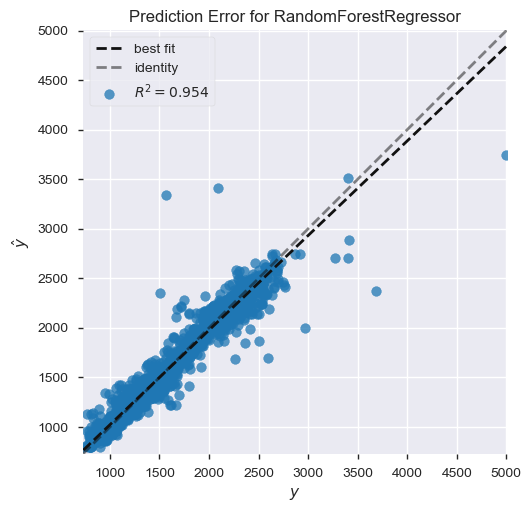

In [139]:
regr_apart_NS = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


regr_apart_NS.fit(x_apart_NS_train, y_apart_NS_train)


print("R2 squared for test")
print(regr_apart_NS.score(x_apart_NS_test, y_apart_NS_test, sample_weight=None))

print("R2 squared for train")
print(regr_apart_NS.score(x_apart_NS_train, y_apart_NS_train, sample_weight=None))
print("MSE Test",metrics.mean_squared_error(y_apart_NS_test,regr_apart_NS.predict(x_apart_NS_test)))
print("MSE Train",metrics.mean_squared_error(y_apart_NS_train,regr_apart_NS.predict(x_apart_NS_train)))

importances = regr_apart_NS.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr_apart_NS.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

names = x_apart_NS_train.columns
print (sorted(zip(map(lambda z: round(z, 4), regr_apart_NS.feature_importances_), names), 
             reverse=True))


visualizer = PredictionError(regr_apart_NS)
visualizer.fit(x_apart_NS_train, y_apart_NS_train)  
visualizer.score(x_apart_NS_test, y_apart_NS_test)  
g = visualizer.poof() 

### 7.3.2 Apartment Resale

R2 squared for test
0.9197926337595407
R2 squared for train
0.9804605059480503
MSE Test 21899.47985511925
MSE Train 5211.791019703032
Feature ranking:
[(0.506, 'No of Residents (Million)'), (0.1755, 'Age'), (0.0671, 'hospital/polyclinic km'), (0.0656, 'Area (sqf)'), (0.0223, 'shopping mall km'), (0.0181, 'CBD km'), (0.014, 'bus stop km'), (0.01, 'elderly care centre km'), (0.0085, 'Floor No (Final)'), (0.0077, 'No of Units'), (0.0074, 'Tenure (Final)'), (0.0065, 'kindergarten km'), (0.0064, 'higher education school km'), (0.0063, 'supermarket/hypermarket km'), (0.0063, 'Age 65 and above (% of total residents)'), (0.0062, 'hawker centre and market km'), (0.0062, 'exercise facility km'), (0.0061, 'MRT station km'), (0.006, 'community club km'), (0.0057, 'primary school km'), (0.005, 'junior college km'), (0.0047, 'library km'), (0.0046, 'park km'), (0.0037, 'bus interchange km'), (0.003, 'private school km'), (0.0029, 'top primary school km'), (0.0028, 'secondary school km'), (0.0021, 'c

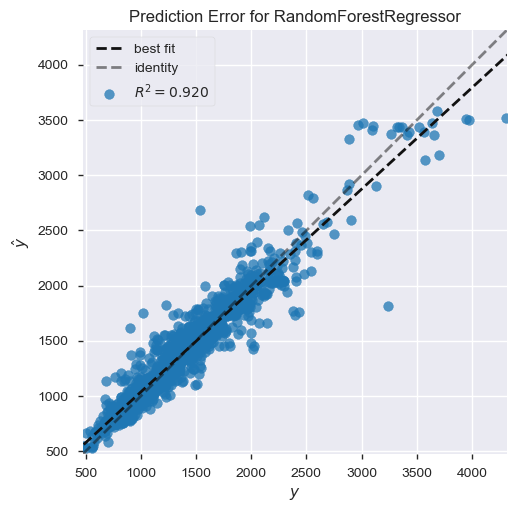

In [140]:
regr_apart_RS = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, 
           oob_score=False, random_state=0, verbose=0, warm_start=False)

regr_apart_RS.fit(x_apart_RS_train, y_apart_RS_train)


print("R2 squared for test")
print(regr_apart_RS.score(x_apart_RS_test, y_apart_RS_test, sample_weight=None))

print("R2 squared for train")
print(regr_apart_RS.score(x_apart_RS_train, y_apart_RS_train, sample_weight=None))
print("MSE Test",metrics.mean_squared_error(y_apart_RS_test,regr_apart_RS.predict(x_apart_RS_test)))
print("MSE Train",metrics.mean_squared_error(y_apart_RS_train,regr_apart_RS.predict(x_apart_RS_train)))

importances = regr_apart_RS.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr_apart_RS.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

names = x_apart_RS_train.columns
print (sorted(zip(map(lambda z: round(z, 4), regr_apart_RS.feature_importances_), names), 
             reverse=True))

visualizer = PredictionError(regr_apart_RS)
visualizer.fit(x_apart_RS_train, y_apart_RS_train)  
visualizer.score(x_apart_RS_test, y_apart_RS_test)  
g = visualizer.poof() 

### 7.3.3 Condo New Sale

R2 squared for test
0.9637701223364715
R2 squared for train
0.9840595030429928
MSE Test 4658.754394074513
MSE Train 2003.0330557078971
Feature ranking:
[(0.3767, 'Age 65 and above (% of total residents)'), (0.1964, 'No of Residents (Million)'), (0.0811, 'junior college km'), (0.0733, 'Area (sqf)'), (0.0371, 'Tenure (Final)'), (0.028, 'Tenants (% of total households)'), (0.0255, 'primary school km'), (0.0222, 'Floor No (Final)'), (0.0203, 'MRT station km'), (0.0148, 'hospital/polyclinic km'), (0.0113, 'elderly care centre km'), (0.011, 'No of Units'), (0.0096, 'secondary school km'), (0.0094, 'park km'), (0.0084, 'CBD km'), (0.0072, 'hawker centre and market km'), (0.0071, 'exercise facility km'), (0.007, 'supermarket/hypermarket km'), (0.0053, 'bus stop km'), (0.0052, 'community club km'), (0.0052, 'childcare centre km'), (0.0049, 'bus interchange km'), (0.0042, 'kindergarten km'), (0.0038, 'higher education school km'), (0.0037, 'private school km'), (0.0035, 'library km'), (0.0031, '

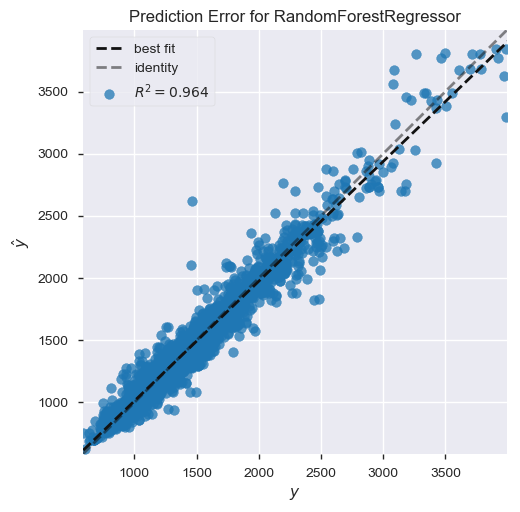

In [141]:
regr_condo_NS = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, 
           oob_score=False, random_state=0, verbose=0, warm_start=False)

regr_condo_NS.fit(x_condo_NS_train, y_condo_NS_train)


print("R2 squared for test")
print(regr_condo_NS.score(x_condo_NS_test, y_condo_NS_test, sample_weight=None))

print("R2 squared for train")
print(regr_condo_NS.score(x_condo_NS_train, y_condo_NS_train, sample_weight=None))
print("MSE Test",metrics.mean_squared_error(y_condo_NS_test,regr_condo_NS.predict(x_condo_NS_test)))
print("MSE Train",metrics.mean_squared_error(y_condo_NS_train,regr_condo_NS.predict(x_condo_NS_train)))

importances = regr_condo_NS.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr_condo_NS.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

names = x_condo_NS_train.columns
print (sorted(zip(map(lambda z: round(z, 4), regr_condo_NS.feature_importances_), names), 
             reverse=True))

visualizer = PredictionError(regr_condo_NS)
visualizer.fit(x_condo_NS_train, y_condo_NS_train)  
visualizer.score(x_condo_NS_test, y_condo_NS_test)  
g = visualizer.poof() 

### 7.3.4 Condo Resale

R2 squared for test
0.9220923916501682
R2 squared for train
0.9812953115263373
MSE Test 13374.74503770603
MSE Train 3459.207614447152
Feature ranking:
[(0.4323, 'CBD km'), (0.1219, 'Expensive_Area_Indicator'), (0.0771, 'No of Residents (Million)'), (0.0619, 'Age'), (0.0504, 'Area (sqf)'), (0.0331, 'elderly care centre km'), (0.0232, 'No of Units'), (0.0201, 'Tenants (% of total households)'), (0.0152, 'bus interchange km'), (0.0142, 'park km'), (0.0122, 'library km'), (0.0115, 'top primary school km'), (0.0106, 'Tenure (Final)'), (0.01, 'MRT station km'), (0.0088, 'exercise facility km'), (0.0087, 'hawker centre and market km'), (0.0083, 'shopping mall km'), (0.0079, 'primary school km'), (0.0072, 'Floor No (Final)'), (0.0069, 'private school km'), (0.0059, 'supermarket/hypermarket km'), (0.0054, 'higher education school km'), (0.0051, 'hospital/polyclinic km'), (0.005, 'secondary school km'), (0.0042, 'bus stop km'), (0.0041, 'junior college km'), (0.0038, 'community club km'), (0.003

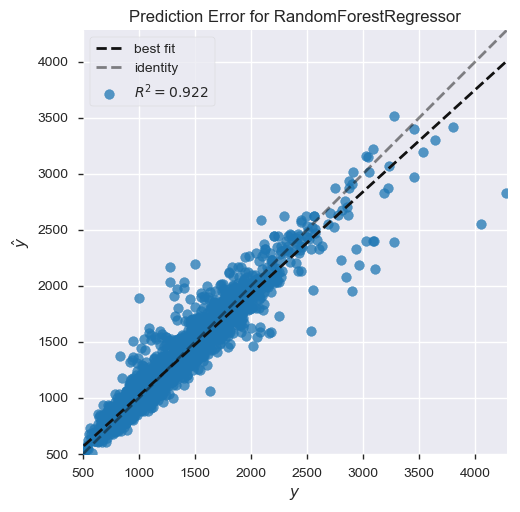

In [142]:
regr_condo_RS = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, 
           oob_score=False, random_state=0, verbose=0, warm_start=False)

regr_condo_RS.fit(x_condo_RS_train, y_condo_RS_train)


print("R2 squared for test")
print(regr_condo_RS.score(x_condo_RS_test, y_condo_RS_test, sample_weight=None))

print("R2 squared for train")
print(regr_condo_RS.score(x_condo_RS_train, y_condo_RS_train, sample_weight=None))
print("MSE Test",metrics.mean_squared_error(y_condo_RS_test,regr_condo_RS.predict(x_condo_RS_test)))
print("MSE Train",metrics.mean_squared_error(y_condo_RS_train,regr_condo_RS.predict(x_condo_RS_train)))

importances = regr_condo_RS.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr_condo_RS.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

names = x_condo_RS_train.columns
print (sorted(zip(map(lambda z: round(z, 4), regr_condo_RS.feature_importances_), names), 
             reverse=True))

visualizer = PredictionError(regr_condo_RS)
visualizer.fit(x_condo_RS_train, y_condo_RS_train)  
visualizer.score(x_condo_RS_test, y_condo_RS_test)  
g = visualizer.poof() 

### 7.3.5 Executive Condo New Sale

R2 squared for test
0.7880977228372573
R2 squared for train
0.9019191213467098
MSE Test 651.3921911923236
MSE Train 306.1573492189777
Feature ranking:
[(0.2952, 'Area (sqf)'), (0.1248, 'kindergarten km'), (0.1008, 'Floor No (Final)'), (0.0651, 'Family-Friendly'), (0.0546, 'hawker centre and market km'), (0.0421, 'Security'), (0.0309, 'community club km'), (0.0276, 'Uni Qualification (% of total)'), (0.0195, 'No of Residents (Million)'), (0.0175, 'No of Units'), (0.0152, 'supermarket/hypermarket km'), (0.015, 'CBD km'), (0.0138, 'childcare centre km'), (0.0134, 'URA growth area km'), (0.0098, 'Age 65 and above (% of total residents)'), (0.0091, 'Fitness'), (0.0088, 'library km'), (0.0088, 'exercise facility km'), (0.0079, 'private school km'), (0.0077, 'elderly care centre km'), (0.0076, 'bus interchange km'), (0.0074, 'higher education school km'), (0.0073, 'MRT station km'), (0.0071, 'hospital/polyclinic km'), (0.0071, 'Carpark'), (0.0065, 'secondary school km'), (0.0064, 'Planning Ar

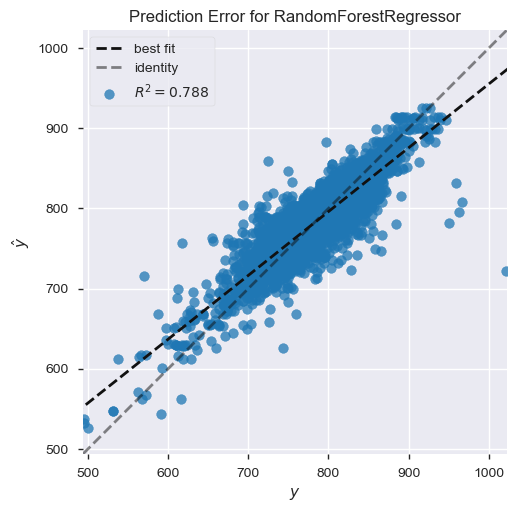

In [144]:
regr_Econdo_NS = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, 
           oob_score=False, random_state=0, verbose=0, warm_start=False)

regr_Econdo_NS.fit(x_Econdo_NS_train, y_Econdo_NS_train)


print("R2 squared for test")
print(regr_Econdo_NS.score(x_Econdo_NS_test, y_Econdo_NS_test, sample_weight=None))

print("R2 squared for train")
print(regr_Econdo_NS.score(x_Econdo_NS_train, y_Econdo_NS_train, sample_weight=None))
print("MSE Test",metrics.mean_squared_error(y_Econdo_NS_test,regr_Econdo_NS.predict(x_Econdo_NS_test)))
print("MSE Train",metrics.mean_squared_error(y_Econdo_NS_train,regr_Econdo_NS.predict(x_Econdo_NS_train)))

importances = regr_Econdo_NS.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr_Econdo_NS.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

names = x_Econdo_NS_train.columns
print (sorted(zip(map(lambda z: round(z, 4), regr_Econdo_NS.feature_importances_), names), 
             reverse=True))

visualizer = PredictionError(regr_Econdo_NS)
visualizer.fit(x_Econdo_NS_train, y_Econdo_NS_train)  
visualizer.score(x_Econdo_NS_test, y_Econdo_NS_test)  
g = visualizer.poof() 

### 7.3.6 Executive Condo  Resale

R2 squared for test
0.8721243048061279
R2 squared for train
0.9577279924786929
MSE Test 1397.5585359127351
MSE Train 390.12184409544096
Feature ranking:
[(0.2542, 'Age'), (0.1263, 'Area (sqf)'), (0.1114, 'Age 65 and above (% of total residents)'), (0.0892, 'CBD km'), (0.0676, 'Uni Qualification (% of total)'), (0.0627, 'hospital/polyclinic km'), (0.0373, 'Planning Area_Bishan'), (0.0243, 'hawker centre and market km'), (0.0229, 'exercise facility km'), (0.0219, 'Floor No (Final)'), (0.0188, 'library km'), (0.0176, 'supermarket/hypermarket km'), (0.0165, 'bus interchange km'), (0.0139, 'junior college km'), (0.0115, 'top primary school km'), (0.009, 'private school km'), (0.0086, 'elderly care centre km'), (0.0083, 'higher education school km'), (0.0081, 'No of Residents (Million)'), (0.0076, 'kindergarten km'), (0.0072, 'childcare centre km'), (0.0068, 'primary school km'), (0.0058, 'shopping mall km'), (0.0043, 'MRT station km'), (0.0039, 'secondary school km'), (0.0038, 'URA growth a

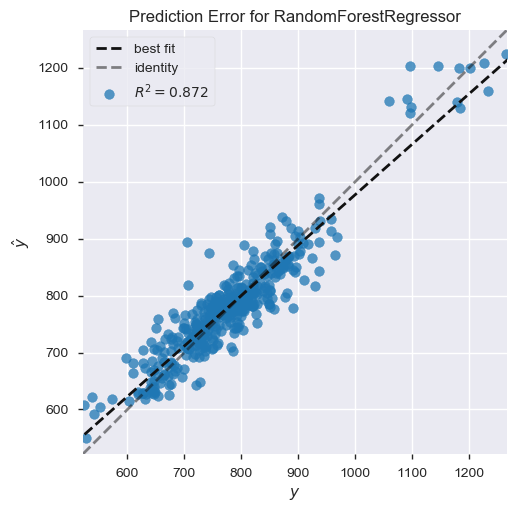

In [145]:
regr_Econdo_RS = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, 
           oob_score=False, random_state=0, verbose=0, warm_start=False)

regr_Econdo_RS.fit(x_Econdo_RS_train, y_Econdo_RS_train)


print("R2 squared for test")
print(regr_Econdo_RS.score(x_Econdo_RS_test, y_Econdo_RS_test, sample_weight=None))

print("R2 squared for train")
print(regr_Econdo_RS.score(x_Econdo_RS_train, y_Econdo_RS_train, sample_weight=None))
print("MSE Test",metrics.mean_squared_error(y_Econdo_RS_test,regr_Econdo_RS.predict(x_Econdo_RS_test)))
print("MSE Train",metrics.mean_squared_error(y_Econdo_RS_train,regr_Econdo_RS.predict(x_Econdo_RS_train)))

importances = regr_Econdo_RS.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr_Econdo_RS.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

names = x_Econdo_RS_train.columns
print (sorted(zip(map(lambda z: round(z, 4), regr_Econdo_RS.feature_importances_), names), 
             reverse=True))

visualizer = PredictionError(regr_Econdo_RS)
visualizer.fit(x_Econdo_RS_train, y_Econdo_RS_train)  
visualizer.score(x_Econdo_RS_test, y_Econdo_RS_test)  
g = visualizer.poof() 

## 7.4. Boosting - GBR

In [51]:
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.metrics import mean_squared_error
import time
from mpl_toolkits.axes_grid1.parasite_axes import host_subplot
from mpl_toolkits.axisartist.axislines import Axes
from scipy.sparse.csr import csr_matrix
from sklearn.utils import shuffle
from sklearn.svm.classes import NuSVR
import xgboost as xgb

### 7.4.1 Apartment New Sales

Benchmarking GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Complexity: 100 | MSE: 13140.9366 | Pred. Time: 0.006981m

Benchmarking GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Comp

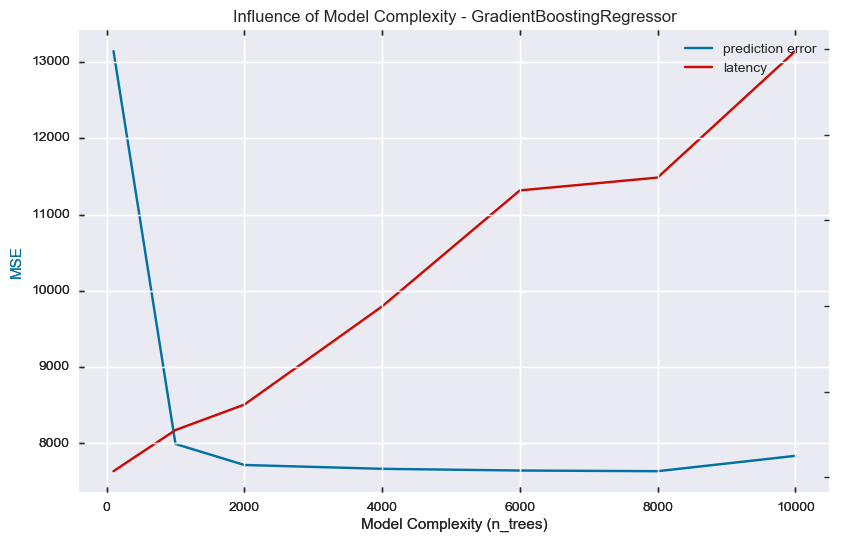

In [52]:
def benchmark_influence(conf):
    """
    Benchmark influence of :changing_param: on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf['changing_param_values']:
        conf['tuned_params'][conf['changing_param']] = param_value
        estimator = conf['estimator'](**conf['tuned_params'])
        print("Benchmarking %s" % estimator)
        estimator.fit(conf['x_train'], conf['y_train'])
        conf['postfit_hook'](estimator)
        complexity = conf['complexity_computer'](estimator)
        complexities.append(complexity)
        start_time = time.time()
        y_pred = estimator.predict(conf['x_test'])
        elapsed_time = (time.time() - start_time)
        prediction_times.append(elapsed_time)
        pred_score = conf['prediction_performance_computer'](
            conf['y_test'], y_pred)
        prediction_powers.append(pred_score)
        print("Complexity: %d | %s: %.4f | Pred. Time: %fm\n" % (
            complexity, conf['prediction_performance_label'], pred_score,
            elapsed_time))
    return prediction_powers, prediction_times, complexities


def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """
    plt.figure(figsize=(12, 6))
    host = host_subplot(111, axes_class=Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    host.set_xlabel('Model Complexity (%s)' % conf['complexity_label'])
    y1_label = conf['prediction_performance_label']
    y2_label = "Time (s)"
    host.set_ylabel(y1_label)
    par1.set_ylabel(y2_label)
    p1, = host.plot(complexities, mse_values, 'b-', label="prediction error")
    p2, = par1.plot(complexities, prediction_times, 'r-',
                    label="latency")
    host.legend(loc='upper right')
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    plt.title('Influence of Model Complexity - %s' % conf['estimator'].__name__)
    plt.show()


def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

configurations = [
    {'estimator': gbr,
     'tuned_params': {'loss': 'ls'},
     'changing_param': 'n_estimators',
     'changing_param_values': [100, 1000, 2000, 4000, 6000, 8000, 10000],
     'complexity_label': 'n_trees',
     'complexity_computer': lambda x: x.n_estimators,
     'x_train': x_apart_NS_train,
     'y_train': y_apart_NS_train,
     'x_test': x_apart_NS_test,
     'y_test': y_apart_NS_test,
     'postfit_hook': lambda x: x,
     'prediction_performance_computer': mean_squared_error,
     'prediction_performance_label': 'MSE'},
]
for conf in configurations:
    prediction_performances, prediction_times, complexities = \
        benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times,
                   complexities)


In [147]:
gbr_apart_NS = ensemble.GradientBoostingRegressor(n_estimators=8000)

gbr_apart_NS.fit(x_apart_NS_train, y_apart_NS_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=8000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [148]:
print("R2 for test", gbr_apart_NS.score(x_apart_NS_test, y_apart_NS_test, sample_weight=None))
print("R2 for train", gbr_apart_NS.score(x_apart_NS_train, y_apart_NS_train, sample_weight=None))

print("MSE Test",metrics.mean_squared_error(y_apart_NS_test,gbr_apart_NS.predict(x_apart_NS_test)))
print("MSE Train",metrics.mean_squared_error(y_apart_NS_train,gbr_apart_NS.predict(x_apart_NS_train)))


R2 for test 0.9614732575190965
R2 for train 0.9937619844727406
MSE Test 7628.8928116402885
MSE Train 1225.1215812132398


In [149]:
names = x_apart_NS_train.columns

columns = ["Importance", "Feature Name"]
index = ["1st Important Feature", 
         "2nd Important Feature", 
         "3rd Important Feature", 
         "4th Important Feature", 
         "5th Important Feature",
        "6th Important Feature",
        "7th Important Feature",
        "8th Important Feature",
        "9th Important Feature",
        "10th Important Feature"]

pd.DataFrame(sorted(zip(map(lambda z: round(z, 4), gbr_apart_NS.feature_importances_), names), 
             reverse=True)[0:10], columns = columns, index = index)


Importance                         Feature Name
1st Important Feature       0.4140                           Area (sqf)
2nd Important Feature       0.0955                     Floor No (Final)
3rd Important Feature       0.0354  Purchaser Address Indicator_Private
4th Important Feature       0.0333      Purchaser Address Indicator_HDB
5th Important Feature       0.0301                   Isunlucky Floor No
6th Important Feature       0.0250                      Islucky Unit No
7th Important Feature       0.0238                    Isunlucky Unit No
8th Important Feature       0.0215                     Islucky Floor No
9th Important Feature       0.0157                    junior college km
10th Important Feature      0.0149               hospital/polyclinic km

### 7.4.2 Apartment Resale

Benchmarking GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Complexity: 200 | MSE: 22412.4312 | Pred. Time: 0.004986s

Benchmarking GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Compl

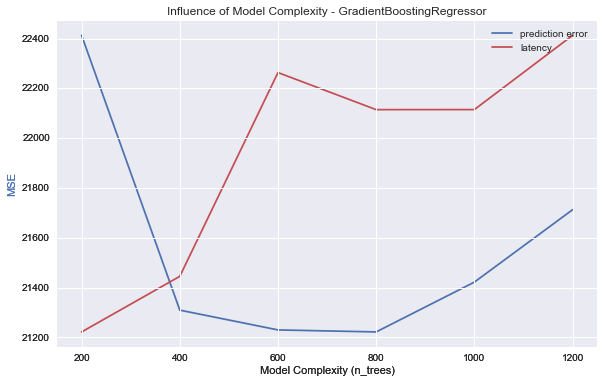

In [28]:
def benchmark_influence(conf):
    """
    Benchmark influence of :changing_param: on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf['changing_param_values']:
        conf['tuned_params'][conf['changing_param']] = param_value
        estimator = conf['estimator'](**conf['tuned_params'])
        print("Benchmarking %s" % estimator)
        estimator.fit(conf['x_train'], conf['y_train'])
        conf['postfit_hook'](estimator)
        complexity = conf['complexity_computer'](estimator)
        complexities.append(complexity)
        start_time = time.time()
        y_pred = estimator.predict(conf['x_test'])
        elapsed_time = (time.time() - start_time)
        prediction_times.append(elapsed_time)
        pred_score = conf['prediction_performance_computer'](
            conf['y_test'], y_pred)
        prediction_powers.append(pred_score)
        print("Complexity: %d | %s: %.4f | Pred. Time: %fs\n" % (
            complexity, conf['prediction_performance_label'], pred_score,
            elapsed_time))
    return prediction_powers, prediction_times, complexities


def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """
    plt.figure(figsize=(12, 6))
    host = host_subplot(111, axes_class=Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    host.set_xlabel('Model Complexity (%s)' % conf['complexity_label'])
    y1_label = conf['prediction_performance_label']
    y2_label = "Time (s)"
    host.set_ylabel(y1_label)
    par1.set_ylabel(y2_label)
    p1, = host.plot(complexities, mse_values, 'b-', label="prediction error")
    p2, = par1.plot(complexities, prediction_times, 'r-',
                    label="latency")
    host.legend(loc='upper right')
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    plt.title('Influence of Model Complexity - %s' % conf['estimator'].__name__)
    plt.show()


def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

configurations = [
    {'estimator': gbr,
     'tuned_params': {'loss': 'ls'},
     'changing_param': 'n_estimators',
     'changing_param_values': [200,400,600,800,1000,1200],
     'complexity_label': 'n_trees',
     'complexity_computer': lambda x: x.n_estimators,
     'x_train': x_apart_RS_train,
     'y_train': y_apart_RS_train,
     'x_test': x_apart_RS_test,
     'y_test': y_apart_RS_test,
     'postfit_hook': lambda x: x,
     'prediction_performance_computer': mean_squared_error,
     'prediction_performance_label': 'MSE'},
]
for conf in configurations:
    prediction_performances, prediction_times, complexities = \
        benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times,
                   complexities)


In [150]:
gbr_apart_RS = ensemble.GradientBoostingRegressor(n_estimators=800)

gbr_apart_RS.fit(x_apart_RS_train, y_apart_RS_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=800, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [151]:
print("R2 for test", gbr_apart_RS.score(x_apart_RS_test, y_apart_RS_test, sample_weight=None))
print("R2 for train", gbr_apart_RS.score(x_apart_RS_train, y_apart_RS_train, sample_weight=None))

print("MSE Test",metrics.mean_squared_error(y_apart_RS_test,gbr_apart_RS.predict(x_apart_RS_test)))
print("MSE Train",metrics.mean_squared_error(y_apart_RS_train,gbr_apart_RS.predict(x_apart_RS_train)))


R2 for test 0.9219879105102149
R2 for train 0.9875635174191195
MSE Test 21300.09078113224
MSE Train 3317.19685573223


In [152]:
names = x_apart_RS_train.columns

columns = ["Importance", "Feature Name"]
index = ["1st Important Feature", 
         "2nd Important Feature", 
         "3rd Important Feature", 
         "4th Important Feature", 
         "5th Important Feature",
        "6th Important Feature",
        "7th Important Feature",
        "8th Important Feature",
        "9th Important Feature",
        "10th Important Feature"]

pd.DataFrame(sorted(zip(map(lambda z: round(z, 4), gbr_apart_RS.feature_importances_), names), 
             reverse=True)[0:10], columns = columns, index = index)


Importance            Feature Name
1st Important Feature       0.2131              Area (sqf)
2nd Important Feature       0.0862                     Age
3rd Important Feature       0.0543        Floor No (Final)
4th Important Feature       0.0389  elderly care centre km
5th Important Feature       0.0346         kindergarten km
6th Important Feature       0.0333                 park km
7th Important Feature       0.0293                  CBD km
8th Important Feature       0.0258             bus stop km
9th Important Feature       0.0243             No of Units
10th Important Feature      0.0234     childcare centre km

### 7.4.3 Condo New Sales

Benchmarking GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Complexity: 100 | MSE: 8516.4683 | Pred. Time: 0.019979s

Benchmarking GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Compl

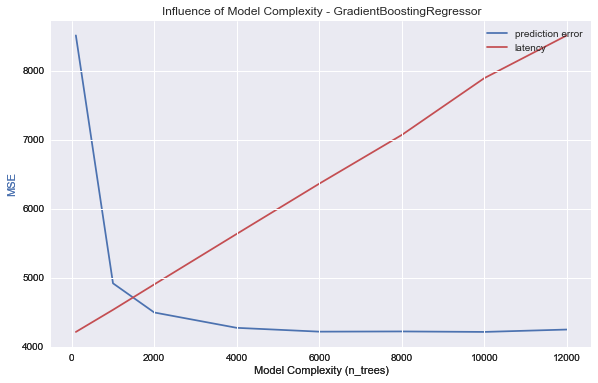

In [59]:
def benchmark_influence(conf):
    """
    Benchmark influence of :changing_param: on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf['changing_param_values']:
        conf['tuned_params'][conf['changing_param']] = param_value
        estimator = conf['estimator'](**conf['tuned_params'])
        print("Benchmarking %s" % estimator)
        estimator.fit(conf['x_train'], conf['y_train'])
        conf['postfit_hook'](estimator)
        complexity = conf['complexity_computer'](estimator)
        complexities.append(complexity)
        start_time = time.time()
        y_pred = estimator.predict(conf['x_test'])
        elapsed_time = (time.time() - start_time)
        prediction_times.append(elapsed_time)
        pred_score = conf['prediction_performance_computer'](
            conf['y_test'], y_pred)
        prediction_powers.append(pred_score)
        print("Complexity: %d | %s: %.4f | Pred. Time: %fs\n" % (
            complexity, conf['prediction_performance_label'], pred_score,
            elapsed_time))
    return prediction_powers, prediction_times, complexities


def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """
    plt.figure(figsize=(12, 6))
    host = host_subplot(111, axes_class=Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    host.set_xlabel('Model Complexity (%s)' % conf['complexity_label'])
    y1_label = conf['prediction_performance_label']
    y2_label = "Time (s)"
    host.set_ylabel(y1_label)
    par1.set_ylabel(y2_label)
    p1, = host.plot(complexities, mse_values, 'b-', label="prediction error")
    p2, = par1.plot(complexities, prediction_times, 'r-',
                    label="latency")
    host.legend(loc='upper right')
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    plt.title('Influence of Model Complexity - %s' % conf['estimator'].__name__)
    plt.show()


def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

configurations = [
    {'estimator': gbr,
     'tuned_params': {'loss': 'ls'},
     'changing_param': 'n_estimators',
     'changing_param_values': [100, 1000, 2000, 4000, 6000, 8000, 10000, 12000],
     'complexity_label': 'n_trees',
     'complexity_computer': lambda x: x.n_estimators,
     'x_train': x_condo_NS_train,
     'y_train': y_condo_NS_train,
     'x_test': x_condo_NS_test,
     'y_test': y_condo_NS_test,
     'postfit_hook': lambda x: x,
     'prediction_performance_computer': mean_squared_error,
     'prediction_performance_label': 'MSE'},
]
for conf in configurations:
    prediction_performances, prediction_times, complexities = \
        benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times,
                   complexities)


In [153]:
gbr_condo_NS = ensemble.GradientBoostingRegressor(n_estimators=10000)

gbr_condo_NS.fit(x_condo_NS_train, y_condo_NS_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [154]:
print("R2 for test", gbr_condo_NS.score(x_condo_NS_test, y_condo_NS_test, sample_weight=None))
print("R2 for train", gbr_condo_NS.score(x_condo_NS_train, y_condo_NS_train, sample_weight=None))

print("MSE Test",metrics.mean_squared_error(y_condo_NS_test,gbr_condo_NS.predict(x_condo_NS_test)))
print("MSE Train",metrics.mean_squared_error(y_condo_NS_train,gbr_condo_NS.predict(x_condo_NS_train)))

R2 for test 0.9669589342066268
R2 for train 0.9895345059102649
MSE Test 4248.709086995874
MSE Train 1315.0612971849816


In [155]:
names = x_condo_NS_train.columns

columns = ["Importance", "Feature Name"]
index = ["1st Important Feature", 
         "2nd Important Feature", 
         "3rd Important Feature", 
         "4th Important Feature", 
         "5th Important Feature",
        "6th Important Feature",
        "7th Important Feature",
        "8th Important Feature",
        "9th Important Feature",
        "10th Important Feature"]

pd.DataFrame(sorted(zip(map(lambda z: round(z, 4), gbr_condo_NS.feature_importances_), names), 
             reverse=True)[0:10], columns = columns, index = index)

Importance                         Feature Name
1st Important Feature       0.4416                           Area (sqf)
2nd Important Feature       0.1187                     Floor No (Final)
3rd Important Feature       0.0272                      Islucky Unit No
4th Important Feature       0.0231      Purchaser Address Indicator_HDB
5th Important Feature       0.0225  Purchaser Address Indicator_Private
6th Important Feature       0.0177      Purchaser Address Indicator_N.A
7th Important Feature       0.0176                    junior college km
8th Important Feature       0.0155                      kindergarten km
9th Important Feature       0.0152                       MRT station km
10th Important Feature      0.0135                                  Age

### 7.4.4 Condo Resale

Benchmarking GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Complexity: 1000 | MSE: 11659.2794 | Pred. Time: 0.128240s

Benchmarking GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Co

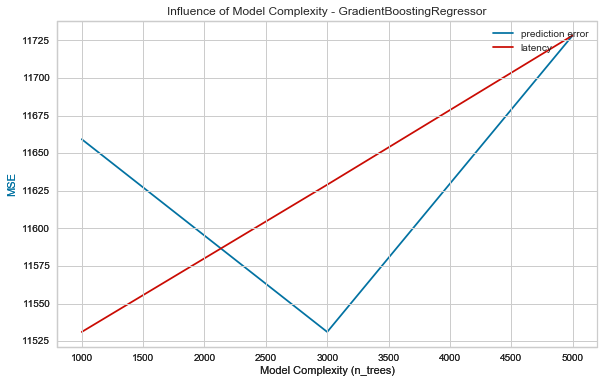

In [53]:
def benchmark_influence(conf):
    """
    Benchmark influence of :changing_param: on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf['changing_param_values']:
        conf['tuned_params'][conf['changing_param']] = param_value
        estimator = conf['estimator'](**conf['tuned_params'])
        print("Benchmarking %s" % estimator)
        estimator.fit(conf['x_train'], conf['y_train'])
        conf['postfit_hook'](estimator)
        complexity = conf['complexity_computer'](estimator)
        complexities.append(complexity)
        start_time = time.time()
        y_pred = estimator.predict(conf['x_test'])
        elapsed_time = (time.time() - start_time)
        prediction_times.append(elapsed_time)
        pred_score = conf['prediction_performance_computer'](
            conf['y_test'], y_pred)
        prediction_powers.append(pred_score)
        print("Complexity: %d | %s: %.4f | Pred. Time: %fs\n" % (
            complexity, conf['prediction_performance_label'], pred_score,
            elapsed_time))
    return prediction_powers, prediction_times, complexities


def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """
    plt.figure(figsize=(12, 6))
    host = host_subplot(111, axes_class=Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    host.set_xlabel('Model Complexity (%s)' % conf['complexity_label'])
    y1_label = conf['prediction_performance_label']
    y2_label = "Time (s)"
    host.set_ylabel(y1_label)
    par1.set_ylabel(y2_label)
    p1, = host.plot(complexities, mse_values, 'b-', label="prediction error")
    p2, = par1.plot(complexities, prediction_times, 'r-',
                    label="latency")
    host.legend(loc='upper right')
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    plt.title('Influence of Model Complexity - %s' % conf['estimator'].__name__)
    plt.show()


def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

configurations = [
    {'estimator': gbr,
     'tuned_params': {'loss': 'ls'},
     'changing_param': 'n_estimators',
     'changing_param_values': [1000,3000,5000],
     'complexity_label': 'n_trees',
     'complexity_computer': lambda x: x.n_estimators,
     'x_train': x_condo_RS_train,
     'y_train': y_condo_RS_train,
     'x_test': x_condo_RS_test,
     'y_test': y_condo_RS_test,
     'postfit_hook': lambda x: x,
     'prediction_performance_computer': mean_squared_error,
     'prediction_performance_label': 'MSE'},
]
for conf in configurations:
    prediction_performances, prediction_times, complexities = \
        benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times,
                   complexities)

In [156]:
gbr_condo_RS = ensemble.GradientBoostingRegressor(n_estimators=3000)

gbr_condo_RS.fit(x_condo_RS_train, y_condo_RS_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [157]:
print("R2 for test", gbr_condo_RS.score(x_condo_RS_test, y_condo_RS_test, sample_weight=None))
print("R2 for train", gbr_condo_RS.score(x_condo_RS_train, y_condo_RS_train, sample_weight=None))

print("MSE Test",metrics.mean_squared_error(y_condo_RS_test,gbr_condo_RS.predict(x_condo_RS_test)))
print("MSE Train",metrics.mean_squared_error(y_condo_RS_train,gbr_condo_RS.predict(x_condo_RS_train)))

R2 for test 0.9320852396068603
R2 for train 0.9904807964370654
MSE Test 11659.228460413924
MSE Train 1760.4624367169476


In [158]:
names = x_condo_RS_train.columns

columns = ["Importance", "Feature Name"]
index = ["1st Important Feature", 
         "2nd Important Feature", 
         "3rd Important Feature", 
         "4th Important Feature", 
         "5th Important Feature",
        "6th Important Feature",
        "7th Important Feature",
        "8th Important Feature",
        "9th Important Feature",
        "10th Important Feature"]

pd.DataFrame(sorted(zip(map(lambda z: round(z, 4), gbr_condo_RS.feature_importances_), names), 
             reverse=True)[0:10], columns = columns, index = index)

Importance                Feature Name
1st Important Feature       0.2432                  Area (sqf)
2nd Important Feature       0.0864                         Age
3rd Important Feature       0.0631            Floor No (Final)
4th Important Feature       0.0338                 bus stop km
5th Important Feature       0.0254                     park km
6th Important Feature       0.0248  higher education school km
7th Important Feature       0.0241                 No of Units
8th Important Feature       0.0239         secondary school km
9th Important Feature       0.0238         childcare centre km
10th Important Feature      0.0237      elderly care centre km

### 7.4.5 Econdo New Sales

Benchmarking GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Complexity: 1000 | MSE: 614.2011 | Pred. Time: 0.106448s

Benchmarking GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Comp

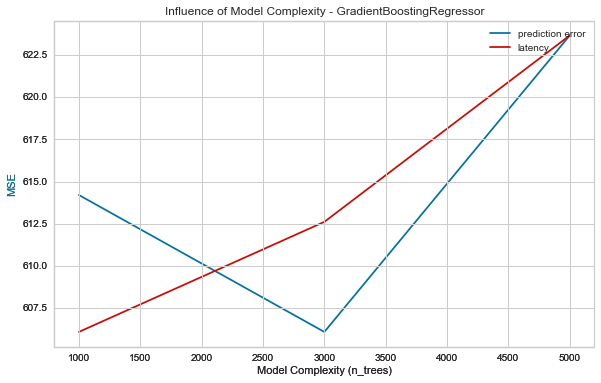

In [48]:
def benchmark_influence(conf):
    """
    Benchmark influence of :changing_param: on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf['changing_param_values']:
        conf['tuned_params'][conf['changing_param']] = param_value
        estimator = conf['estimator'](**conf['tuned_params'])
        print("Benchmarking %s" % estimator)
        estimator.fit(conf['x_train'], conf['y_train'])
        conf['postfit_hook'](estimator)
        complexity = conf['complexity_computer'](estimator)
        complexities.append(complexity)
        start_time = time.time()
        y_pred = estimator.predict(conf['x_test'])
        elapsed_time = (time.time() - start_time)
        prediction_times.append(elapsed_time)
        pred_score = conf['prediction_performance_computer'](
            conf['y_test'], y_pred)
        prediction_powers.append(pred_score)
        print("Complexity: %d | %s: %.4f | Pred. Time: %fs\n" % (
            complexity, conf['prediction_performance_label'], pred_score,
            elapsed_time))
    return prediction_powers, prediction_times, complexities


def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """
    plt.figure(figsize=(12, 6))
    host = host_subplot(111, axes_class=Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    host.set_xlabel('Model Complexity (%s)' % conf['complexity_label'])
    y1_label = conf['prediction_performance_label']
    y2_label = "Time (s)"
    host.set_ylabel(y1_label)
    par1.set_ylabel(y2_label)
    p1, = host.plot(complexities, mse_values, 'b-', label="prediction error")
    p2, = par1.plot(complexities, prediction_times, 'r-',
                    label="latency")
    host.legend(loc='upper right')
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    plt.title('Influence of Model Complexity - %s' % conf['estimator'].__name__)
    plt.show()


def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

configurations = [
    {'estimator': gbr,
     'tuned_params': {'loss': 'ls'},
     'changing_param': 'n_estimators',
     'changing_param_values': [1000,3000,5000],
     'complexity_label': 'n_trees',
     'complexity_computer': lambda x: x.n_estimators,
     'x_train': x_Econdo_NS_train,
     'y_train': y_Econdo_NS_train,
     'x_test': x_Econdo_NS_test,
     'y_test': y_Econdo_NS_test,
     'postfit_hook': lambda x: x,
     'prediction_performance_computer': mean_squared_error,
     'prediction_performance_label': 'MSE'},
]
for conf in configurations:
    prediction_performances, prediction_times, complexities = \
        benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times,
                   complexities)

In [159]:
gbr_Econdo_NS = ensemble.GradientBoostingRegressor(n_estimators=3000)

gbr_Econdo_NS.fit(x_Econdo_NS_train, y_Econdo_NS_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [160]:
print("R2 for test", gbr_Econdo_NS.score(x_Econdo_NS_test, y_Econdo_NS_test, sample_weight=None))
print("R2 for train", gbr_Econdo_NS.score(x_Econdo_NS_train, y_Econdo_NS_train, sample_weight=None))

print("MSE Test",metrics.mean_squared_error(y_Econdo_NS_test,gbr_Econdo_NS.predict(x_Econdo_NS_test)))
print("MSE Train",metrics.mean_squared_error(y_Econdo_NS_train,gbr_Econdo_NS.predict(x_Econdo_NS_train)))

R2 for test 0.801754858979943
R2 for train 0.9101573770351769
MSE Test 609.409858786506
MSE Train 280.4418116096027


In [161]:
names = x_Econdo_NS_train.columns

columns = ["Importance", "Feature Name"]
index = ["1st Important Feature", 
         "2nd Important Feature", 
         "3rd Important Feature", 
         "4th Important Feature", 
         "5th Important Feature",
        "6th Important Feature",
        "7th Important Feature",
        "8th Important Feature",
        "9th Important Feature",
        "10th Important Feature"]

pd.DataFrame(sorted(zip(map(lambda z: round(z, 4), gbr_Econdo_NS.feature_importances_), names), 
             reverse=True)[0:10], columns = columns, index = index)

Importance                         Feature Name
1st Important Feature       0.4173                           Area (sqf)
2nd Important Feature       0.1088                     Floor No (Final)
3rd Important Feature       0.0243                   Isunlucky Floor No
4th Important Feature       0.0222                      Islucky Unit No
5th Important Feature       0.0221                     Islucky Floor No
6th Important Feature       0.0195                          bus stop km
7th Important Feature       0.0186      Purchaser Address Indicator_HDB
8th Important Feature       0.0185  Purchaser Address Indicator_Private
9th Important Feature       0.0184      Purchaser Address Indicator_N.A
10th Important Feature      0.0177                   URA growth area km

### 7.4.6 Econdo Resale

Benchmarking GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=140, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Complexity: 140 | MSE: 1255.0003 | Pred. Time: 0.003022s

Benchmarking GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=160, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Comple

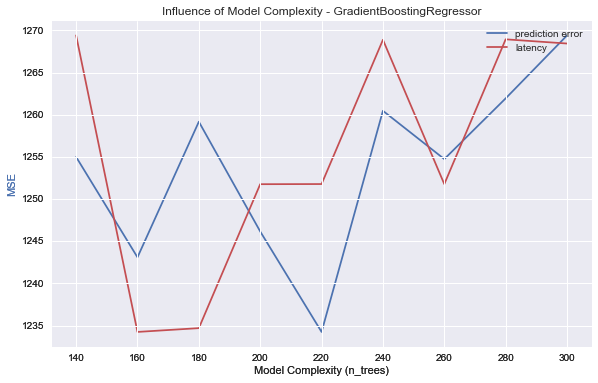

In [38]:
def benchmark_influence(conf):
    """
    Benchmark influence of :changing_param: on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf['changing_param_values']:
        conf['tuned_params'][conf['changing_param']] = param_value
        estimator = conf['estimator'](**conf['tuned_params'])
        print("Benchmarking %s" % estimator)
        estimator.fit(conf['x_train'], conf['y_train'])
        conf['postfit_hook'](estimator)
        complexity = conf['complexity_computer'](estimator)
        complexities.append(complexity)
        start_time = time.time()
        y_pred = estimator.predict(conf['x_test'])
        elapsed_time = (time.time() - start_time)
        prediction_times.append(elapsed_time)
        pred_score = conf['prediction_performance_computer'](
            conf['y_test'], y_pred)
        prediction_powers.append(pred_score)
        print("Complexity: %d | %s: %.4f | Pred. Time: %fs\n" % (
            complexity, conf['prediction_performance_label'], pred_score,
            elapsed_time))
    return prediction_powers, prediction_times, complexities


def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """
    plt.figure(figsize=(12, 6))
    host = host_subplot(111, axes_class=Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    host.set_xlabel('Model Complexity (%s)' % conf['complexity_label'])
    y1_label = conf['prediction_performance_label']
    y2_label = "Time (s)"
    host.set_ylabel(y1_label)
    par1.set_ylabel(y2_label)
    p1, = host.plot(complexities, mse_values, 'b-', label="prediction error")
    p2, = par1.plot(complexities, prediction_times, 'r-',
                    label="latency")
    host.legend(loc='upper right')
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    plt.title('Influence of Model Complexity - %s' % conf['estimator'].__name__)
    plt.show()


def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

configurations = [
    {'estimator': gbr,
     'tuned_params': {'loss': 'ls'},
     'changing_param': 'n_estimators',
     'changing_param_values': [140,160,180,200,220,240,260,280,300],
     'complexity_label': 'n_trees',
     'complexity_computer': lambda x: x.n_estimators,
     'x_train': x_Econdo_RS_train,
     'y_train': y_Econdo_RS_train,
     'x_test': x_Econdo_RS_test,
     'y_test': y_Econdo_RS_test,
     'postfit_hook': lambda x: x,
     'prediction_performance_computer': mean_squared_error,
     'prediction_performance_label': 'MSE'},
]
for conf in configurations:
    prediction_performances, prediction_times, complexities = \
        benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times,
                   complexities)

In [162]:
gbr_Econdo_RS = ensemble.GradientBoostingRegressor(n_estimators=220)

gbr_Econdo_RS.fit(x_Econdo_RS_train, y_Econdo_RS_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=220, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [163]:
print("R2 for test", gbr_Econdo_RS.score(x_Econdo_RS_test, y_Econdo_RS_test, sample_weight=None))
print("R2 for train", gbr_Econdo_RS.score(x_Econdo_RS_train, y_Econdo_RS_train, sample_weight=None))

print("MSE Test",metrics.mean_squared_error(y_Econdo_RS_test,gbr_Econdo_RS.predict(x_Econdo_RS_test)))
print("MSE Train",metrics.mean_squared_error(y_Econdo_RS_train,gbr_Econdo_RS.predict(x_Econdo_RS_train)))

R2 for test 0.8869021567817578
R2 for train 0.9556480533495606
MSE Test 1236.0508065534966
MSE Train 409.31728183883195


In [164]:
names = x_Econdo_RS_train.columns

columns = ["Importance", "Feature Name"]
index = ["1st Important Feature", 
         "2nd Important Feature", 
         "3rd Important Feature", 
         "4th Important Feature", 
         "5th Important Feature",
        "6th Important Feature",
        "7th Important Feature",
        "8th Important Feature",
        "9th Important Feature",
        "10th Important Feature"]

pd.DataFrame(sorted(zip(map(lambda z: round(z, 4), gbr_Econdo_RS.feature_importances_), names), 
             reverse=True)[0:10], columns = columns, index = index)

Importance                         Feature Name
1st Important Feature       0.1673                           Area (sqf)
2nd Important Feature       0.1621                                  Age
3rd Important Feature       0.0734                     Floor No (Final)
4th Important Feature       0.0379               elderly care centre km
5th Important Feature       0.0368                               CBD km
6th Important Feature       0.0332                    community club km
7th Important Feature       0.0300                          bus stop km
8th Important Feature       0.0275  Purchaser Address Indicator_Private
9th Important Feature       0.0256                 exercise facility km
10th Important Feature      0.0243                      kindergarten km

### 7.5 Boosting - XGB

#### 7.5.1 Apartment New Sales

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=2000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Complexity: 2000 | MSE: 6790.9688 | Pred. Time: 0.179489s

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=2200, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Complexity: 2200 | MSE: 6768.2385 | Pred. Time: 0.195477s

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsampl

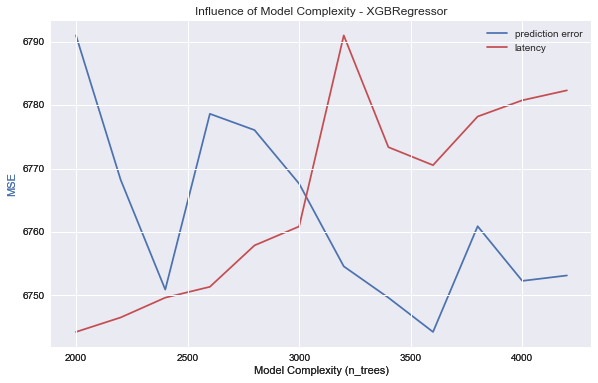

In [51]:
def benchmark_influence(conf):
    """
    Benchmark influence of :changing_param: on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf['changing_param_values']:
        conf['tuned_params'][conf['changing_param']] = param_value
        estimator = conf['estimator'](**conf['tuned_params'])
        print("Benchmarking %s" % estimator)
        estimator.fit(conf['x_train'], conf['y_train'])
        conf['postfit_hook'](estimator)
        complexity = conf['complexity_computer'](estimator)
        complexities.append(complexity)
        start_time = time.time()
        y_pred = estimator.predict(conf['x_test'])
        elapsed_time = (time.time() - start_time)
        prediction_times.append(elapsed_time)
        pred_score = conf['prediction_performance_computer'](
            conf['y_test'], y_pred)
        prediction_powers.append(pred_score)
        print("Complexity: %d | %s: %.4f | Pred. Time: %fs\n" % (
            complexity, conf['prediction_performance_label'], pred_score,
            elapsed_time))
    return prediction_powers, prediction_times, complexities


def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """
    plt.figure(figsize=(12, 6))
    host = host_subplot(111, axes_class=Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    host.set_xlabel('Model Complexity (%s)' % conf['complexity_label'])
    y1_label = conf['prediction_performance_label']
    y2_label = "Time (s)"
    host.set_ylabel(y1_label)
    par1.set_ylabel(y2_label)
    p1, = host.plot(complexities, mse_values, 'b-', label="prediction error")
    p2, = par1.plot(complexities, prediction_times, 'r-',
                    label="latency")
    host.legend(loc='upper right')
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    plt.title('Influence of Model Complexity - %s' % conf['estimator'].__name__)
    plt.show()


def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

configurations = [
    {'estimator': xgb.XGBRegressor,
     'tuned_params': {'loss': 'ls'},
     'changing_param': 'n_estimators',
     'changing_param_values': [2000,2200,2400,2600,2800,3000,3200,3400,3600,3800,4000,4200],
     'complexity_label': 'n_trees',
     'complexity_computer': lambda x: x.n_estimators,
     'x_train': x_apart_NS_train,
     'y_train': y_apart_NS_train,
     'x_test': x_apart_NS_test,
     'y_test': y_apart_NS_test,
     'postfit_hook': lambda x: x,
     'prediction_performance_computer': mean_squared_error,
     'prediction_performance_label': 'MSE'},
]
for conf in configurations:
    prediction_performances, prediction_times, complexities = \
        benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times,
                   complexities)

In [165]:
xg_reg_apart_NS = xgb.XGBRegressor(n_estimators = 3600)

xg_reg_apart_NS.fit(x_apart_NS_train, y_apart_NS_train)

preds_apart_NS = xg_reg_apart_NS.predict(x_apart_NS_test)

In [166]:
print("R2 for test", xg_reg_apart_NS.score(x_apart_NS_test, y_apart_NS_test, sample_weight=None))
print("R2 for train", xg_reg_apart_NS.score(x_apart_NS_train, y_apart_NS_train, sample_weight=None))

print("MSE Test",metrics.mean_squared_error(y_apart_NS_test,xg_reg_apart_NS.predict(x_apart_NS_test)))
print("MSE Train",metrics.mean_squared_error(y_apart_NS_train,xg_reg_apart_NS.predict(x_apart_NS_train)))

R2 for test 0.965940767115763
R2 for train 0.9912612378556492
MSE Test 6744.256591361951
MSE Train 1716.258327564133


In [167]:
names = x_apart_NS_train.columns

columns = ["Importance", "Feature Name"]
index = ["1st Important Feature", 
         "2nd Important Feature", 
         "3rd Important Feature", 
         "4th Important Feature", 
         "5th Important Feature",
        "6th Important Feature",
        "7th Important Feature",
        "8th Important Feature",
        "9th Important Feature",
        "10th Important Feature"]

pd.DataFrame(sorted(zip(map(lambda z: round(z, 4), xg_reg_apart_NS.feature_importances_), names), 
             reverse=True)[0:10], columns = columns, index = index)

Importance                Feature Name
1st Important Feature       0.3577                  Area (sqf)
2nd Important Feature       0.0955            Floor No (Final)
3rd Important Feature       0.0268         childcare centre km
4th Important Feature       0.0231             kindergarten km
5th Important Feature       0.0224                 bus stop km
6th Important Feature       0.0213            shopping mall km
7th Important Feature       0.0198  supermarket/hypermarket km
8th Important Feature       0.0198           junior college km
9th Important Feature       0.0197      elderly care centre km
10th Important Feature      0.0195                         Age

### 7.5.2 Apartment Resale

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Complexity: 200 | MSE: 21175.7772 | Pred. Time: 0.008974s

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=400, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Complexity: 400 | MSE: 19983.0501 | Pred. Time: 0.016951s

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_

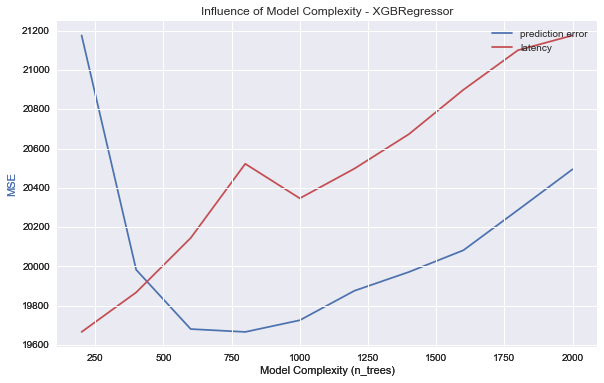

In [39]:
def benchmark_influence(conf):
    """
    Benchmark influence of :changing_param: on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf['changing_param_values']:
        conf['tuned_params'][conf['changing_param']] = param_value
        estimator = conf['estimator'](**conf['tuned_params'])
        print("Benchmarking %s" % estimator)
        estimator.fit(conf['x_train'], conf['y_train'])
        conf['postfit_hook'](estimator)
        complexity = conf['complexity_computer'](estimator)
        complexities.append(complexity)
        start_time = time.time()
        y_pred = estimator.predict(conf['x_test'])
        elapsed_time = (time.time() - start_time)
        prediction_times.append(elapsed_time)
        pred_score = conf['prediction_performance_computer'](
            conf['y_test'], y_pred)
        prediction_powers.append(pred_score)
        print("Complexity: %d | %s: %.4f | Pred. Time: %fs\n" % (
            complexity, conf['prediction_performance_label'], pred_score,
            elapsed_time))
    return prediction_powers, prediction_times, complexities


def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """
    plt.figure(figsize=(12, 6))
    host = host_subplot(111, axes_class=Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    host.set_xlabel('Model Complexity (%s)' % conf['complexity_label'])
    y1_label = conf['prediction_performance_label']
    y2_label = "Time (s)"
    host.set_ylabel(y1_label)
    par1.set_ylabel(y2_label)
    p1, = host.plot(complexities, mse_values, 'b-', label="prediction error")
    p2, = par1.plot(complexities, prediction_times, 'r-',
                    label="latency")
    host.legend(loc='upper right')
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    plt.title('Influence of Model Complexity - %s' % conf['estimator'].__name__)
    plt.show()


def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

configurations = [
    {'estimator': xgb.XGBRegressor,
     'tuned_params': {'loss': 'ls'},
     'changing_param': 'n_estimators',
     'changing_param_values': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
     'complexity_label': 'n_trees',
     'complexity_computer': lambda x: x.n_estimators,
     'x_train': x_apart_RS_train,
     'y_train': y_apart_RS_train,
     'x_test': x_apart_RS_test,
     'y_test': y_apart_RS_test,
     'postfit_hook': lambda x: x,
     'prediction_performance_computer': mean_squared_error,
     'prediction_performance_label': 'MSE'},
]
for conf in configurations:
    prediction_performances, prediction_times, complexities = \
        benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times,
                   complexities)

In [168]:
xg_reg_apart_RS = xgb.XGBRegressor(n_estimators = 600)

xg_reg_apart_RS.fit(x_apart_RS_train, y_apart_RS_train)

preds_apart_RS = xg_reg_apart_RS.predict(x_apart_RS_test)

In [169]:
print("R2 for test", xg_reg_apart_RS.score(x_apart_RS_test, y_apart_RS_test, sample_weight=None))
print("R2 for train", xg_reg_apart_RS.score(x_apart_RS_train, y_apart_RS_train, sample_weight=None))

print("MSE Test",metrics.mean_squared_error(y_apart_RS_test,xg_reg_apart_RS.predict(x_apart_RS_test)))
print("MSE Train",metrics.mean_squared_error(y_apart_RS_train,xg_reg_apart_RS.predict(x_apart_RS_train)))

R2 for test 0.9279169492871474
R2 for train 0.9822089723320946
MSE Test 19681.251124106406
MSE Train 4745.420632916842


In [170]:
names = x_apart_RS_train.columns

columns = ["Importance", "Feature Name"]
index = ["1st Important Feature", 
         "2nd Important Feature", 
         "3rd Important Feature", 
         "4th Important Feature", 
         "5th Important Feature",
        "6th Important Feature",
        "7th Important Feature",
        "8th Important Feature",
        "9th Important Feature",
        "10th Important Feature"]

pd.DataFrame(sorted(zip(map(lambda z: round(z, 4), xg_reg_apart_RS.feature_importances_), names), 
             reverse=True)[0:10], columns = columns, index = index)

Importance            Feature Name
1st Important Feature       0.1755              Area (sqf)
2nd Important Feature       0.1175                     Age
3rd Important Feature       0.0684        Floor No (Final)
4th Important Feature       0.0403  elderly care centre km
5th Important Feature       0.0365                 park km
6th Important Feature       0.0317                  CBD km
7th Important Feature       0.0301             bus stop km
8th Important Feature       0.0294    exercise facility km
9th Important Feature       0.0284       community club km
10th Important Feature      0.0276         kindergarten km

###  7.5.3 Condo - New Sales

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Complexity: 100 | MSE: 8528.0113 | Pred. Time: 0.040860s

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Complexity: 1000 | MSE: 4901.0969 | Pred. Time: 0.207444s

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_

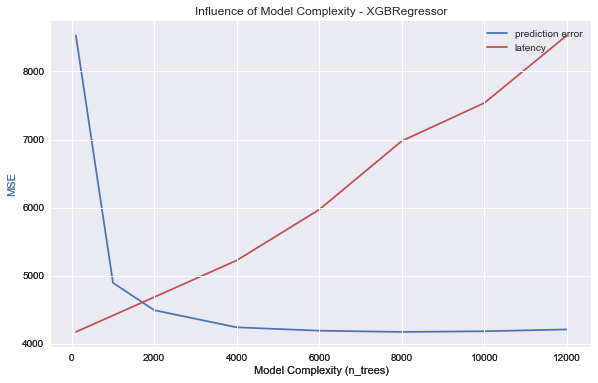

In [52]:
def benchmark_influence(conf):
    """
    Benchmark influence of :changing_param: on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf['changing_param_values']:
        conf['tuned_params'][conf['changing_param']] = param_value
        estimator = conf['estimator'](**conf['tuned_params'])
        print("Benchmarking %s" % estimator)
        estimator.fit(conf['x_train'], conf['y_train'])
        conf['postfit_hook'](estimator)
        complexity = conf['complexity_computer'](estimator)
        complexities.append(complexity)
        start_time = time.time()
        y_pred = estimator.predict(conf['x_test'])
        elapsed_time = (time.time() - start_time)
        prediction_times.append(elapsed_time)
        pred_score = conf['prediction_performance_computer'](
            conf['y_test'], y_pred)
        prediction_powers.append(pred_score)
        print("Complexity: %d | %s: %.4f | Pred. Time: %fs\n" % (
            complexity, conf['prediction_performance_label'], pred_score,
            elapsed_time))
    return prediction_powers, prediction_times, complexities


def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """
    plt.figure(figsize=(12, 6))
    host = host_subplot(111, axes_class=Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    host.set_xlabel('Model Complexity (%s)' % conf['complexity_label'])
    y1_label = conf['prediction_performance_label']
    y2_label = "Time (s)"
    host.set_ylabel(y1_label)
    par1.set_ylabel(y2_label)
    p1, = host.plot(complexities, mse_values, 'b-', label="prediction error")
    p2, = par1.plot(complexities, prediction_times, 'r-',
                    label="latency")
    host.legend(loc='upper right')
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    plt.title('Influence of Model Complexity - %s' % conf['estimator'].__name__)
    plt.show()


def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

configurations = [
    {'estimator': xgb.XGBRegressor,
     'tuned_params': {'loss': 'ls'},
     'changing_param': 'n_estimators',
     'changing_param_values': [100, 1000, 2000, 4000, 6000, 8000, 10000, 12000],
     'complexity_label': 'n_trees',
     'complexity_computer': lambda x: x.n_estimators,
     'x_train': x_condo_NS_train,
     'y_train': y_condo_NS_train,
     'x_test': x_condo_NS_test,
     'y_test': y_condo_NS_test,
     'postfit_hook': lambda x: x,
     'prediction_performance_computer': mean_squared_error,
     'prediction_performance_label': 'MSE'},
]
for conf in configurations:
    prediction_performances, prediction_times, complexities = \
        benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times,
                   complexities)

In [171]:
xg_reg_condo_NS = xgb.XGBRegressor(n_estimators = 8000)

xg_reg_condo_NS.fit(x_condo_NS_train, y_condo_NS_train)

preds_condo_NS = xg_reg_condo_NS.predict(x_condo_NS_test)

In [172]:
print("R2 for test", xg_reg_condo_NS.score(x_condo_NS_test, y_condo_NS_test, sample_weight=None))
print("R2 for train", xg_reg_condo_NS.score(x_condo_NS_train, y_condo_NS_train, sample_weight=None))

print("MSE Test",metrics.mean_squared_error(y_condo_NS_test,xg_reg_condo_NS.predict(x_condo_NS_test)))
print("MSE Train",metrics.mean_squared_error(y_condo_NS_train,xg_reg_condo_NS.predict(x_condo_NS_train)))

R2 for test 0.9674864887199273
R2 for train 0.9879668040497469
MSE Test 4180.871515757621
MSE Train 1512.0538160870883


In [173]:
names = x_condo_NS_train.columns

columns = ["Importance", "Feature Name"]
index = ["1st Important Feature", 
         "2nd Important Feature", 
         "3rd Important Feature", 
         "4th Important Feature", 
         "5th Important Feature",
        "6th Important Feature",
        "7th Important Feature",
        "8th Important Feature",
        "9th Important Feature",
        "10th Important Feature"]

pd.DataFrame(sorted(zip(map(lambda z: round(z, 4), xg_reg_condo_NS.feature_importances_), names), 
             reverse=True)[0:10], columns = columns, index = index)

Importance           Feature Name
1st Important Feature       0.3723             Area (sqf)
2nd Important Feature       0.1040       Floor No (Final)
3rd Important Feature       0.0248      junior college km
4th Important Feature       0.0243                 CBD km
5th Important Feature       0.0237        kindergarten km
6th Important Feature       0.0205  top primary school km
7th Important Feature       0.0205            No of Units
8th Important Feature       0.0197      primary school km
9th Important Feature       0.0196    childcare centre km
10th Important Feature      0.0189         MRT station km

### 7.5.4 Condo - Resales

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Complexity: 100 | MSE: 19012.8679 | Pred. Time: 0.016955s

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Complexity: 1000 | MSE: 11943.0149 | Pred. Time: 0.105724s

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsampl

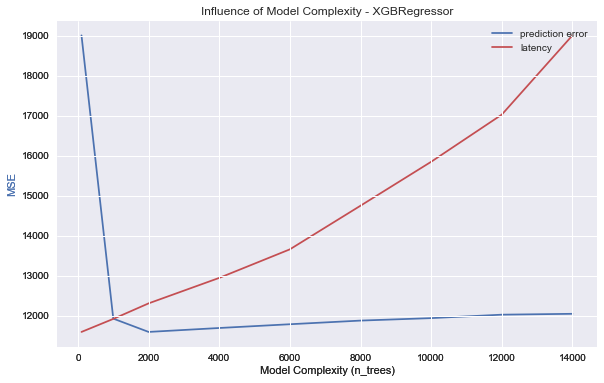

In [40]:
def benchmark_influence(conf):
    """
    Benchmark influence of :changing_param: on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf['changing_param_values']:
        conf['tuned_params'][conf['changing_param']] = param_value
        estimator = conf['estimator'](**conf['tuned_params'])
        print("Benchmarking %s" % estimator)
        estimator.fit(conf['x_train'], conf['y_train'])
        conf['postfit_hook'](estimator)
        complexity = conf['complexity_computer'](estimator)
        complexities.append(complexity)
        start_time = time.time()
        y_pred = estimator.predict(conf['x_test'])
        elapsed_time = (time.time() - start_time)
        prediction_times.append(elapsed_time)
        pred_score = conf['prediction_performance_computer'](
            conf['y_test'], y_pred)
        prediction_powers.append(pred_score)
        print("Complexity: %d | %s: %.4f | Pred. Time: %fs\n" % (
            complexity, conf['prediction_performance_label'], pred_score,
            elapsed_time))
    return prediction_powers, prediction_times, complexities


def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """
    plt.figure(figsize=(12, 6))
    host = host_subplot(111, axes_class=Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    host.set_xlabel('Model Complexity (%s)' % conf['complexity_label'])
    y1_label = conf['prediction_performance_label']
    y2_label = "Time (s)"
    host.set_ylabel(y1_label)
    par1.set_ylabel(y2_label)
    p1, = host.plot(complexities, mse_values, 'b-', label="prediction error")
    p2, = par1.plot(complexities, prediction_times, 'r-',
                    label="latency")
    host.legend(loc='upper right')
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    plt.title('Influence of Model Complexity - %s' % conf['estimator'].__name__)
    plt.show()


def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

configurations = [
    {'estimator': xgb.XGBRegressor,
     'tuned_params': {'loss': 'ls'},
     'changing_param': 'n_estimators',
     'changing_param_values': [100, 1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000],
     'complexity_label': 'n_trees',
     'complexity_computer': lambda x: x.n_estimators,
     'x_train': x_condo_RS_train,
     'y_train': y_condo_RS_train,
     'x_test': x_condo_RS_test,
     'y_test': y_condo_RS_test,
     'postfit_hook': lambda x: x,
     'prediction_performance_computer': mean_squared_error,
     'prediction_performance_label': 'MSE'},
]
for conf in configurations:
    prediction_performances, prediction_times, complexities = \
        benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times,
                   complexities)

In [174]:
xg_reg_condo_RS = xgb.XGBRegressor(n_estimators = 2000)

xg_reg_condo_RS.fit(x_condo_RS_train, y_condo_RS_train)

preds_condo_RS = xg_reg_condo_RS.predict(x_condo_RS_test)

In [175]:
print("R2 for test", xg_reg_condo_RS.score(x_condo_RS_test, y_condo_RS_test, sample_weight=None))
print("R2 for train", xg_reg_condo_RS.score(x_condo_RS_train, y_condo_RS_train, sample_weight=None))

print("MSE Test",metrics.mean_squared_error(y_condo_RS_test,xg_reg_condo_RS.predict(x_condo_RS_test)))
print("MSE Train",metrics.mean_squared_error(y_condo_RS_train,xg_reg_condo_RS.predict(x_condo_RS_train)))

R2 for test 0.9323671481067384
R2 for train 0.985553886671483
MSE Test 11610.83197655702
MSE Train 2671.635258482718


In [176]:
names = x_condo_RS_train.columns

columns = ["Importance", "Feature Name"]
index = ["1st Important Feature", 
         "2nd Important Feature", 
         "3rd Important Feature", 
         "4th Important Feature", 
         "5th Important Feature",
        "6th Important Feature",
        "7th Important Feature",
        "8th Important Feature",
        "9th Important Feature",
        "10th Important Feature"]

pd.DataFrame(sorted(zip(map(lambda z: round(z, 4), xg_reg_condo_RS.feature_importances_), names), 
             reverse=True)[0:10], columns = columns, index = index)

Importance          Feature Name
1st Important Feature       0.2005            Area (sqf)
2nd Important Feature       0.0981                   Age
3rd Important Feature       0.0592      Floor No (Final)
4th Important Feature       0.0325                CBD km
5th Important Feature       0.0301           bus stop km
6th Important Feature       0.0297        MRT station km
7th Important Feature       0.0275  exercise facility km
8th Important Feature       0.0270           No of Units
9th Important Feature       0.0258   secondary school km
10th Important Feature      0.0252     community club km

### 7.5.5 ECondo - New Sales

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Complexity: 100 | MSE: 850.4297 | Pred. Time: 0.015953s

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Complexity: 500 | MSE: 681.8812 | Pred. Time: 0.048868s

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_byle

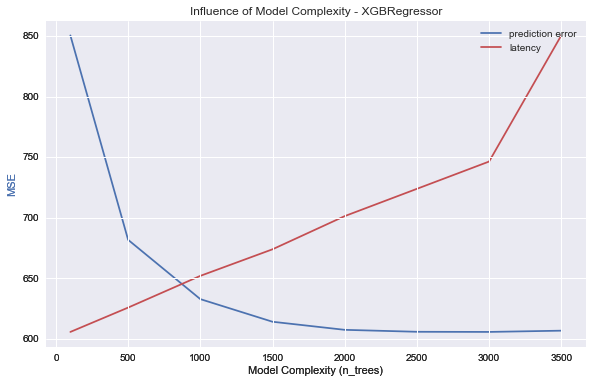

In [58]:
def benchmark_influence(conf):
    """
    Benchmark influence of :changing_param: on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf['changing_param_values']:
        conf['tuned_params'][conf['changing_param']] = param_value
        estimator = conf['estimator'](**conf['tuned_params'])
        print("Benchmarking %s" % estimator)
        estimator.fit(conf['x_train'], conf['y_train'])
        conf['postfit_hook'](estimator)
        complexity = conf['complexity_computer'](estimator)
        complexities.append(complexity)
        start_time = time.time()
        y_pred = estimator.predict(conf['x_test'])
        elapsed_time = (time.time() - start_time)
        prediction_times.append(elapsed_time)
        pred_score = conf['prediction_performance_computer'](
            conf['y_test'], y_pred)
        prediction_powers.append(pred_score)
        print("Complexity: %d | %s: %.4f | Pred. Time: %fs\n" % (
            complexity, conf['prediction_performance_label'], pred_score,
            elapsed_time))
    return prediction_powers, prediction_times, complexities


def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """
    plt.figure(figsize=(12, 6))
    host = host_subplot(111, axes_class=Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    host.set_xlabel('Model Complexity (%s)' % conf['complexity_label'])
    y1_label = conf['prediction_performance_label']
    y2_label = "Time (s)"
    host.set_ylabel(y1_label)
    par1.set_ylabel(y2_label)
    p1, = host.plot(complexities, mse_values, 'b-', label="prediction error")
    p2, = par1.plot(complexities, prediction_times, 'r-',
                    label="latency")
    host.legend(loc='upper right')
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    plt.title('Influence of Model Complexity - %s' % conf['estimator'].__name__)
    plt.show()


def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

configurations = [
    {'estimator': xgb.XGBRegressor,
     'tuned_params': {'loss': 'ls'},
     'changing_param': 'n_estimators',
     'changing_param_values': [100, 500, 1000, 1500, 2000, 2500, 3000, 3500],
     'complexity_label': 'n_trees',
     'complexity_computer': lambda x: x.n_estimators,
     'x_train': x_Econdo_NS_train,
     'y_train': y_Econdo_NS_train,
     'x_test': x_Econdo_NS_test,
     'y_test': y_Econdo_NS_test,
     'postfit_hook': lambda x: x,
     'prediction_performance_computer': mean_squared_error,
     'prediction_performance_label': 'MSE'},
]
for conf in configurations:
    prediction_performances, prediction_times, complexities = \
        benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times,
                   complexities)

In [177]:
xg_reg_Econdo_NS = xgb.XGBRegressor(n_estimators = 3000)

xg_reg_Econdo_NS.fit(x_Econdo_NS_train, y_Econdo_NS_train)

preds_Econdo_NS = xg_reg_Econdo_NS.predict(x_Econdo_NS_test)

In [178]:
print("R2 for test", xg_reg_Econdo_NS.score(x_Econdo_NS_test, y_Econdo_NS_test, sample_weight=None))
print("R2 for train", xg_reg_Econdo_NS.score(x_Econdo_NS_train, y_Econdo_NS_train, sample_weight=None))

print("MSE Test",metrics.mean_squared_error(y_Econdo_NS_test,xg_reg_Econdo_NS.predict(x_Econdo_NS_test)))
print("MSE Train",metrics.mean_squared_error(y_Econdo_NS_train,xg_reg_Econdo_NS.predict(x_Econdo_NS_train)))

R2 for test 0.8028875136466933
R2 for train 0.905190386350811
MSE Test 605.928053800182
MSE Train 295.9461659995787


In [179]:
names = x_Econdo_NS_train.columns

columns = ["Importance", "Feature Name"]
index = ["1st Important Feature", 
         "2nd Important Feature", 
         "3rd Important Feature", 
         "4th Important Feature", 
         "5th Important Feature",
        "6th Important Feature",
        "7th Important Feature",
        "8th Important Feature",
        "9th Important Feature",
        "10th Important Feature"]

pd.DataFrame(sorted(zip(map(lambda z: round(z, 4), xg_reg_Econdo_NS.feature_importances_), names), 
             reverse=True)[0:10], columns = columns, index = index)

Importance          Feature Name
1st Important Feature       0.3963            Area (sqf)
2nd Important Feature       0.0980      Floor No (Final)
3rd Important Feature       0.0396                CBD km
4th Important Feature       0.0261  exercise facility km
5th Important Feature       0.0257    URA growth area km
6th Important Feature       0.0251     community club km
7th Important Feature       0.0242               park km
8th Important Feature       0.0229    Isunlucky Floor No
9th Important Feature       0.0218   childcare centre km
10th Important Feature      0.0186           bus stop km

### 7.5.6 ECondo - Resales

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=60, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Complexity: 60 | MSE: 1291.0970 | Pred. Time: 0.003018s

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=80, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Complexity: 80 | MSE: 1277.6870 | Pred. Time: 0.002992s

Benchmarking XGBRegressor(base_score=0.5, booster='gbtree', colsample_byleve

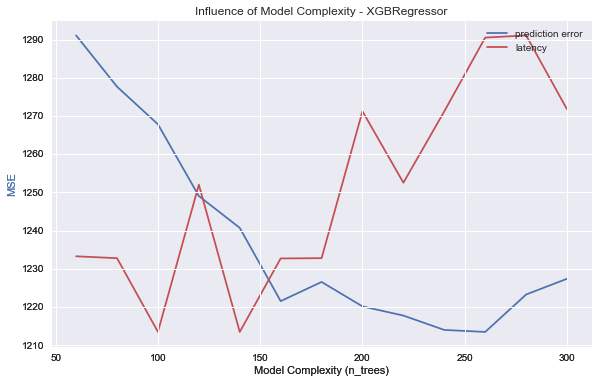

In [47]:
def benchmark_influence(conf):
    """
    Benchmark influence of :changing_param: on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf['changing_param_values']:
        conf['tuned_params'][conf['changing_param']] = param_value
        estimator = conf['estimator'](**conf['tuned_params'])
        print("Benchmarking %s" % estimator)
        estimator.fit(conf['x_train'], conf['y_train'])
        conf['postfit_hook'](estimator)
        complexity = conf['complexity_computer'](estimator)
        complexities.append(complexity)
        start_time = time.time()
        y_pred = estimator.predict(conf['x_test'])
        elapsed_time = (time.time() - start_time)
        prediction_times.append(elapsed_time)
        pred_score = conf['prediction_performance_computer'](
            conf['y_test'], y_pred)
        prediction_powers.append(pred_score)
        print("Complexity: %d | %s: %.4f | Pred. Time: %fs\n" % (
            complexity, conf['prediction_performance_label'], pred_score,
            elapsed_time))
    return prediction_powers, prediction_times, complexities


def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """
    plt.figure(figsize=(12, 6))
    host = host_subplot(111, axes_class=Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    host.set_xlabel('Model Complexity (%s)' % conf['complexity_label'])
    y1_label = conf['prediction_performance_label']
    y2_label = "Time (s)"
    host.set_ylabel(y1_label)
    par1.set_ylabel(y2_label)
    p1, = host.plot(complexities, mse_values, 'b-', label="prediction error")
    p2, = par1.plot(complexities, prediction_times, 'r-',
                    label="latency")
    host.legend(loc='upper right')
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    plt.title('Influence of Model Complexity - %s' % conf['estimator'].__name__)
    plt.show()


def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

configurations = [
    {'estimator': xgb.XGBRegressor,
     'tuned_params': {'loss': 'ls'},
     'changing_param': 'n_estimators',
     'changing_param_values': [60,80,100,120,140,160,180,200,220,240,260,280,300],
     'complexity_label': 'n_trees',
     'complexity_computer': lambda x: x.n_estimators,
     'x_train': x_Econdo_RS_train,
     'y_train': y_Econdo_RS_train,
     'x_test': x_Econdo_RS_test,
     'y_test': y_Econdo_RS_test,
     'postfit_hook': lambda x: x,
     'prediction_performance_computer': mean_squared_error,
     'prediction_performance_label': 'MSE'},
]
for conf in configurations:
    prediction_performances, prediction_times, complexities = \
        benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times,
                   complexities)

In [180]:
xg_reg_Econdo_RS = xgb.XGBRegressor(n_estimators = 260)

xg_reg_Econdo_RS.fit(x_Econdo_RS_train, y_Econdo_RS_train)

preds_Econdo_RS = xg_reg_Econdo_RS.predict(x_Econdo_RS_test)

In [181]:
print("R2 for test", xg_reg_Econdo_RS.score(x_Econdo_RS_test, y_Econdo_RS_test, sample_weight=None))
print("R2 for train", xg_reg_Econdo_RS.score(x_Econdo_RS_train, y_Econdo_RS_train, sample_weight=None))

print("MSE Test",metrics.mean_squared_error(y_Econdo_RS_test,xg_reg_Econdo_RS.predict(x_Econdo_RS_test)))
print("MSE Train",metrics.mean_squared_error(y_Econdo_RS_train,xg_reg_Econdo_RS.predict(x_Econdo_RS_train)))

R2 for test 0.8889635608503378
R2 for train 0.9527400913579939
MSE Test 1213.521639868291
MSE Train 436.15441499693065


In [98]:
names = x_Econdo_RS_train.columns
columns = ["Importance", "Feature Name"]
index = ["1st Important Feature", 
         "2nd Important Feature", 
         "3rd Important Feature", 
         "4th Important Feature", 
         "5th Important Feature",
        "6th Important Feature",
        "7th Important Feature",
        "8th Important Feature",
        "9th Important Feature",
        "10th Important Feature"]

pd.DataFrame(sorted(zip(map(lambda z: round(z, 4), xg_reg_Econdo_RS.feature_importances_), names), 
             reverse=True)[0:10], columns = columns, index = index)

Importance                    Feature Name
1st Important Feature       0.1877                      Area (sqf)
2nd Important Feature       0.1766                             Age
3rd Important Feature       0.1065                Floor No (Final)
4th Important Feature       0.0364                 kindergarten km
5th Important Feature       0.0312               community club km
6th Important Feature       0.0299                          CBD km
7th Important Feature       0.0286          elderly care centre km
8th Important Feature       0.0286                     bus stop km
9th Important Feature       0.0279            exercise facility km
10th Important Feature      0.0247  Uni Qualification (% of total)

# 8.0 Discussion on Overall Results

Out of the predictive models employed for eac.h domain, we can deduce that XGBRegressor is generally the best performing model where it achieved the highest R2 score and lowest MSE score for all domains.

To determine how well the models fit the data, we need to take a statistical measure of how close each data point fits the regression line. By taking XGBRegressor from the Apartment – New Sales and Resales domains as an example, we can visualize its goodness-of-fit as shown in the diagrams below:

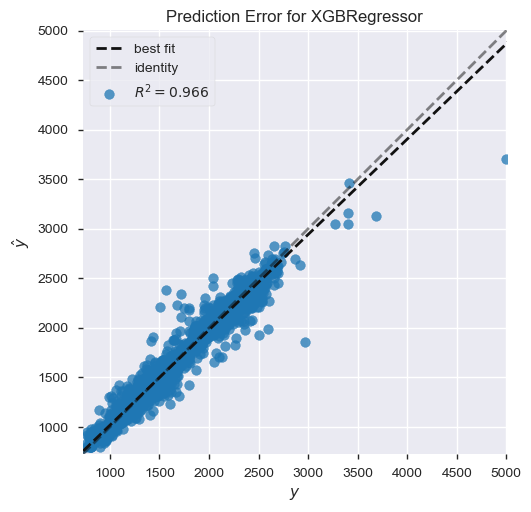

In [182]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
#lasso = Lasso()
visualizer = PredictionError(xg_reg_apart_NS)

visualizer.fit(x_apart_NS_train, y_apart_NS_train)  # Fit the training data to the visualizer
visualizer.score(x_apart_NS_test, y_apart_NS_test)  # Evaluate the model on the test data
g = visualizer.poof()

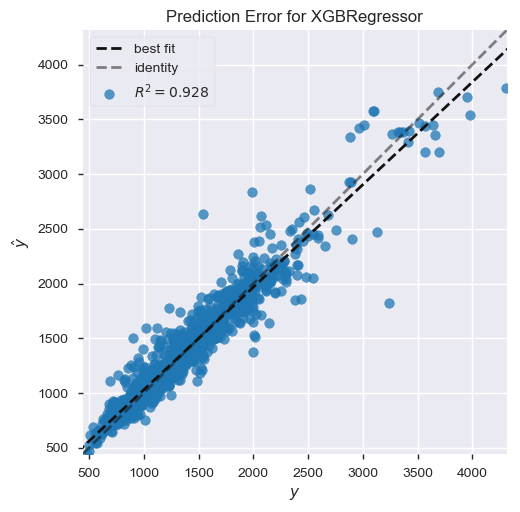

In [183]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
#lasso = Lasso()
visualizer = PredictionError(xg_reg_apart_RS)

visualizer.fit(x_apart_RS_train, y_apart_RS_train)  # Fit the training data to the visualizer
visualizer.score(x_apart_RS_test, y_apart_RS_test)  # Evaluate the model on the test data
g = visualizer.poof()

In general, the higher the R2, the better the model fits the data. However, the measurement of R2 alone is not sufficient to determine biasness of the predictions. In order to do so, we employed the use of residual plots to analyse the variance of error. A random dispersion of data points around the horizontal axis tells us that our model is performing well. Additionally, from the histogram on the right, we can also see that the error is normally distributed around zero, providing another indication of a well fitted model.

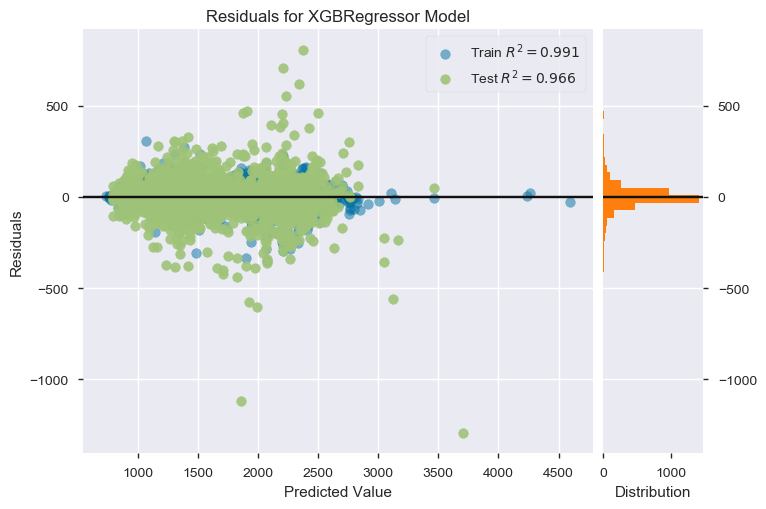

In [184]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(xg_reg_apart_NS)

visualizer.fit(x_apart_NS_train, y_apart_NS_train)  # Fit the training data to the visualizer
visualizer.score(x_apart_NS_test, y_apart_NS_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

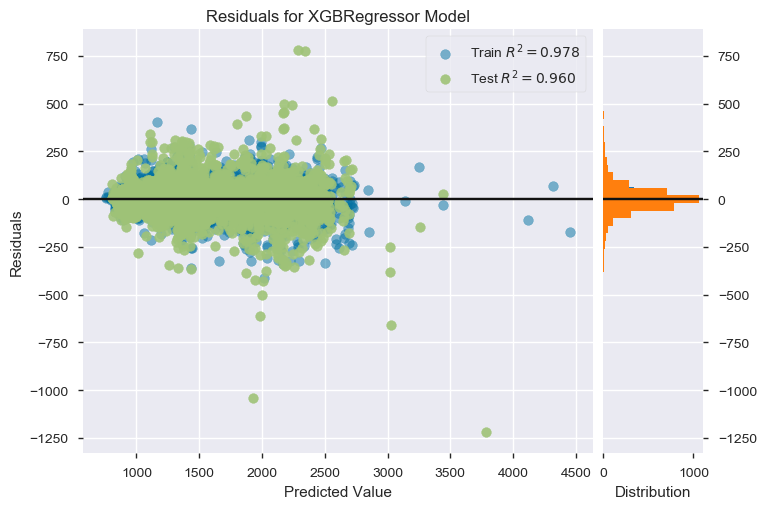

In [185]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(xg_reg_apart_RS)

visualizer.fit(x_apart_NS_train, y_apart_NS_train)  # Fit the training data to the visualizer
visualizer.score(x_apart_NS_test, y_apart_NS_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

# 9.0 Discussion on Important Features

## 9.1 Overall Important Features

Based on the results above, we can see that both Area (sqf) and Floor No (Final) consistently appear throughout with a relatively high importance score. However, in order to truly understand how these features affect our target variable, we aim to visualize these relationships to gain further insights.

### 9.1.1 Area (sqf)

[Text(0,0.5,'Unit Price ($psf)'),
 Text(0.5,0,'Area (sqf)'),
 Text(0.5,1,'Reg Plot Of Unit Price ($psf) Against Area (sqf) for Executive Condo Resales')]

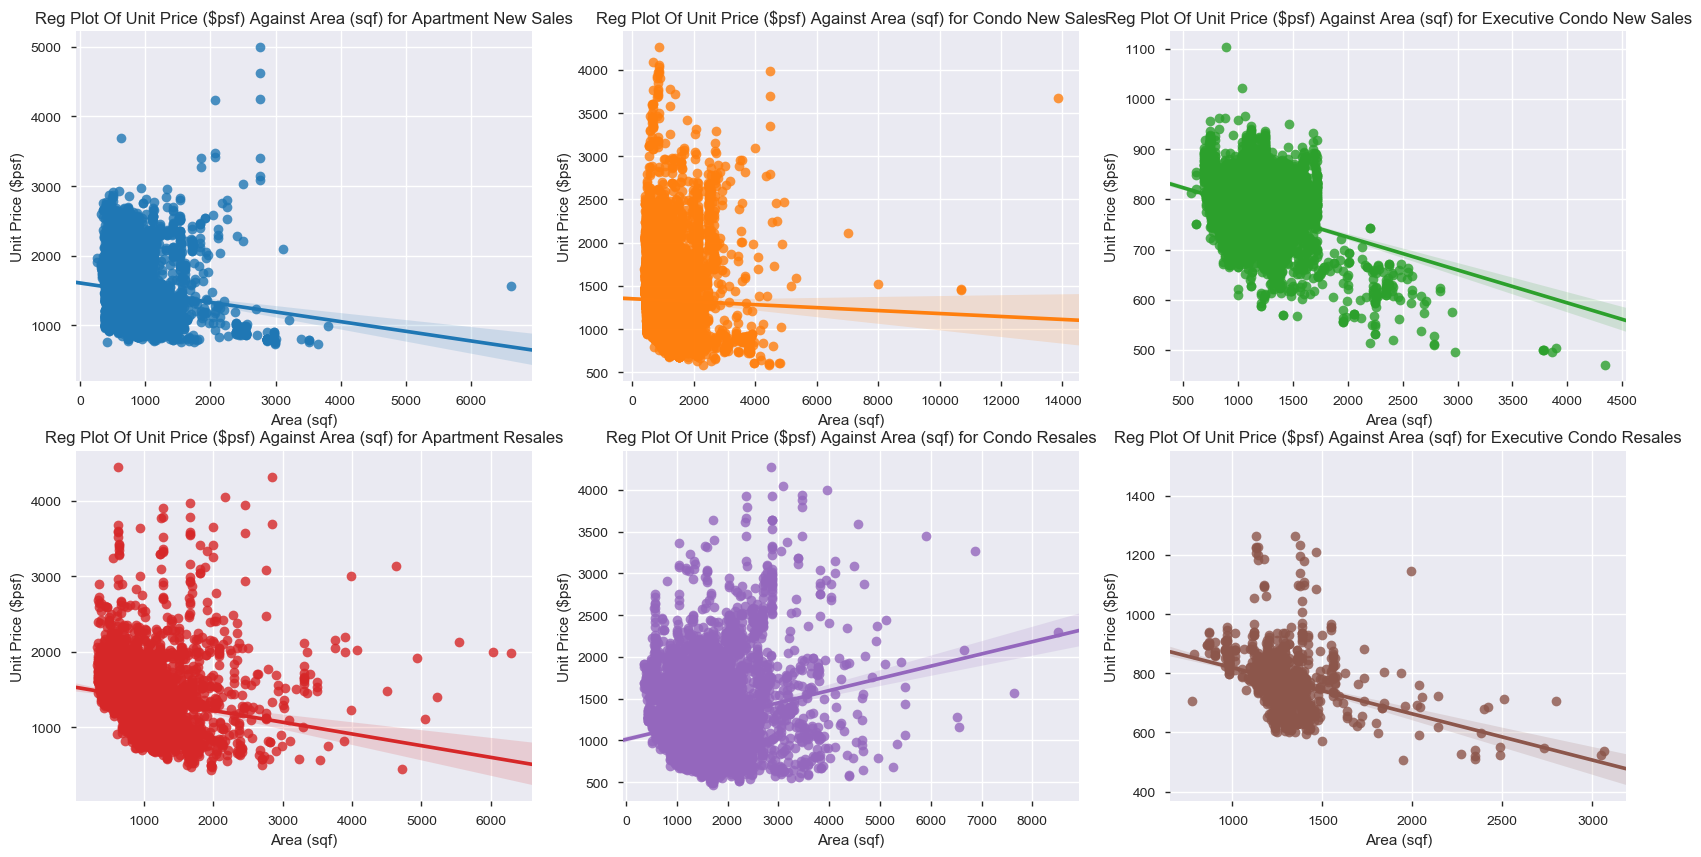

In [189]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 10)
sns.regplot(x=x_apart_NS["Area (sqf)"], y=y_apart_NS,ax=axes[0][0])
sns.regplot(x=x_condo_NS["Area (sqf)"], y=y_condo_NS,ax=axes[0][1])
sns.regplot(x=x_Econdo_NS["Area (sqf)"], y=y_Econdo_NS,ax=axes[0][2])
sns.regplot(x=x_apart_RS["Area (sqf)"], y=y_apart_RS,ax=axes[1][0])
sns.regplot(x=x_condo_RS["Area (sqf)"], y=y_condo_RS,ax=axes[1][1])
sns.regplot(x=x_Econdo_RS["Area (sqf)"], y=y_Econdo_RS,ax=axes[1][2])


axes[0][0].set(xlabel='Area (sqf)', ylabel='Unit Price ($psf)',title="Reg Plot Of Unit Price ($psf) Against Area (sqf) for Apartment New Sales")
axes[0][1].set(xlabel='Area (sqf)', ylabel='Unit Price ($psf)',title="Reg Plot Of Unit Price ($psf) Against Area (sqf) for Condo New Sales")
axes[0][2].set(xlabel='Area (sqf)', ylabel='Unit Price ($psf)',title="Reg Plot Of Unit Price ($psf) Against Area (sqf) for Executive Condo New Sales")
axes[1][0].set(xlabel='Area (sqf)', ylabel='Unit Price ($psf)',title="Reg Plot Of Unit Price ($psf) Against Area (sqf) for Apartment Resales")
axes[1][1].set(xlabel='Area (sqf)', ylabel='Unit Price ($psf)',title="Reg Plot Of Unit Price ($psf) Against Area (sqf) for Condo Resales")
axes[1][2].set(xlabel='Area (sqf)', ylabel='Unit Price ($psf)',title="Reg Plot Of Unit Price ($psf) Against Area (sqf) for Executive Condo Resales")


### 9.1.2 Floor No (Final)

[Text(0,0.5,'Unit Price ($psf)'),
 Text(0.5,0,'Floor No (Final)'),
 Text(0.5,1,'Box Plot Of Unit Price ($psf) Against Floor No (Final) for Executive Condo Resales')]

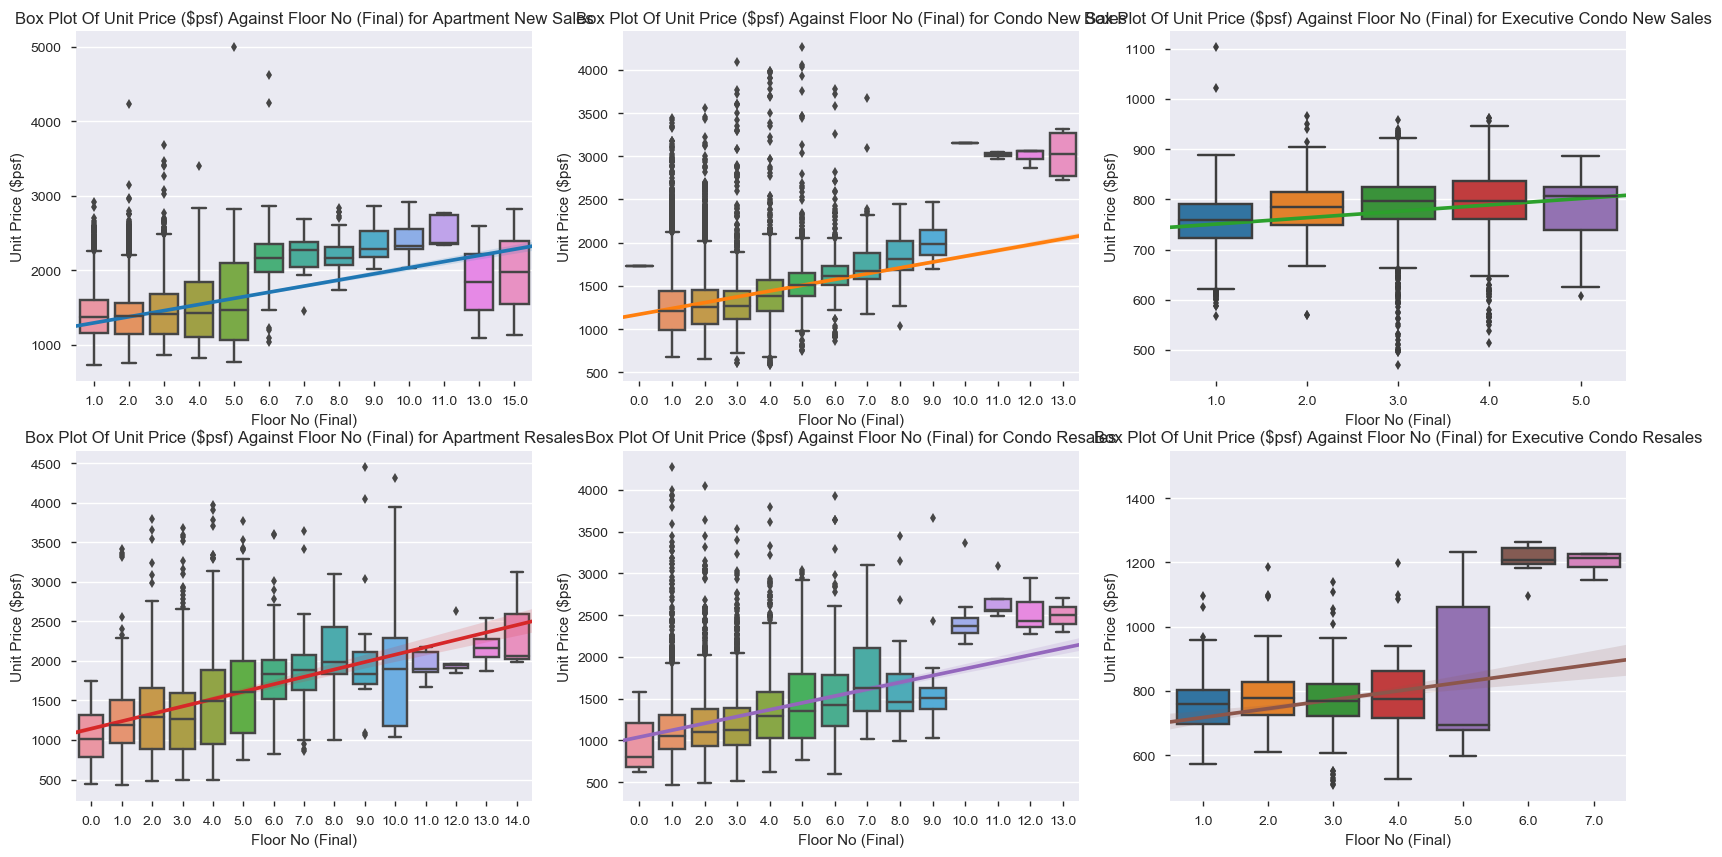

In [195]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 10)
sns.boxplot(x=x_apart_NS["Floor No (Final)"], y=y_apart_NS,ax=axes[0][0])
sns.regplot(x=x_apart_NS["Floor No (Final)"], y=y_apart_NS, scatter=False, ax=axes[0][0])

sns.boxplot(x=x_condo_NS["Floor No (Final)"], y=y_condo_NS,ax=axes[0][1])
sns.regplot(x=x_condo_NS["Floor No (Final)"], y=y_condo_NS, scatter = False, ax=axes[0][1])

sns.boxplot(x=x_Econdo_NS["Floor No (Final)"], y=y_Econdo_NS,ax=axes[0][2])
sns.regplot(x=x_Econdo_NS["Floor No (Final)"], y=y_Econdo_NS,scatter = False,ax=axes[0][2])

sns.boxplot(x=x_apart_RS["Floor No (Final)"], y=y_apart_RS,ax=axes[1][0])
sns.regplot(x=x_apart_RS["Floor No (Final)"], y=y_apart_RS, scatter = False, ax=axes[1][0])

sns.boxplot(x=x_condo_RS["Floor No (Final)"], y=y_condo_RS,ax=axes[1][1])
sns.regplot(x=x_condo_RS["Floor No (Final)"], y=y_condo_RS, scatter = False, ax=axes[1][1])

sns.boxplot(x=x_Econdo_RS["Floor No (Final)"], y=y_Econdo_RS,ax=axes[1][2])
sns.regplot(x=x_Econdo_RS["Floor No (Final)"], y=y_Econdo_RS, scatter = False, ax=axes[1][2])



axes[0][0].set(xlabel='Floor No (Final)', ylabel='Unit Price ($psf)',title="Box Plot Of Unit Price ($psf) Against Floor No (Final) for Apartment New Sales")
axes[0][1].set(xlabel='Floor No (Final)', ylabel='Unit Price ($psf)',title="Box Plot Of Unit Price ($psf) Against Floor No (Final) for Condo New Sales")
axes[0][2].set(xlabel='Floor No (Final)', ylabel='Unit Price ($psf)',title="Box Plot Of Unit Price ($psf) Against Floor No (Final) for Executive Condo New Sales")
axes[1][0].set(xlabel='Floor No (Final)', ylabel='Unit Price ($psf)',title="Box Plot Of Unit Price ($psf) Against Floor No (Final) for Apartment Resales")
axes[1][1].set(xlabel='Floor No (Final)', ylabel='Unit Price ($psf)',title="Box Plot Of Unit Price ($psf) Against Floor No (Final) for Condo Resales")
axes[1][2].set(xlabel='Floor No (Final)', ylabel='Unit Price ($psf)',title="Box Plot Of Unit Price ($psf) Against Floor No (Final) for Executive Condo Resales")


### 9.1.3 Distance to Public Transportation

Even though the features representing distance to public transportation did not appear in the top three most important features across all six domains, it is important to note that these features do appear to be common across all six domains among the top ten most important features. 

Based on the plot below, we can see that Unit Price ($psf) is inversely related to two features representing distance to public transport – Bus Distance (log) and MRT Distance (log). As the distance to bus stop and to MRT station decreases, the Unit Price ($psf) increases.

Automatically created module for IPython interactive environment


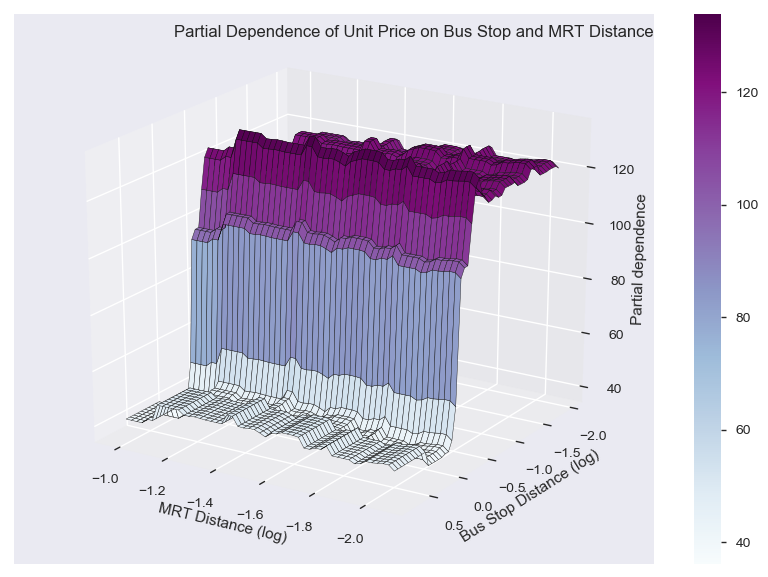

In [72]:
from __future__ import print_function
print(__doc__)


from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing


def main():
    x_train = x_apart_NS_train
    y_train = y_apart_NS_train
    x_test = x_apart_NS_test
    y_test = y_apart_NS_test
    
    names = x_apart_NS_train.columns
  

    clf = GradientBoostingRegressor(n_estimators=300, max_depth=4,
                                    learning_rate=0.1, loss='huber',
                                    random_state=1)
    clf.fit(x_train, y_train)
  

  
    fig = plt.figure()

    target_feature = (27, 17)
    pdp, axes = partial_dependence(clf, target_feature,
                                   X=x_train, grid_resolution=50)
    XX, YY = np.meshgrid(axes[0], axes[1])
    Z = pdp[0].reshape(list(map(np.size, axes))).T
    ax = Axes3D(fig)
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                           cmap=plt.cm.BuPu, edgecolor='k')
    ax.set_xlabel('MRT Distance (log)')
    ax.set_ylabel('Bus Stop Distance (log)')
    ax.set_zlabel('Partial dependence')
    #  pretty init view
    ax.view_init(elev=22, azim=122)
    plt.colorbar(surf)
    plt.suptitle('Partial Dependence of Unit Price on Bus Stop and MRT Distance')
    plt.subplots_adjust(top=0.9)
    plt.show()


if __name__ == '__main__':
    main()

## 9.2 Important Features across Type of Sale

Next, having visualized all important common features across all six domains, we want to identify features that are common across each type of sale to obtain further insights on whether there are features that are only unique to each particular sales type.

### 9.2.1 Resales - Age

Based on the results obtained above, we can see that Age appears to be a significantly important feature that consistently appear across all property types as the second most important feature. 

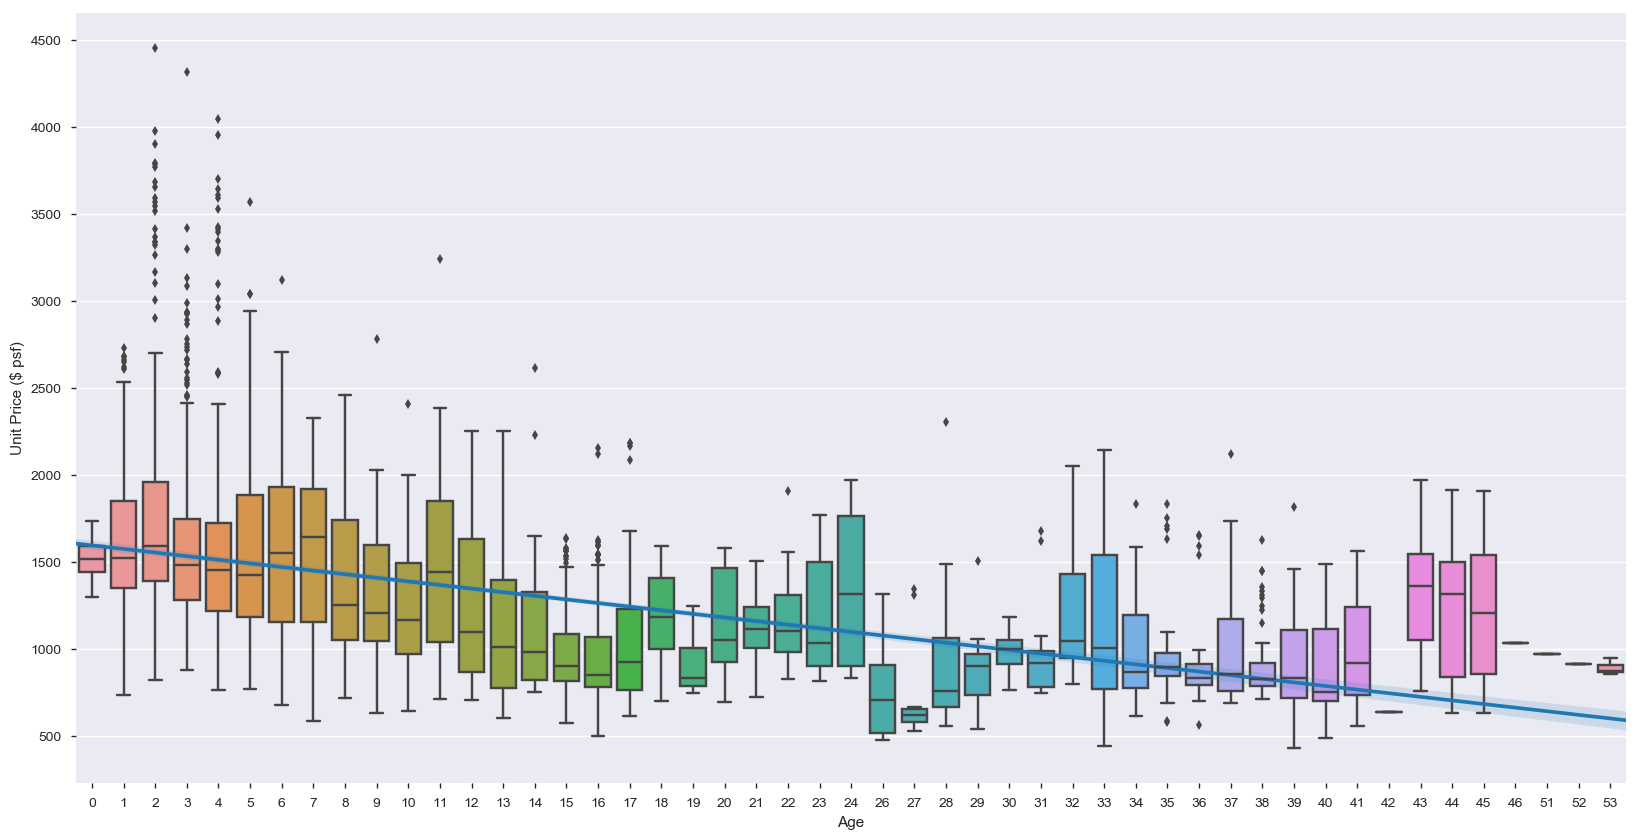

In [232]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x=x_apart_RS["Age"], y=y_apart_RS)
sns.regplot(x=x_apart_RS["Age"], y=y_apart_RS, scatter=False)

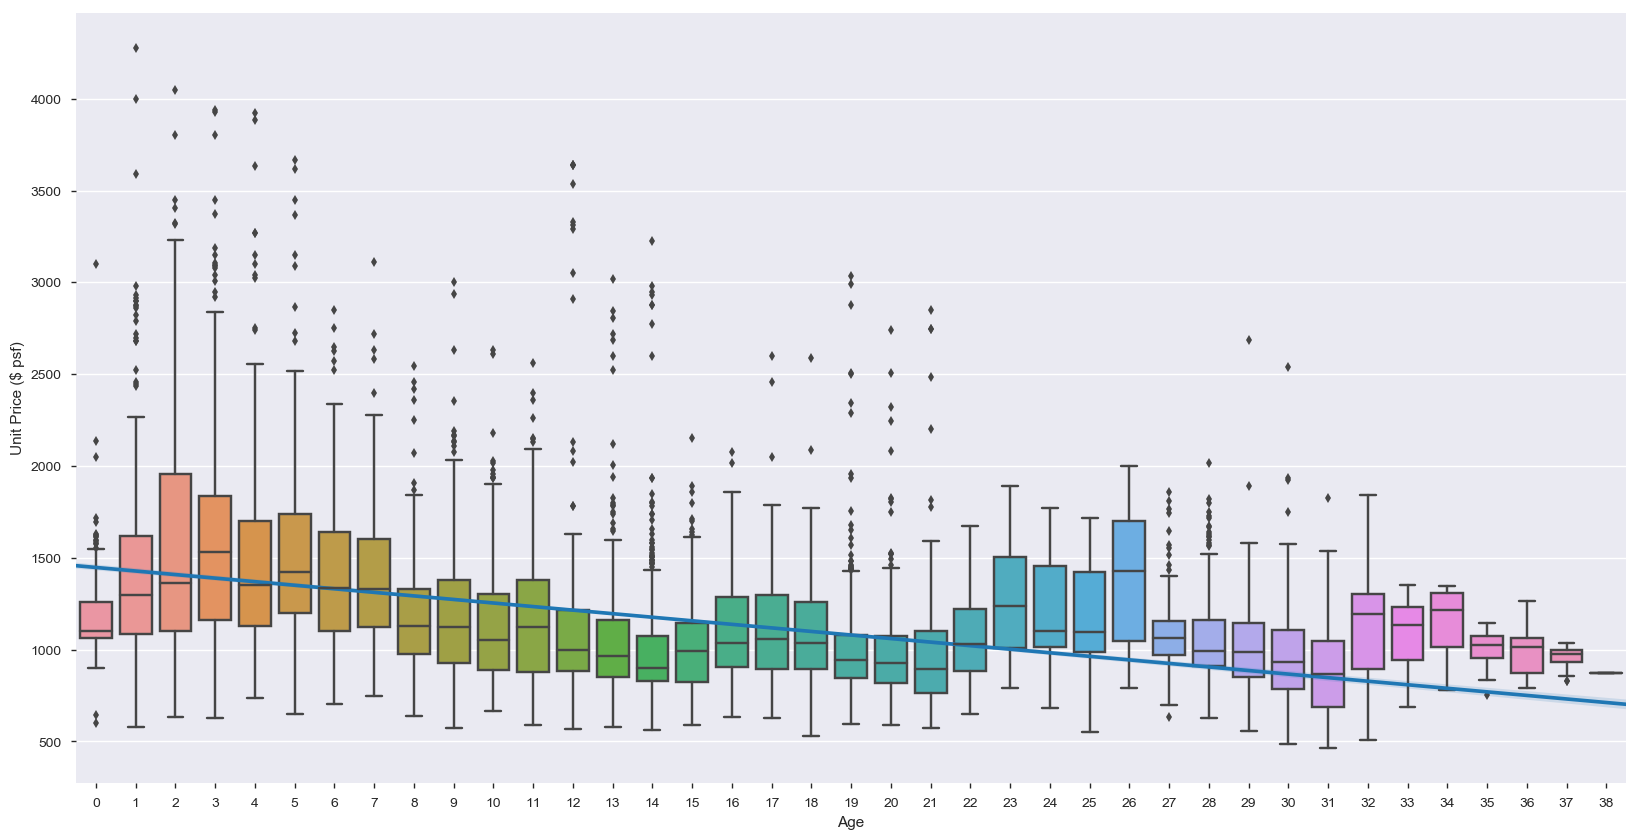

In [233]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x=x_condo_RS["Age"], y=y_condo_RS)
sns.regplot(x=x_condo_RS["Age"], y=y_condo_RS, scatter=False)

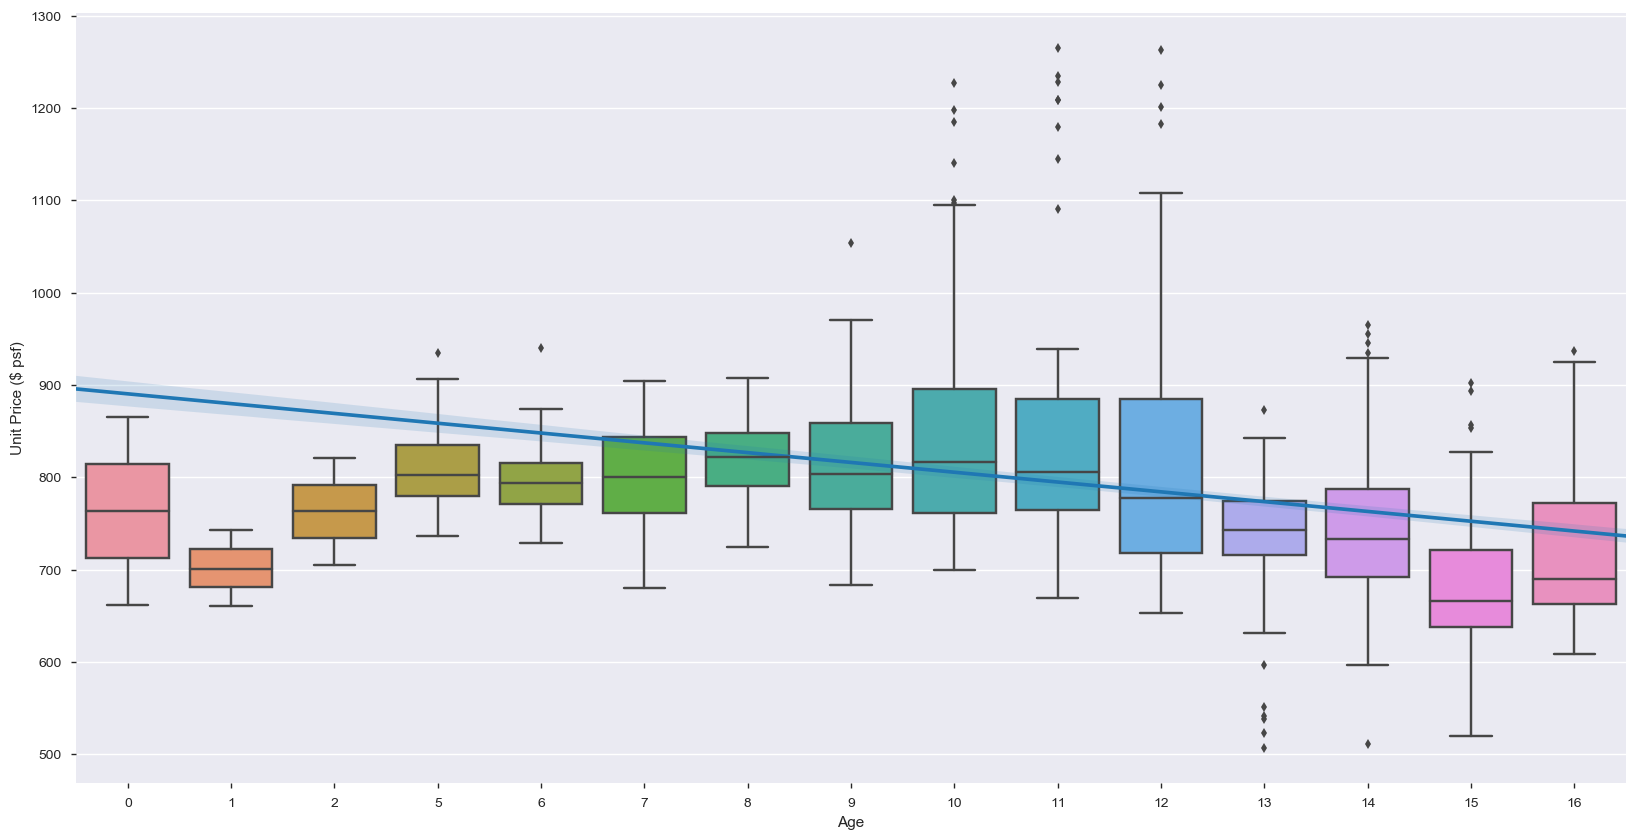

In [234]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x=x_Econdo_RS["Age"], y=y_Econdo_RS)
sns.regplot(x=x_Econdo_RS["Age"], y=y_Econdo_RS, scatter=False)

Based on the plots above, we can see that as Age is inversely related to Unit Price ($psf). As Age increases, the Unit Price ($psf) decreases. However, it is also interesting to note that for Apartment and Condominiums, we can see a spike in Unit Price ($psf) at around age 24 for Apartments and age 23 to 26 for Condominiums. Based on business domain knowledge, the sudden rise in price could be due to demand driven by property investors who are interested in profiting from a potential en bloc sale, which typically occurs for properties that were more than 20 years old at the point of sale.